Name : Ziv Shamli Id: 209188242 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment2

Name : Ravid Masalton Id: 315466771 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment2

# Assignment 3+4  : House Prices - Advanced Regression Techniques

#  Assignment3

# **Too Long Don't Read**

Ask a home buyer to describe their dream home, and they probably won't start with basement ceiling height or proximity to an east-west railroad. But this playground competition dataset proves that much more affects price negotiations than the number of bedrooms or a white picket fence.

In this competition we need to work with a dataset about houses, the dataset contains 81 features (Much more than the last competition) that each of them describes different properties about each house. This time I have to create a ML model that can predict the sale price of a house based on these features, so I'll have to use regression models (Not classification models like in the Titanic competition).we did preprocessing and We noticed that some of the missing values have meaning, we added new features, divided the data using cross-validation, performed features selection and compared different regularizations (lasso, ridge, elastic).
Also, we found the optimal hyperparameters for our model such as learning rate, max iterations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# sklearn imports
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import style
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from scipy import stats
from matplotlib import gridspec
from tqdm.auto import tqdm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor,Lasso, ElasticNet,Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
# define plt settings
sns.set_theme()


In [3]:
# define plt settings
sns.set_theme()
plt.rcParams["font.size"] =20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [4]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data=df_train.copy()
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_data=test.copy()
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
print("The dataframe:")
train_data

The dataframe:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
from IPython.display import Image
Image(url= "https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2021/03/chaitali-majumder/house-price-497112-KhCJQICS.jpg")

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 47.5 MB/s eta 0:00:00:00:0100:01


                                             |          | [  0%]   00:00 -> (? left)


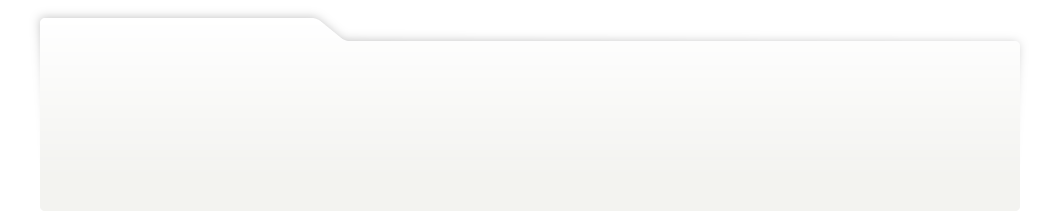
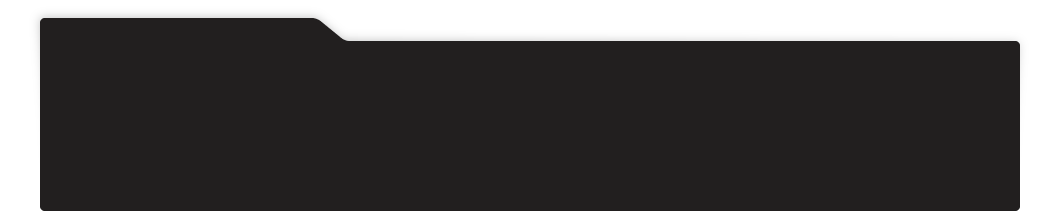
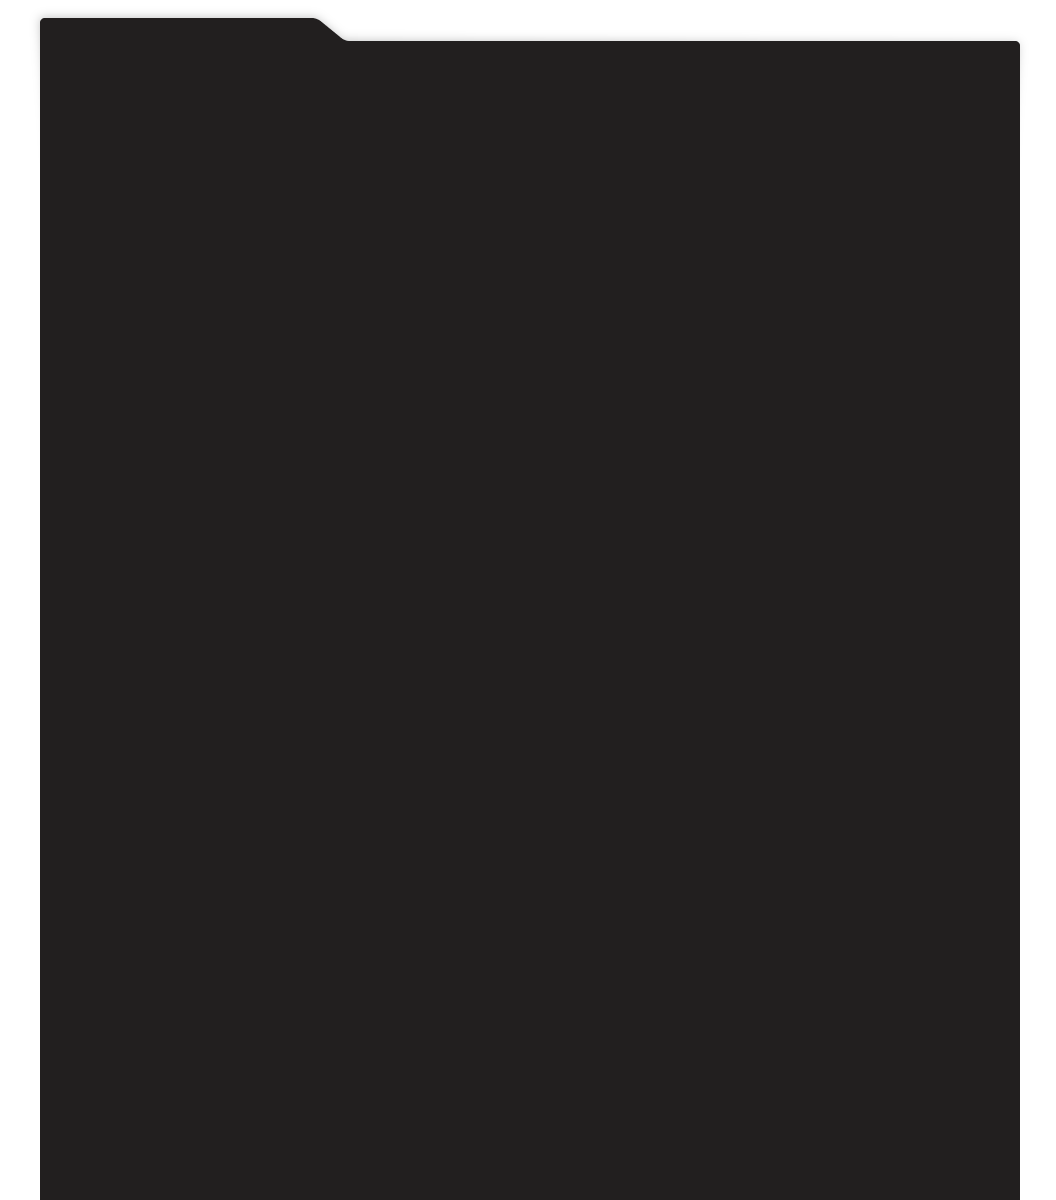
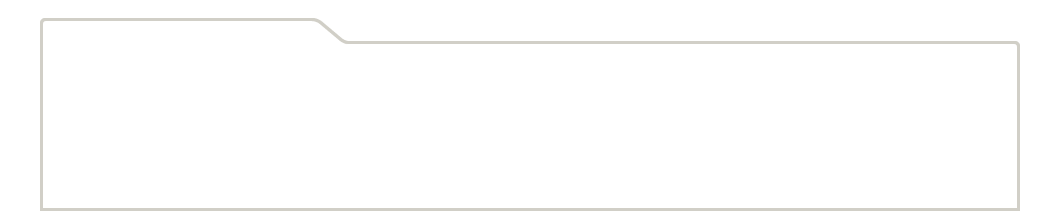
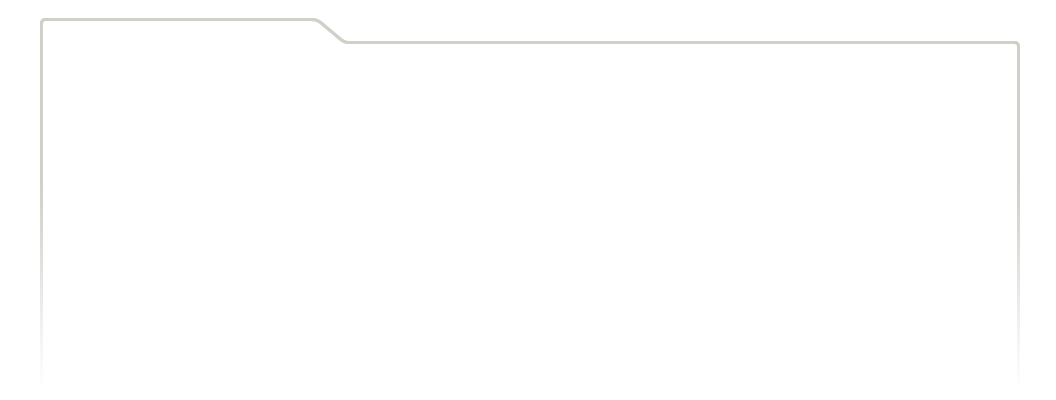
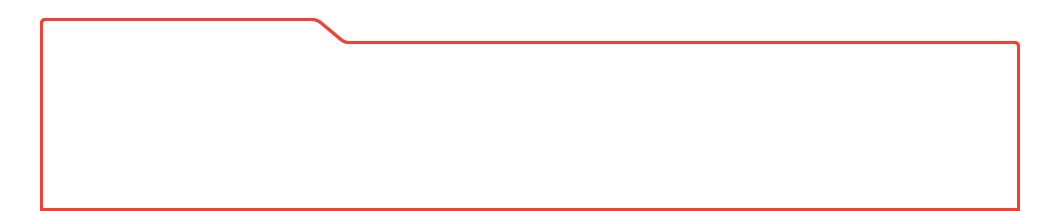
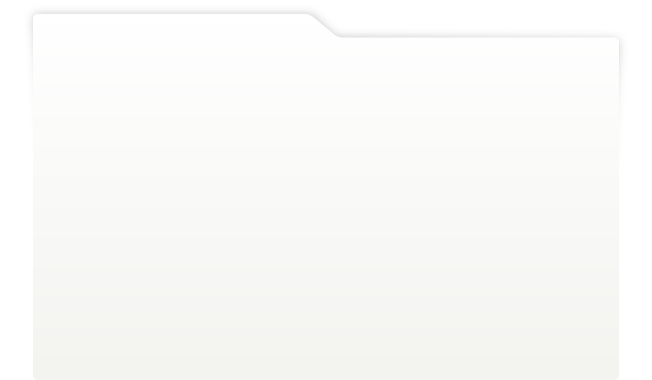
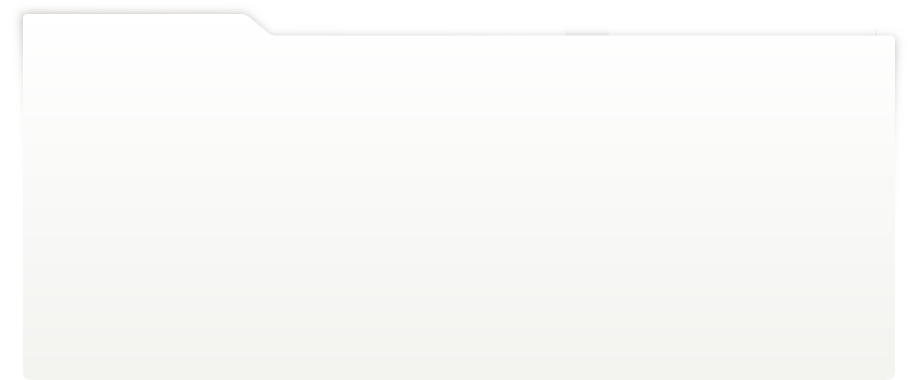
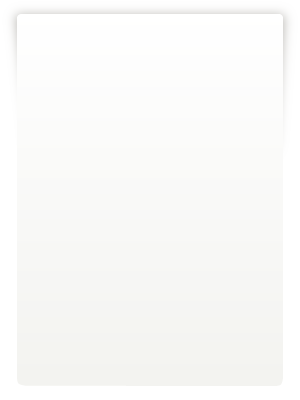
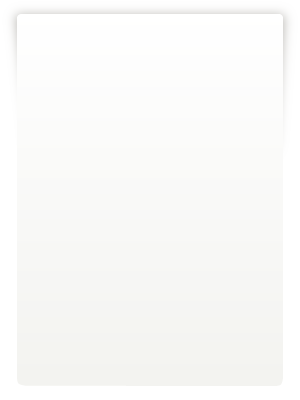
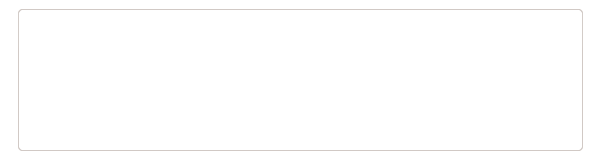
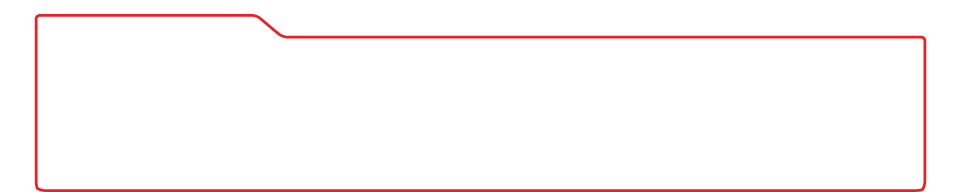
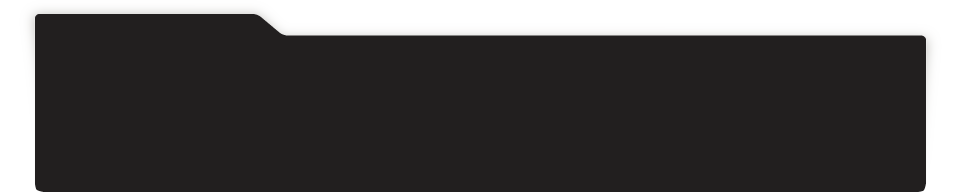
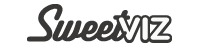
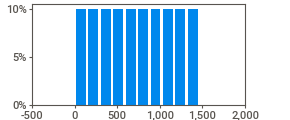
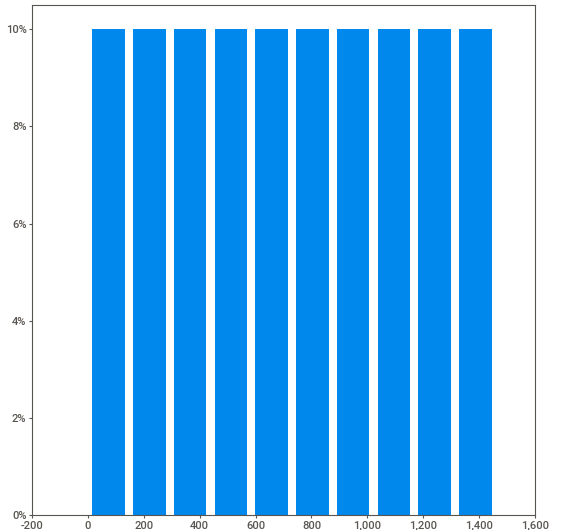
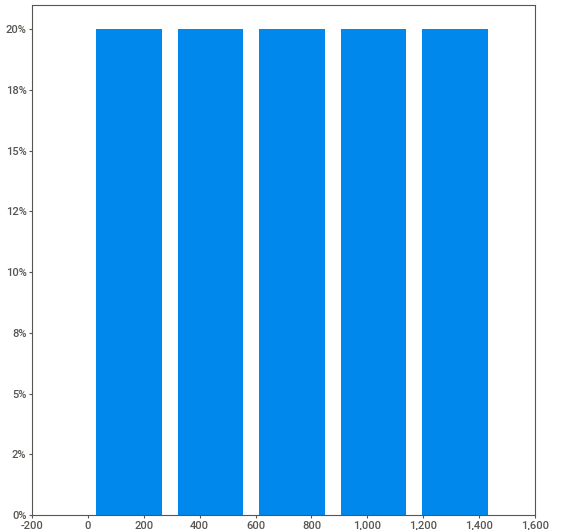
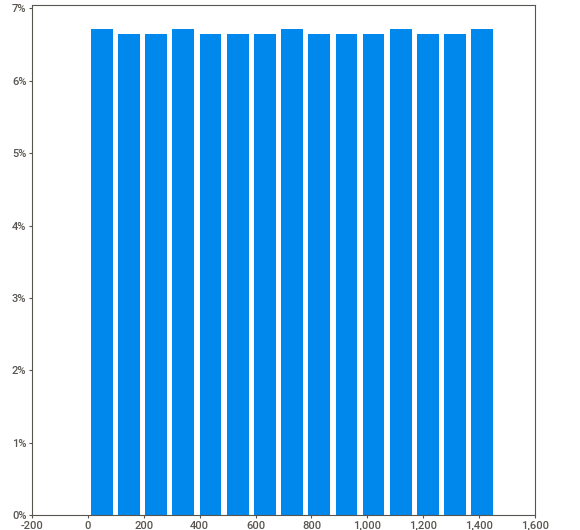
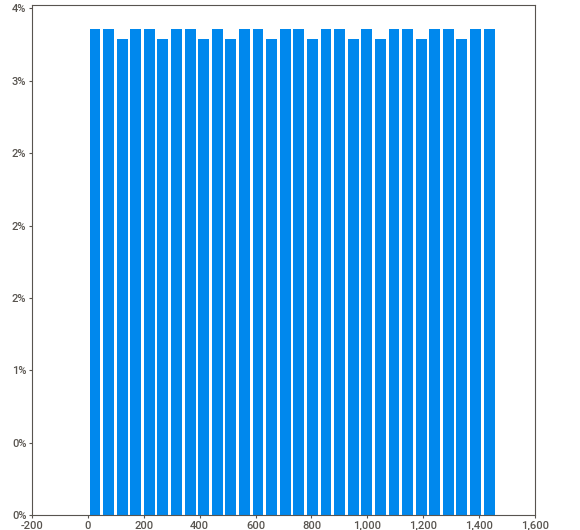
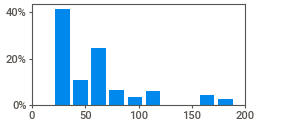
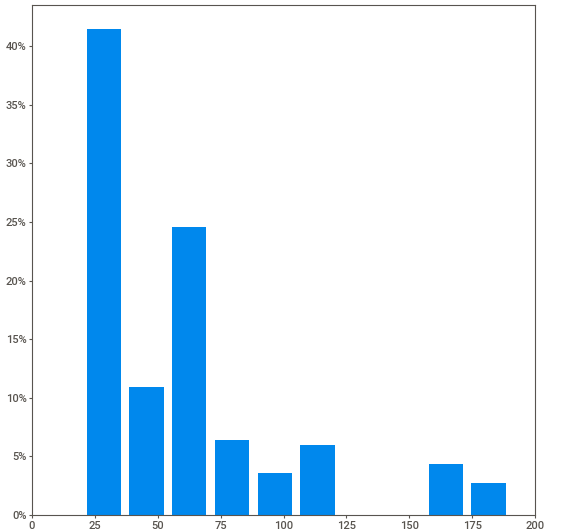
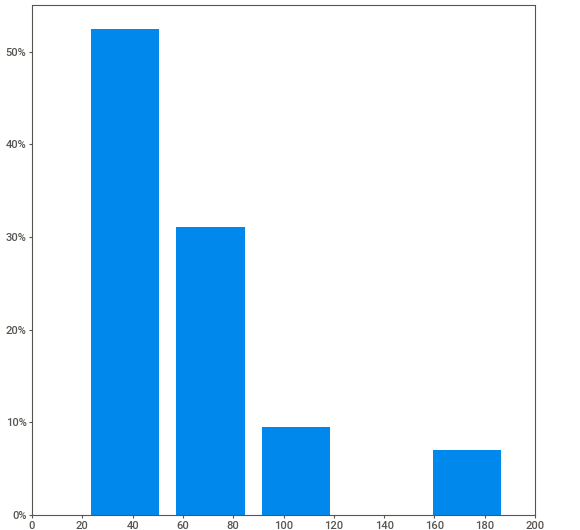
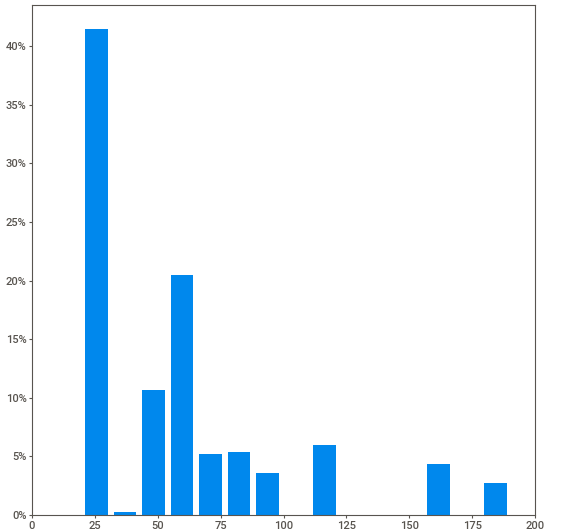
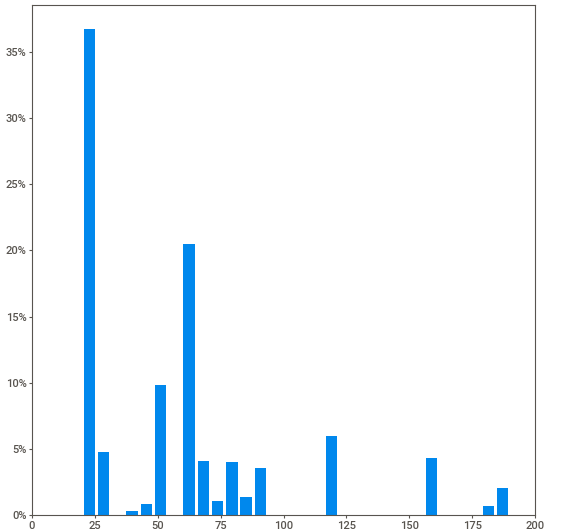
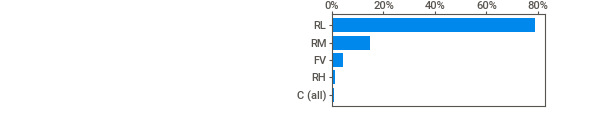
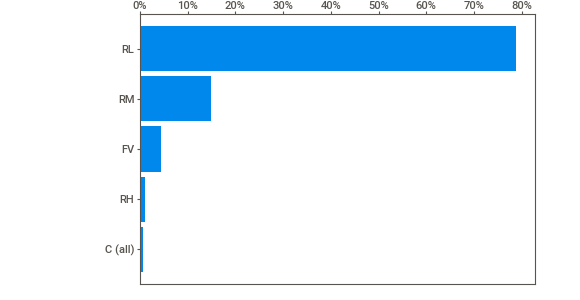
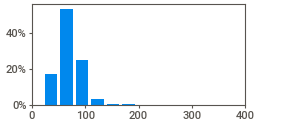
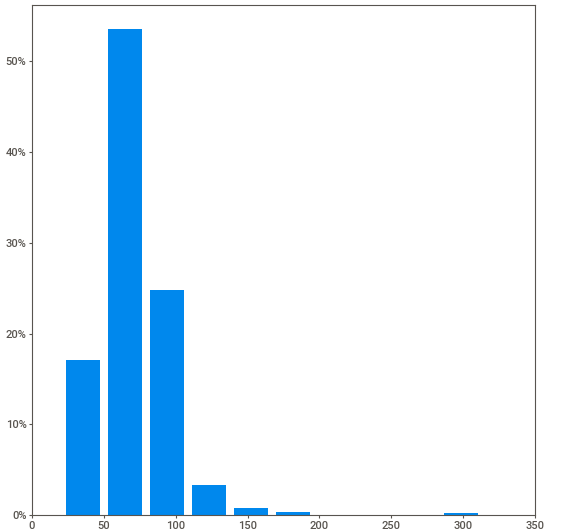
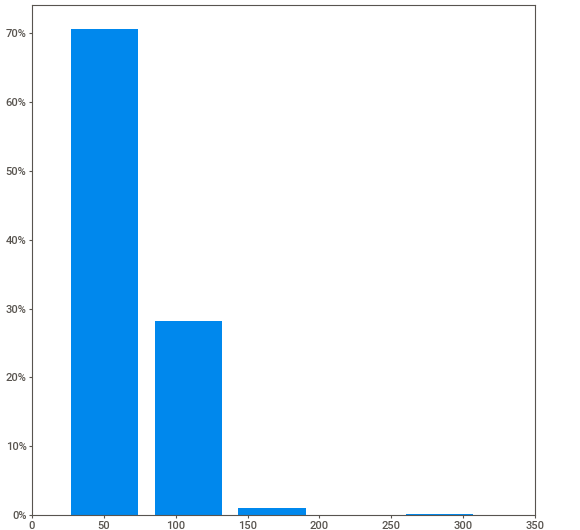
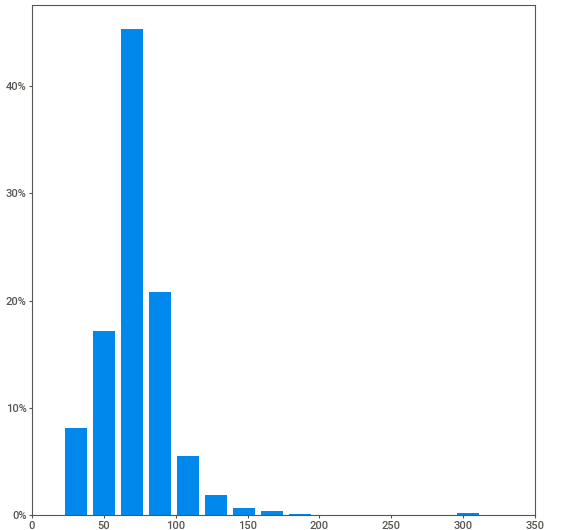
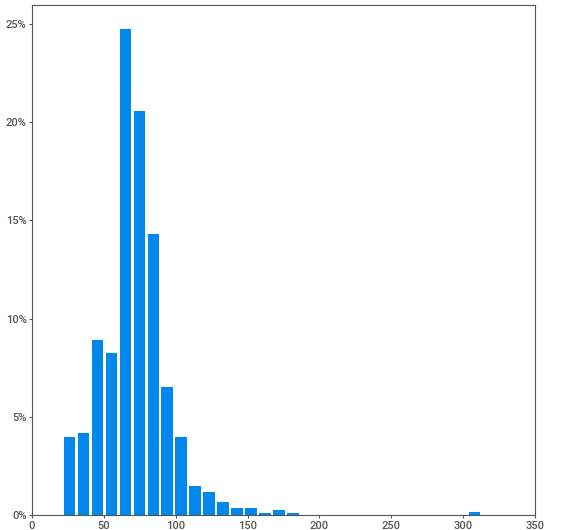
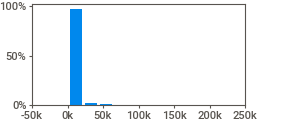
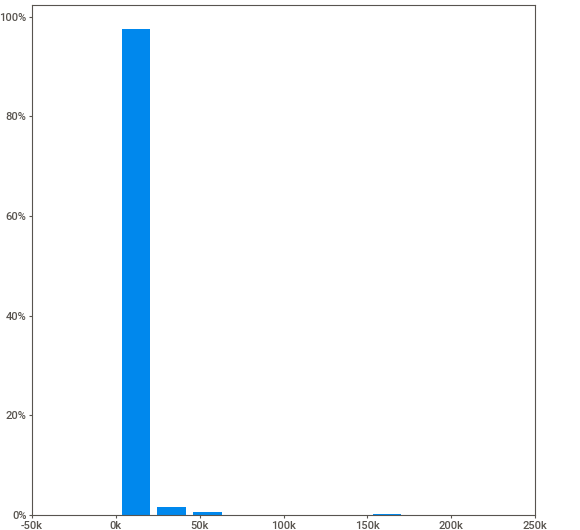
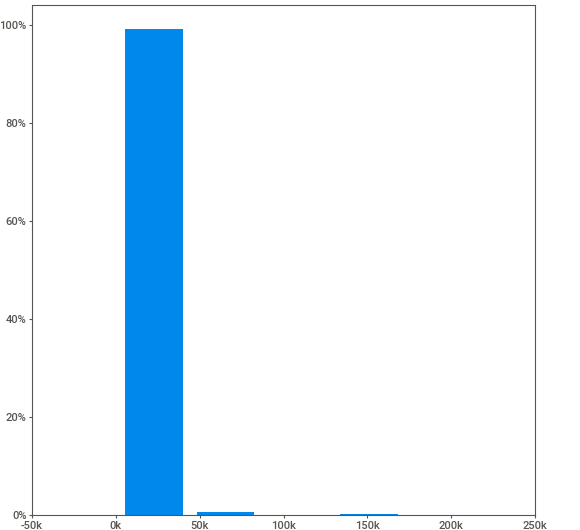
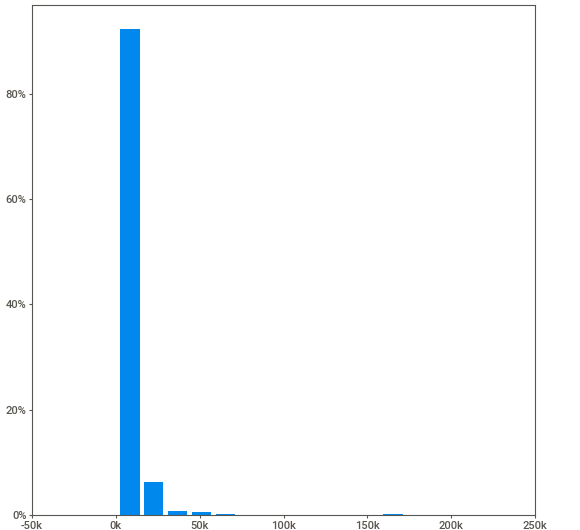
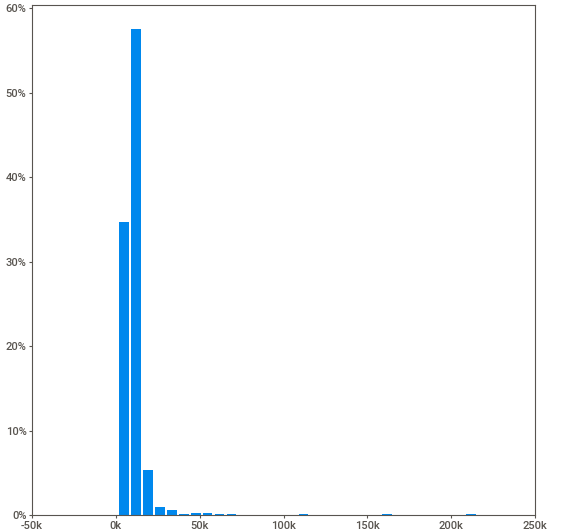
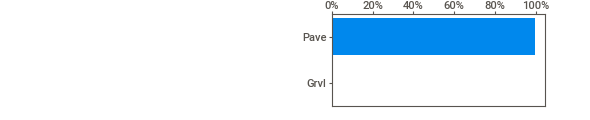
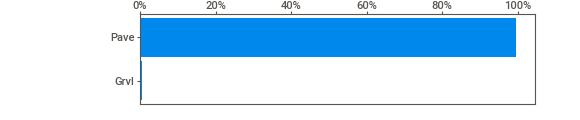
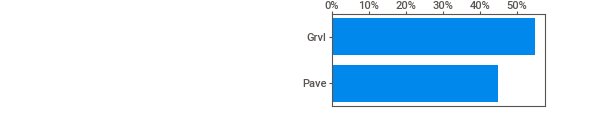
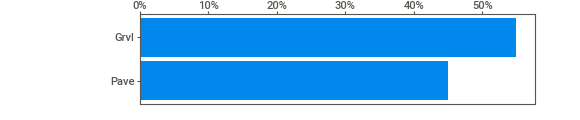
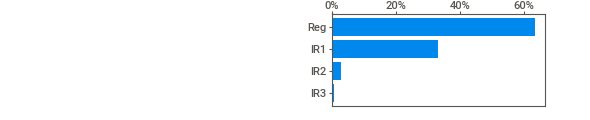
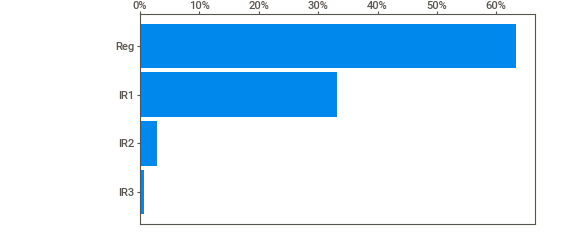
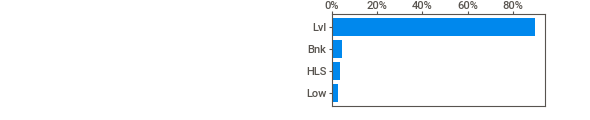
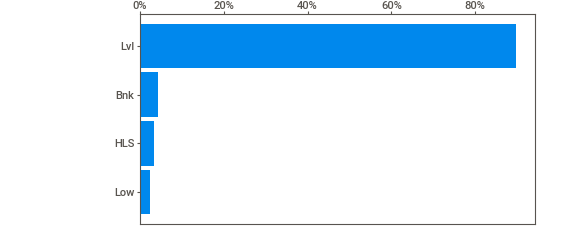
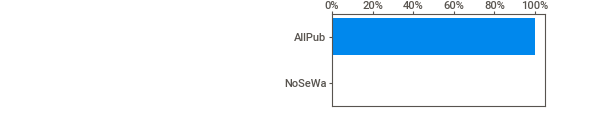
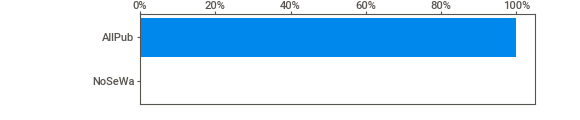
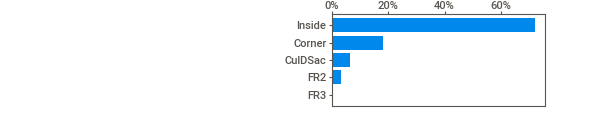
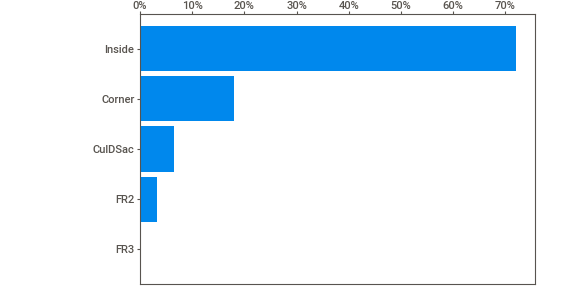
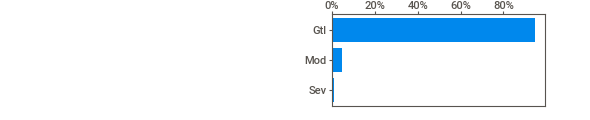
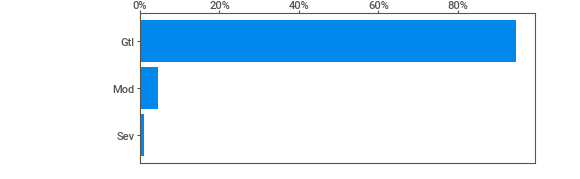
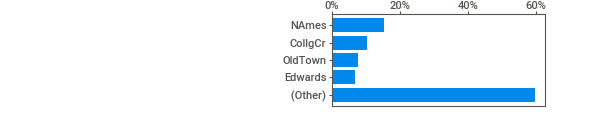
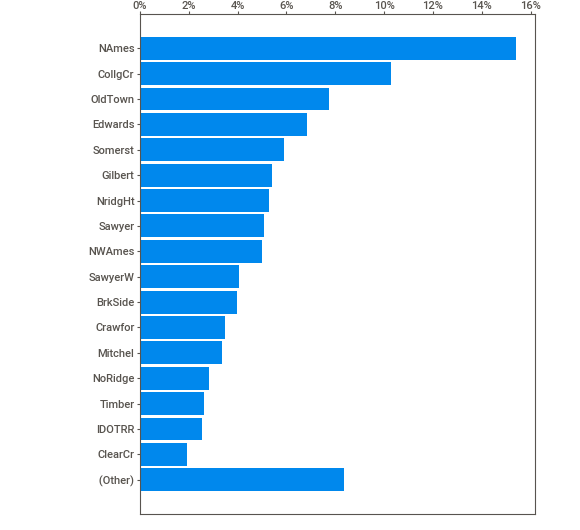
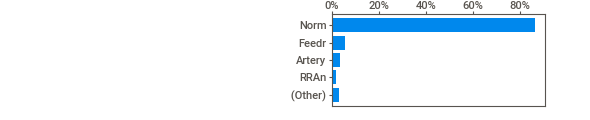
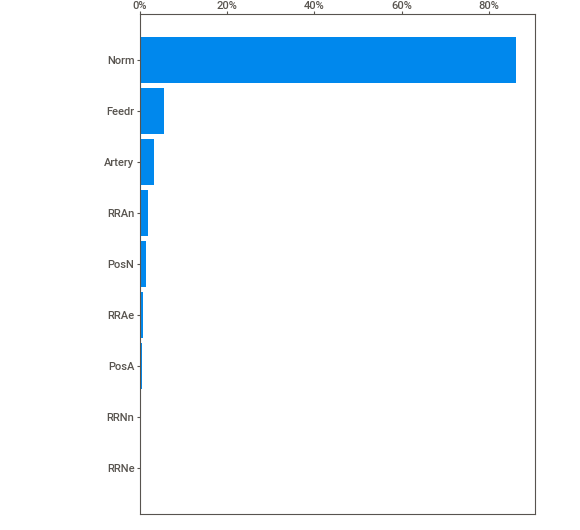
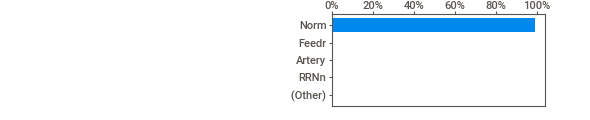
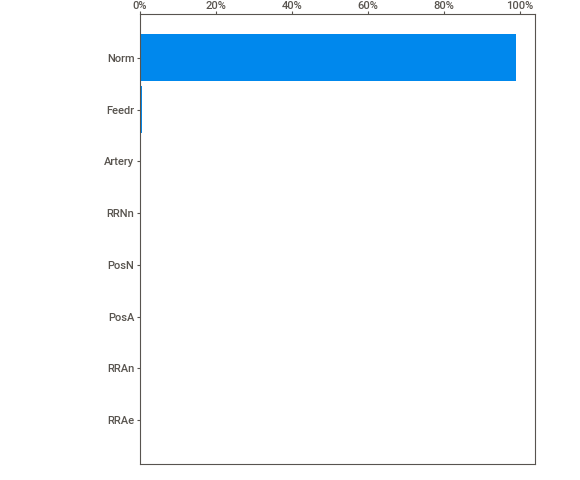
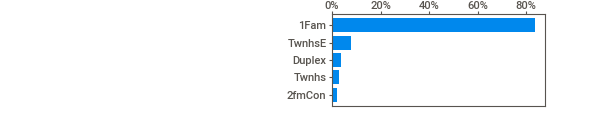
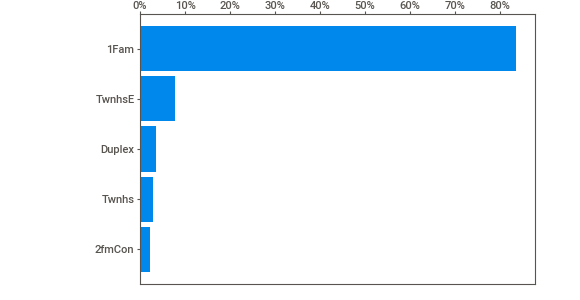
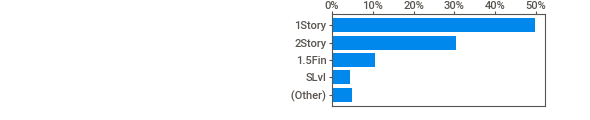
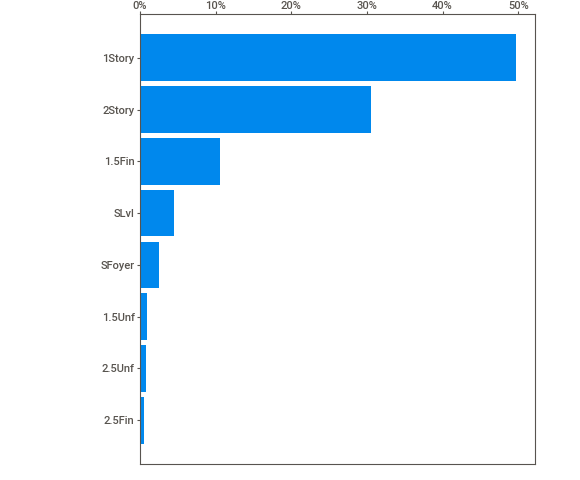
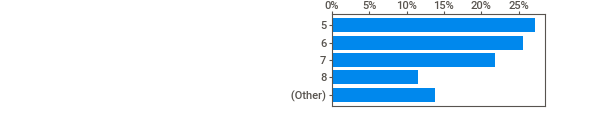
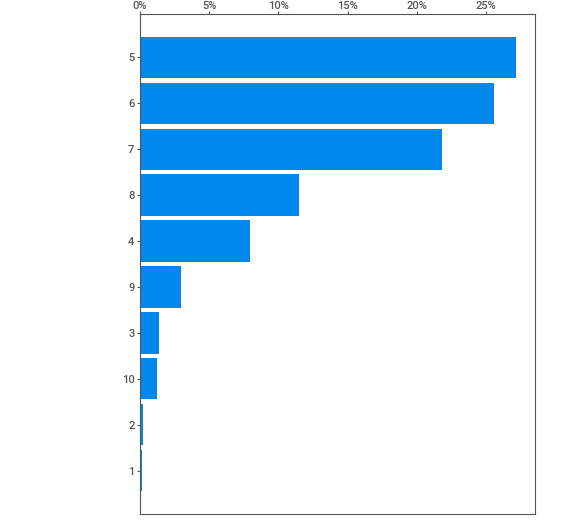
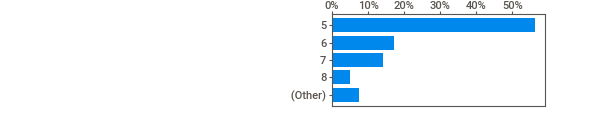
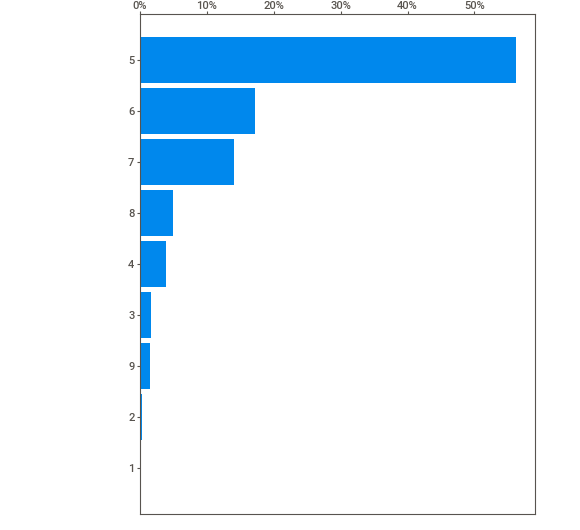
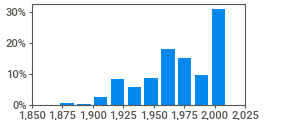
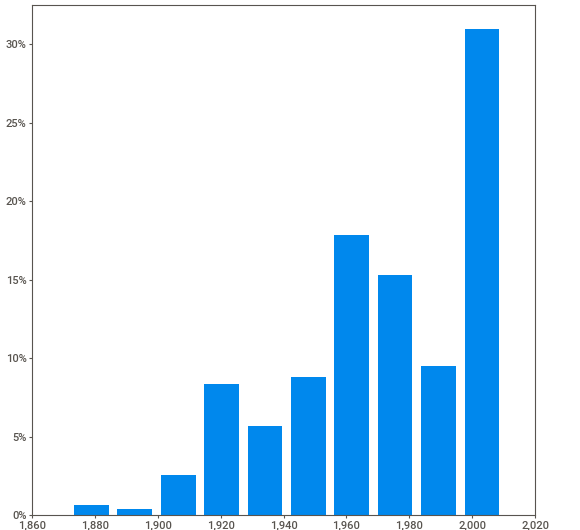
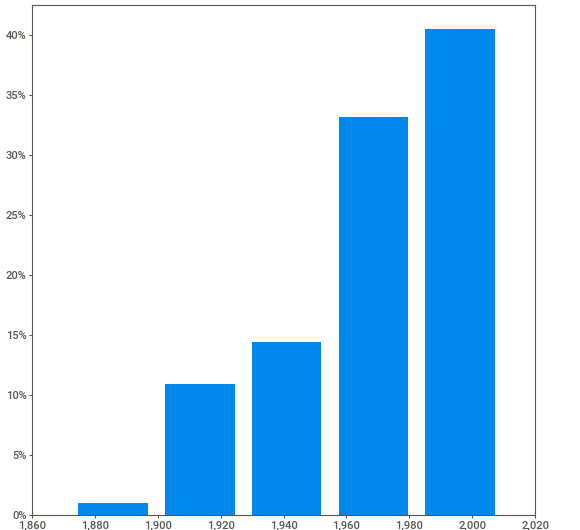
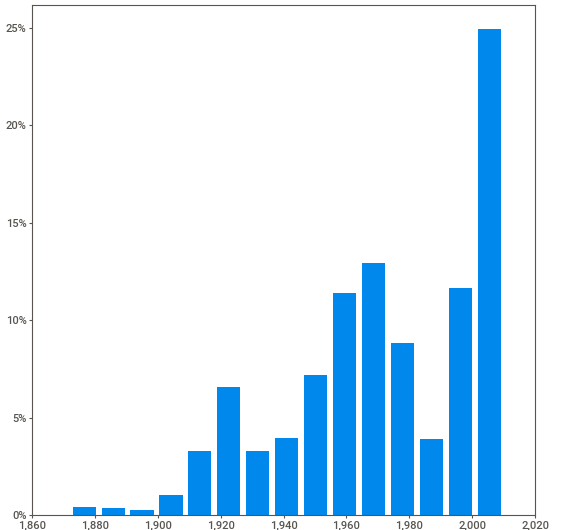
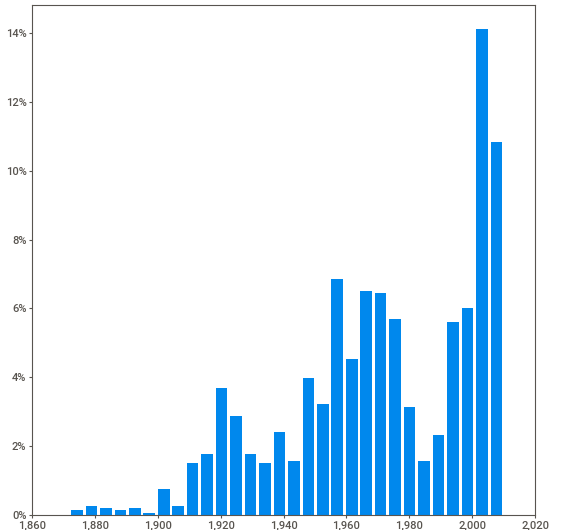
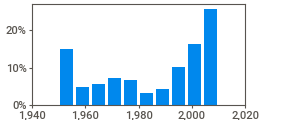
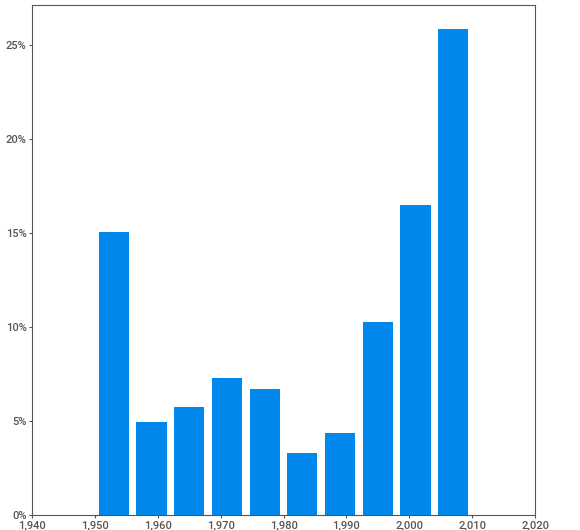
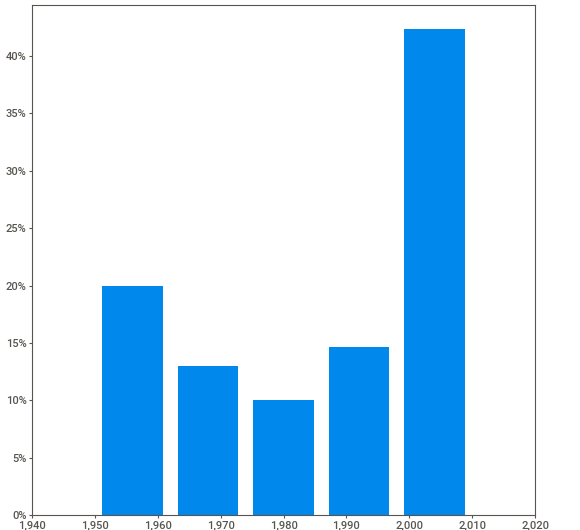
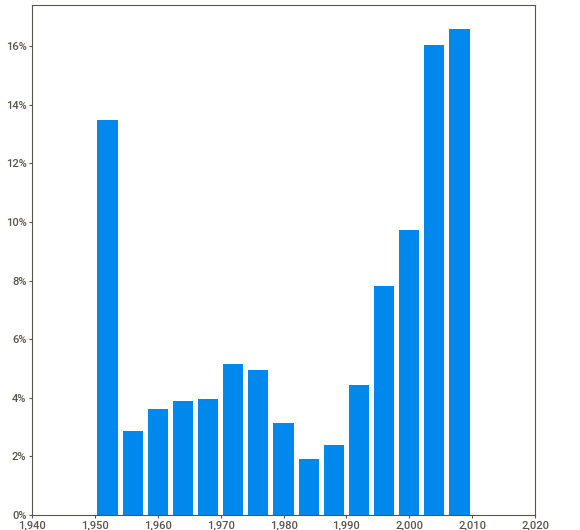
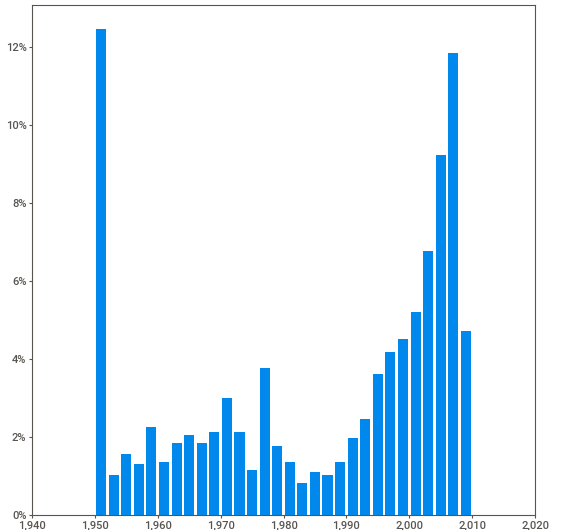
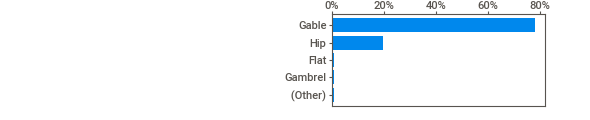
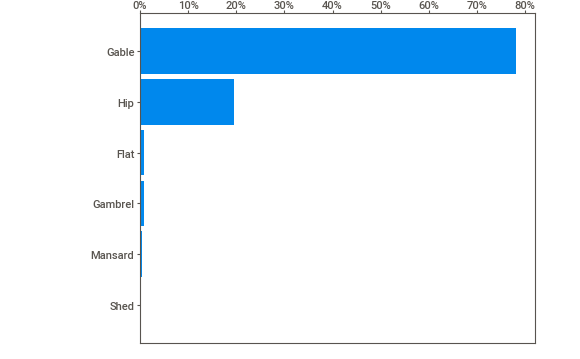
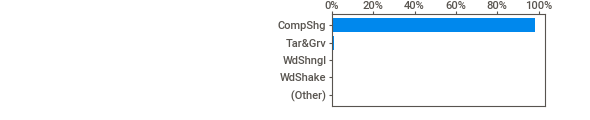
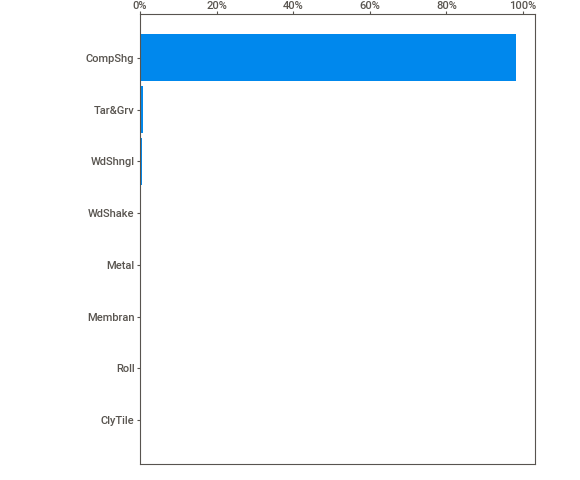
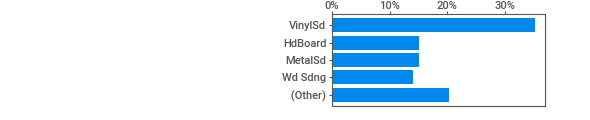
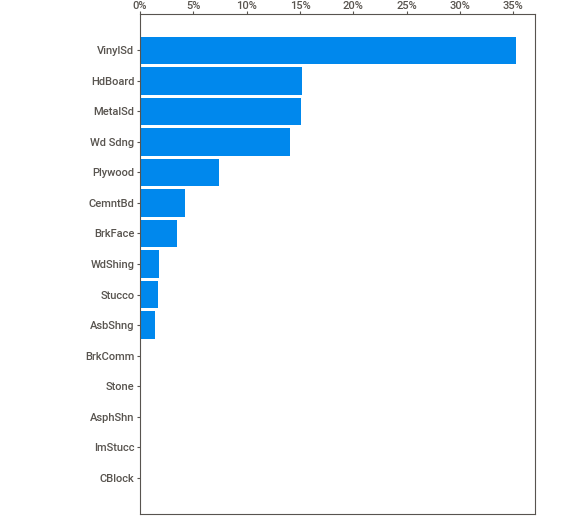
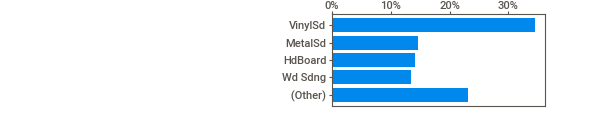
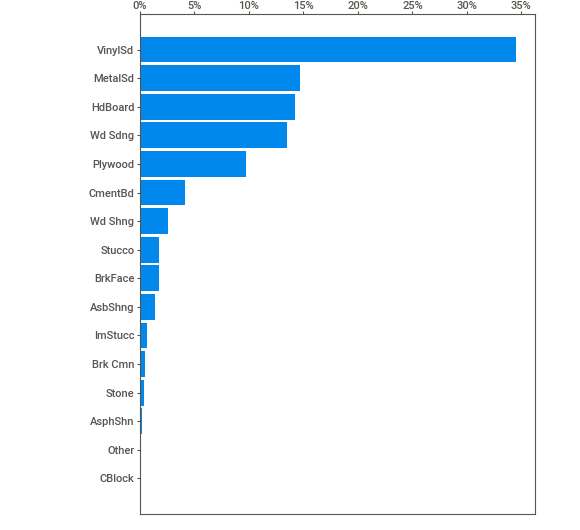
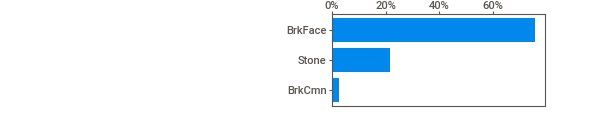
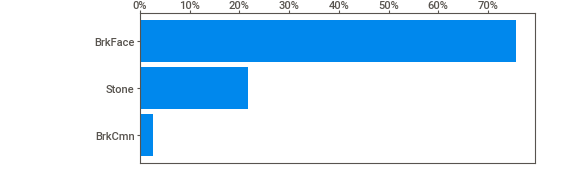
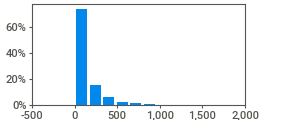
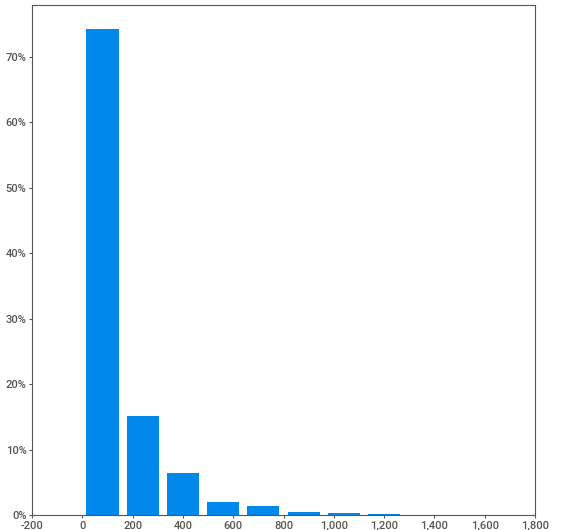
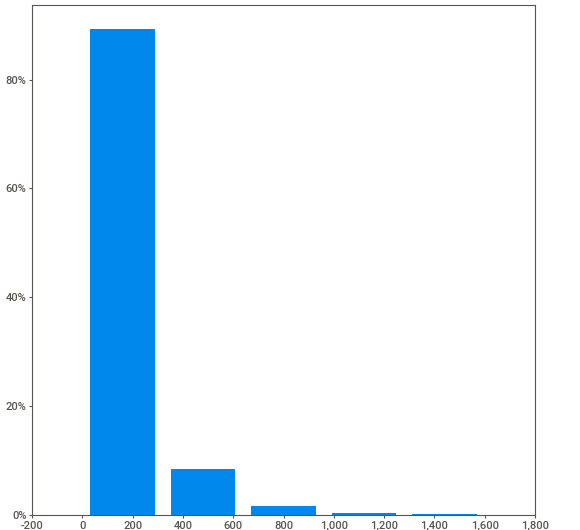
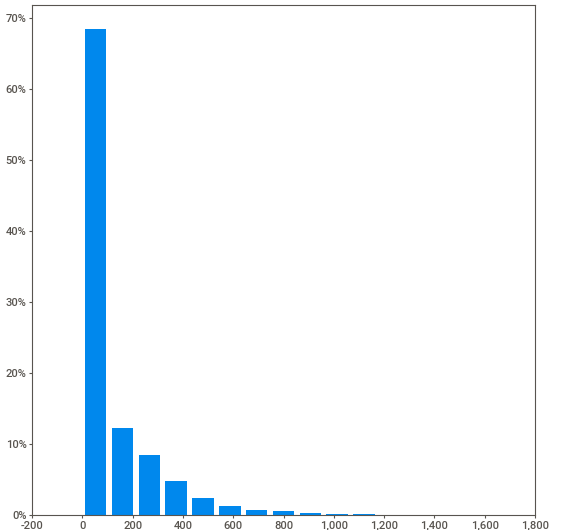
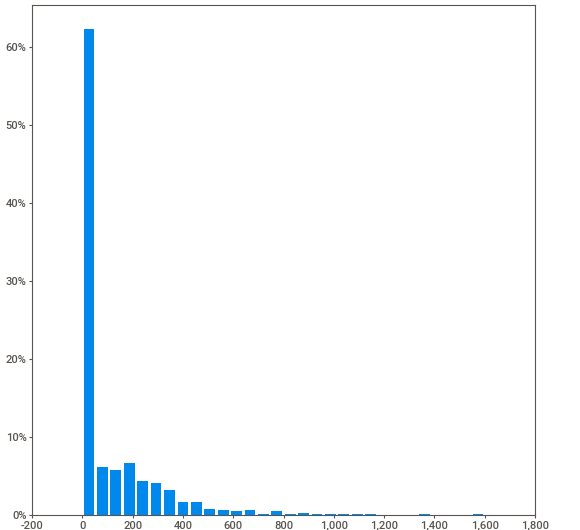
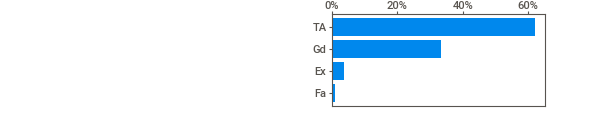
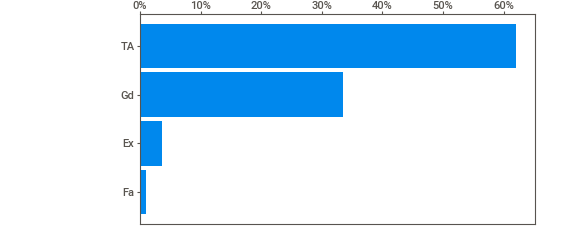
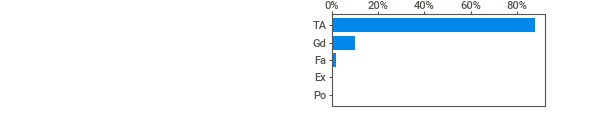
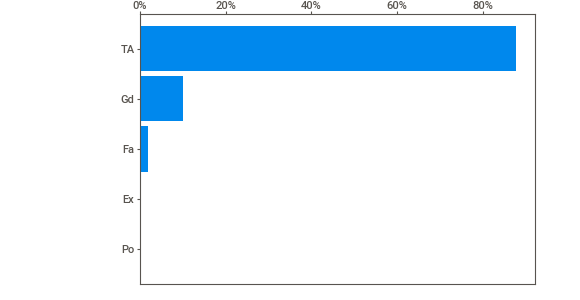
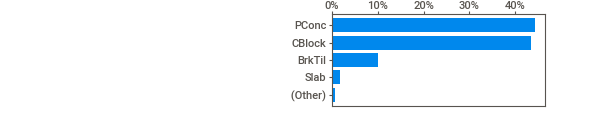
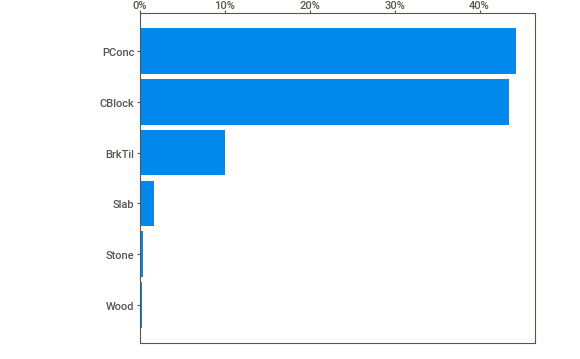
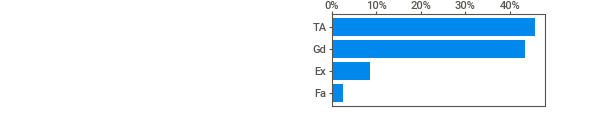
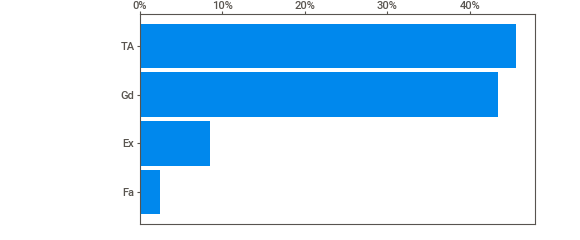
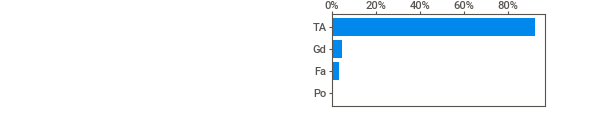
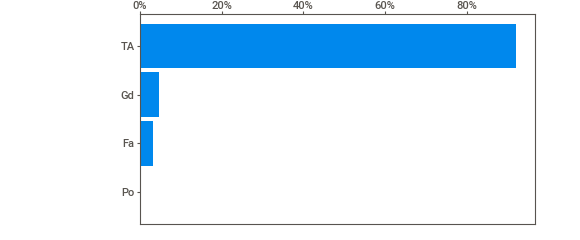
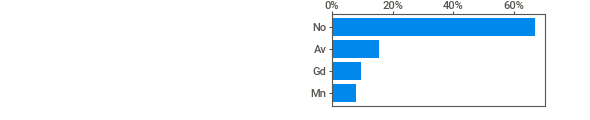
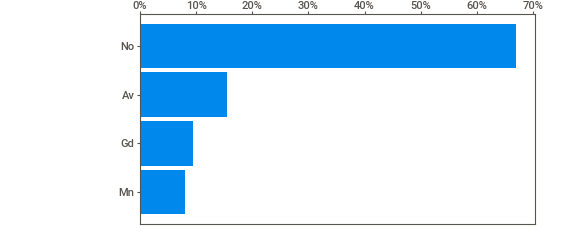
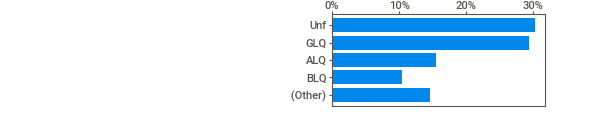
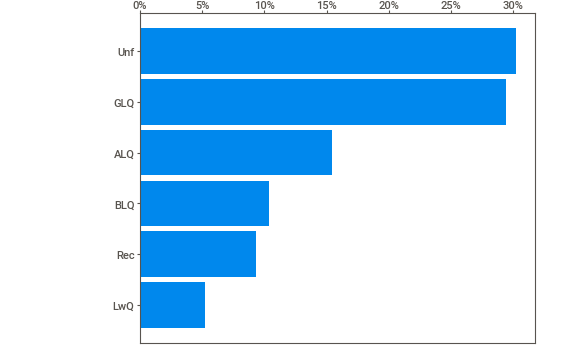
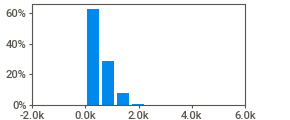
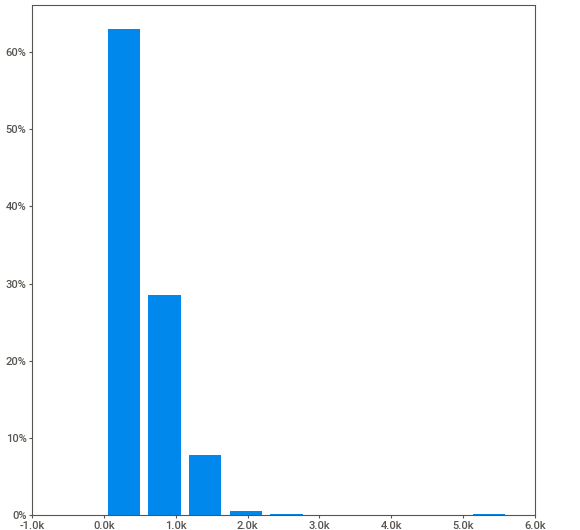
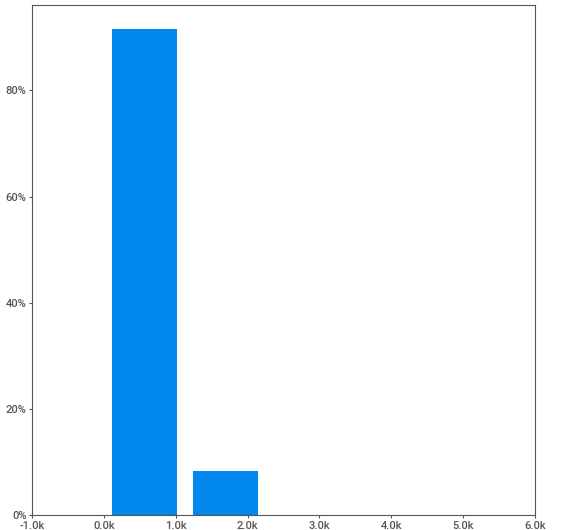
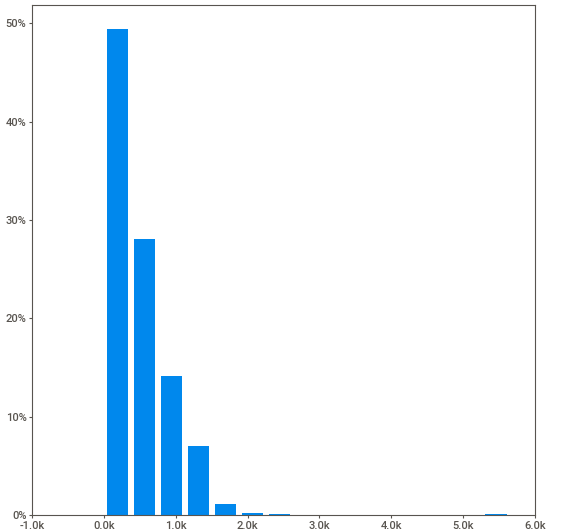
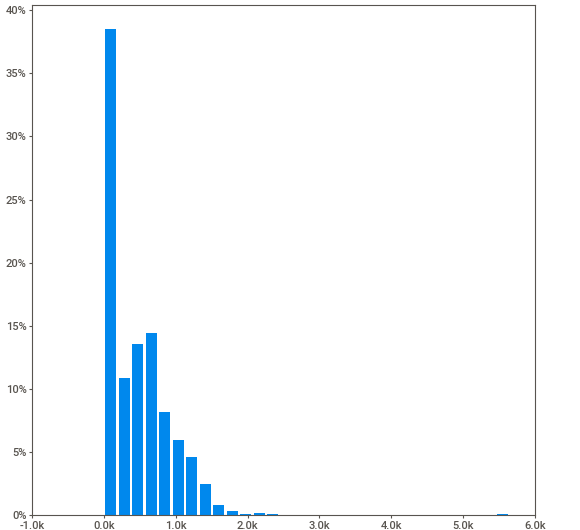
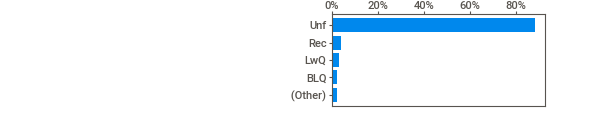
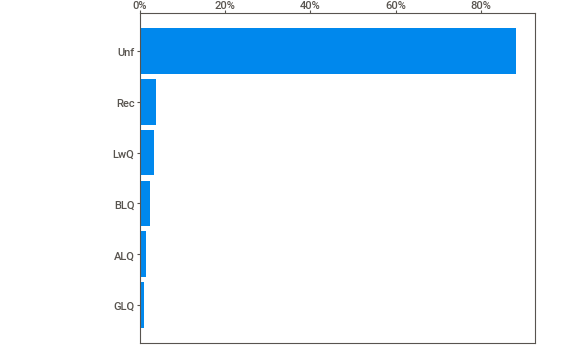
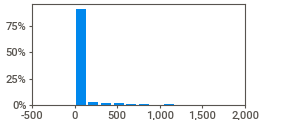
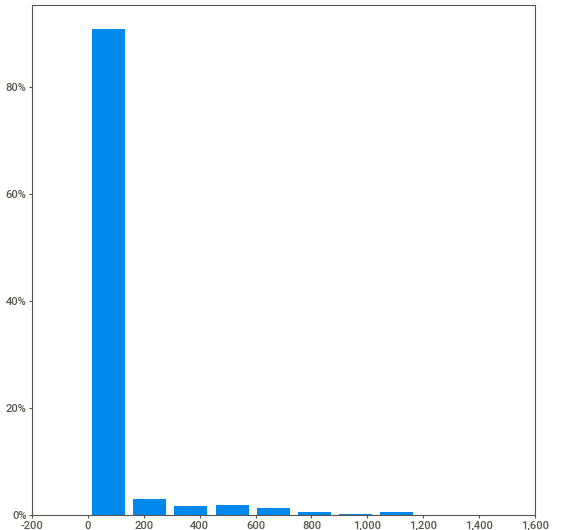
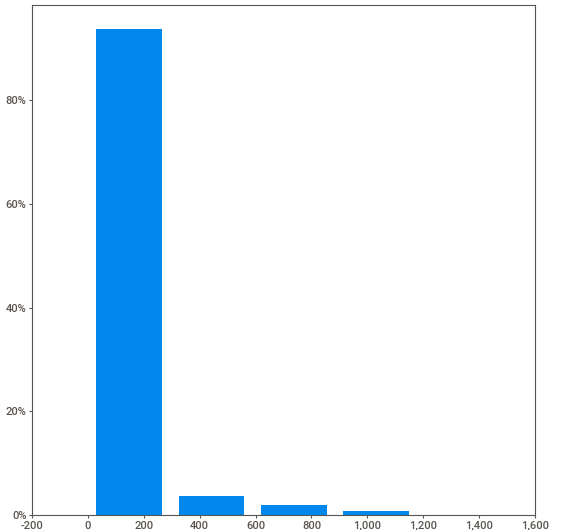
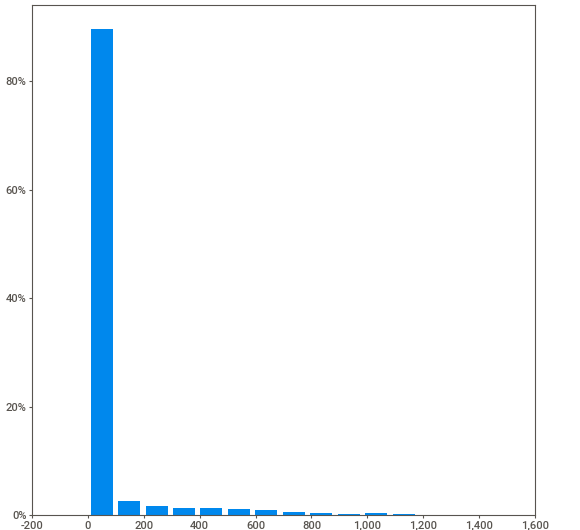
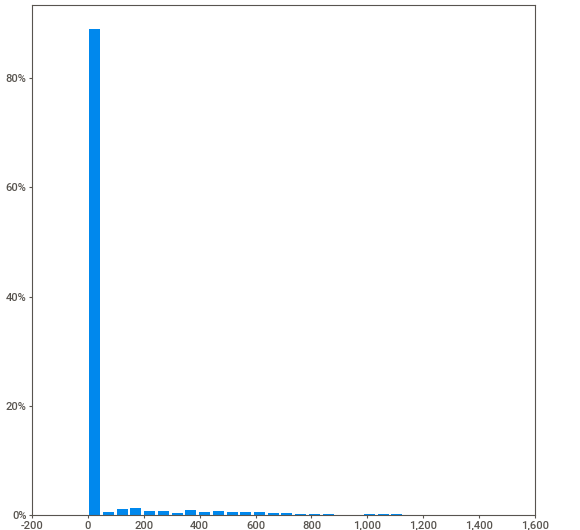
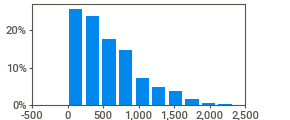
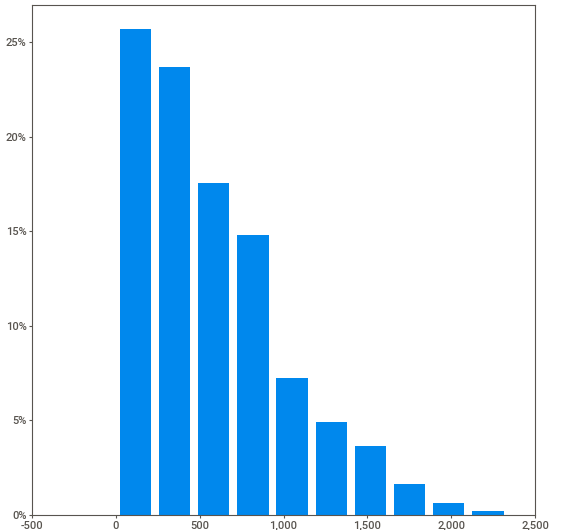
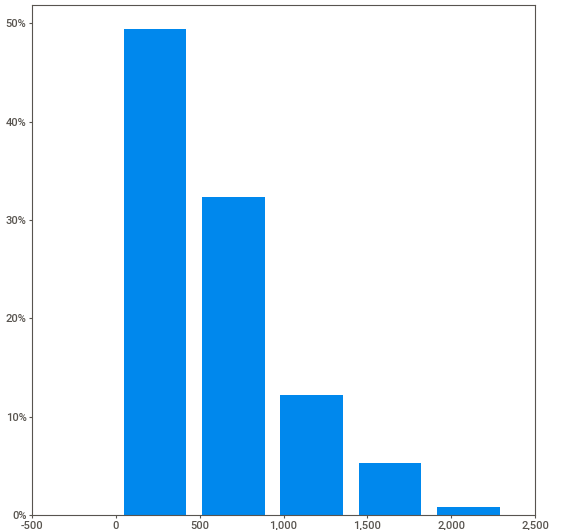
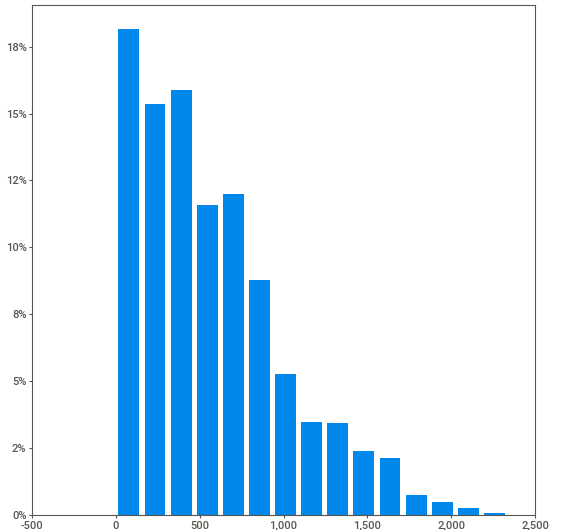
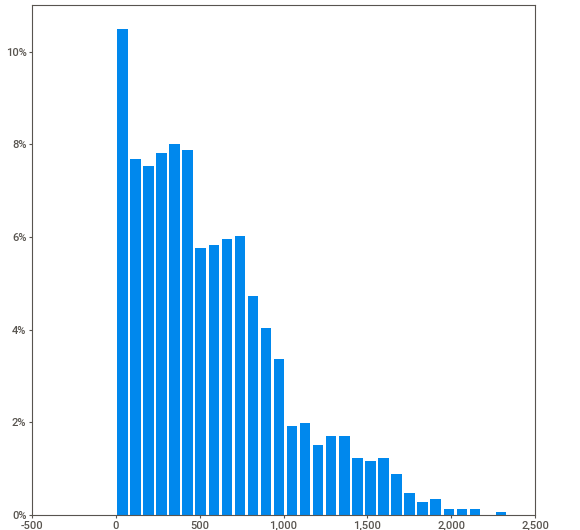
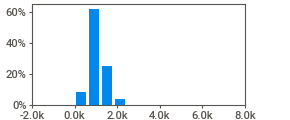
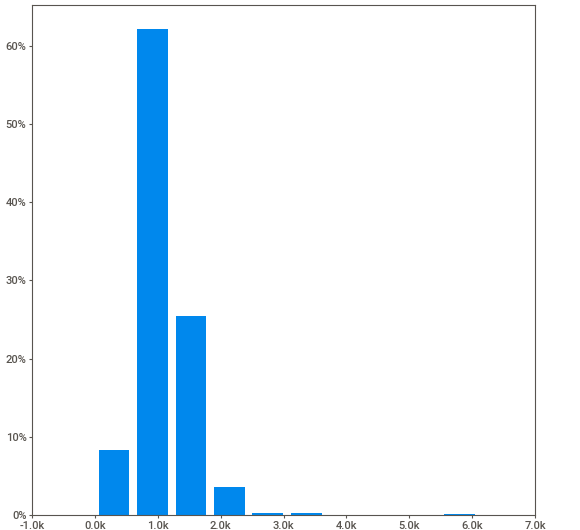
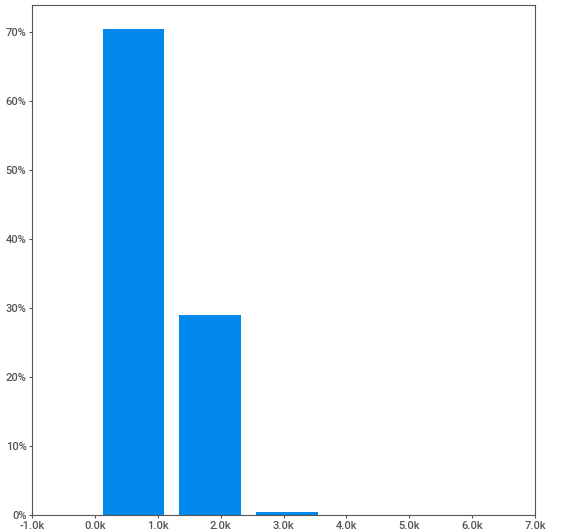
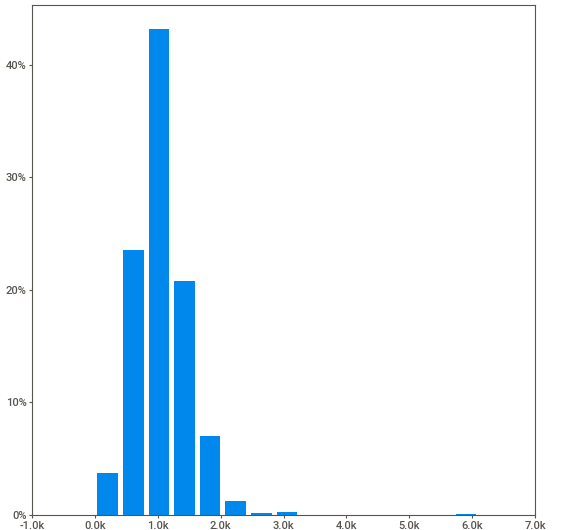
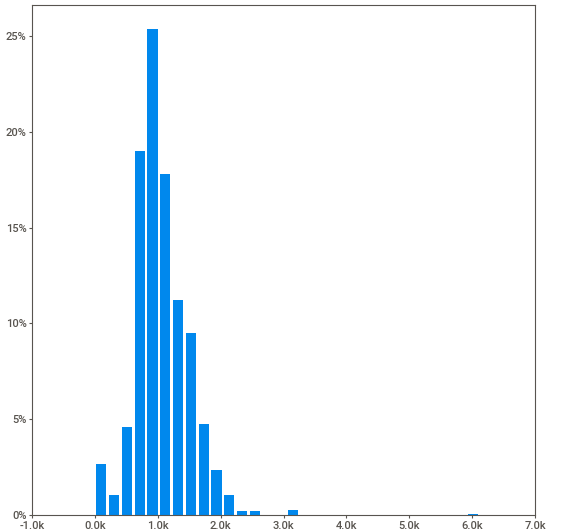
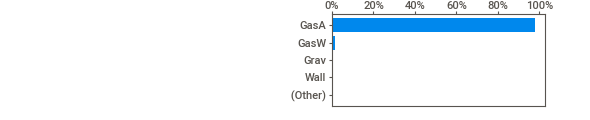
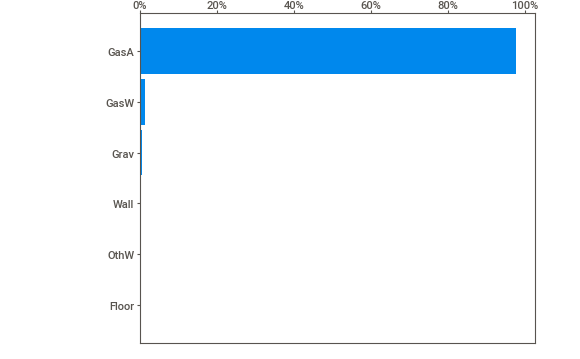
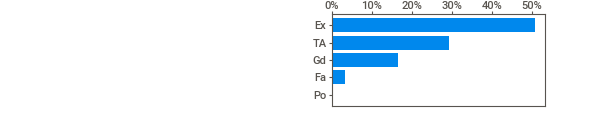
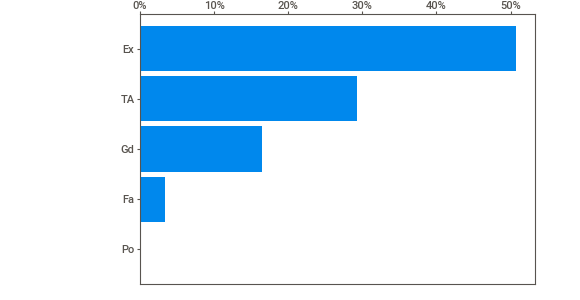
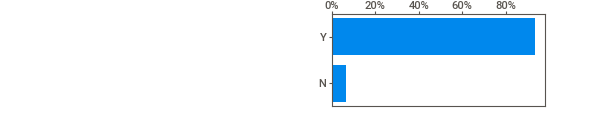
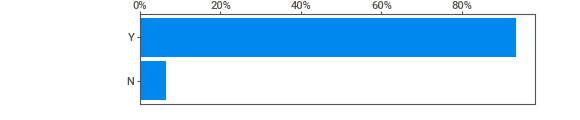
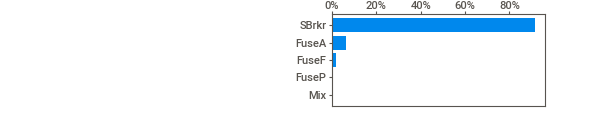
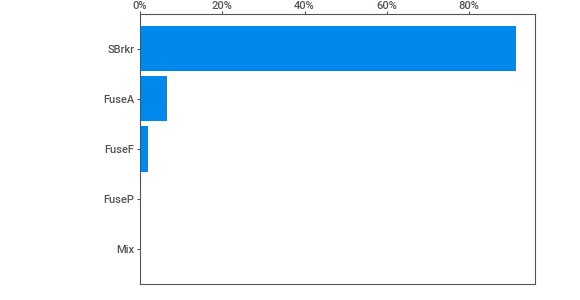
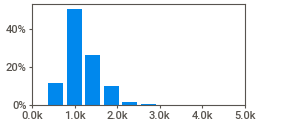
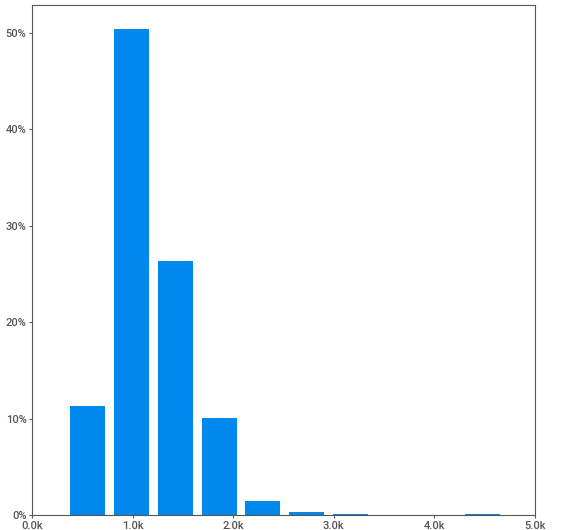
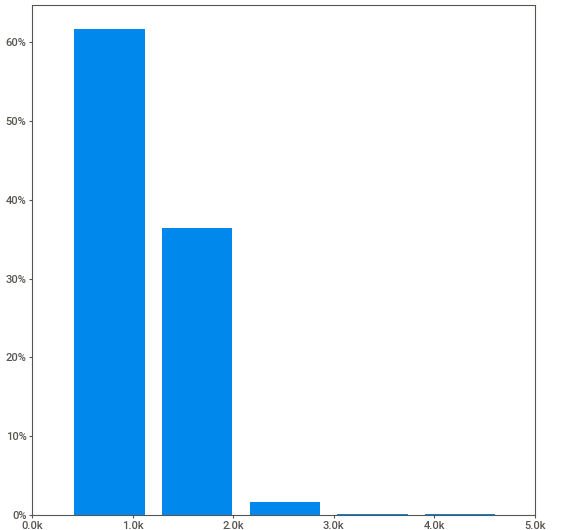
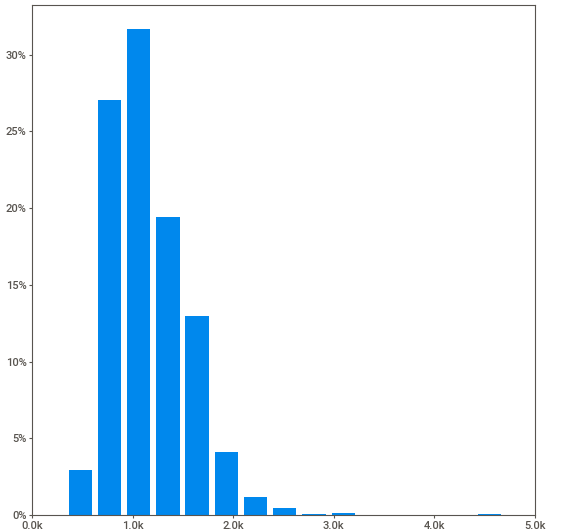
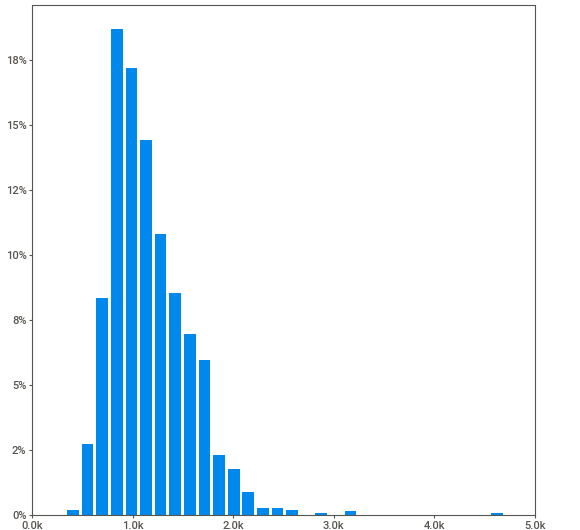
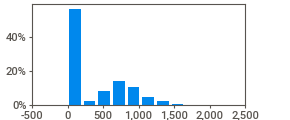
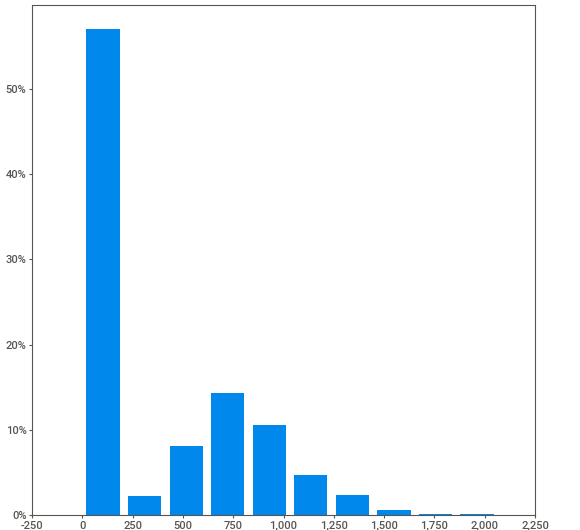
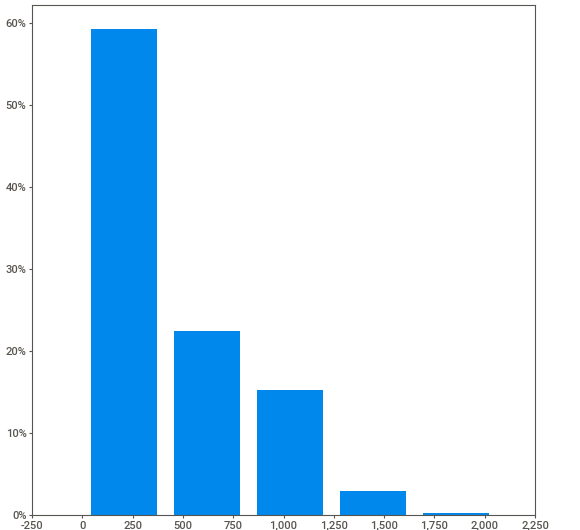
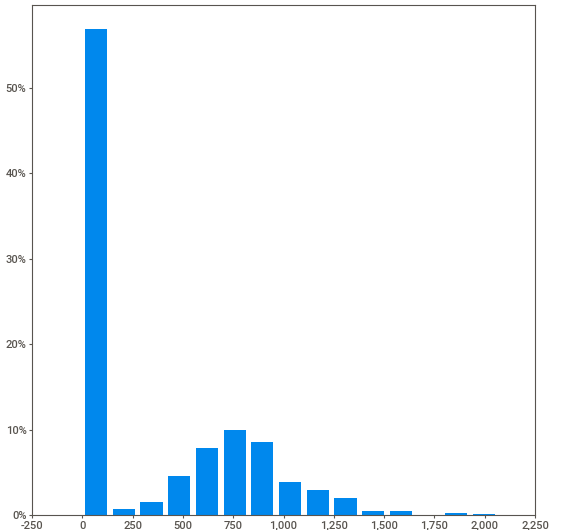
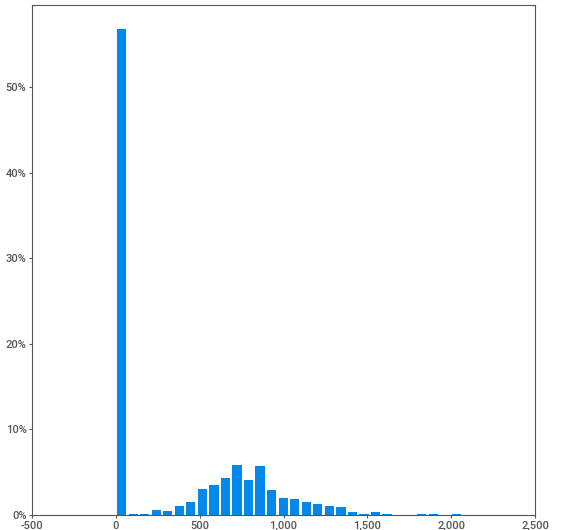
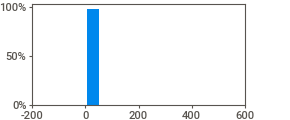
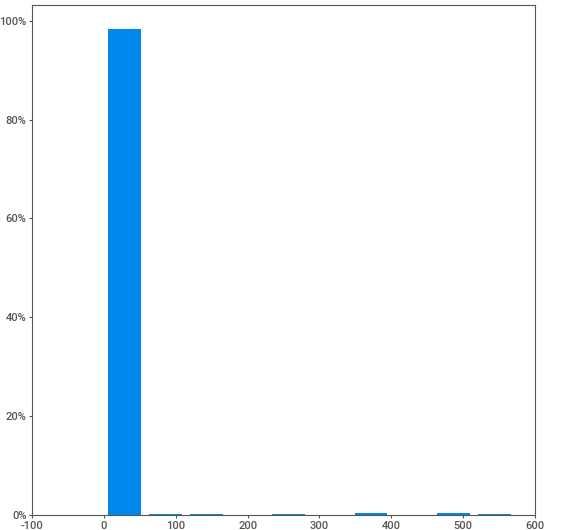
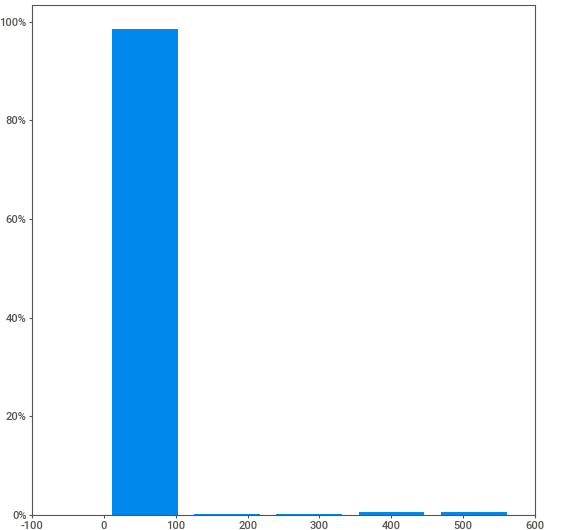
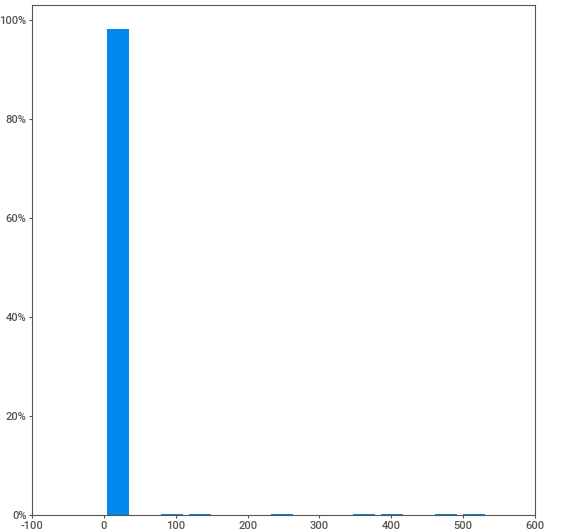
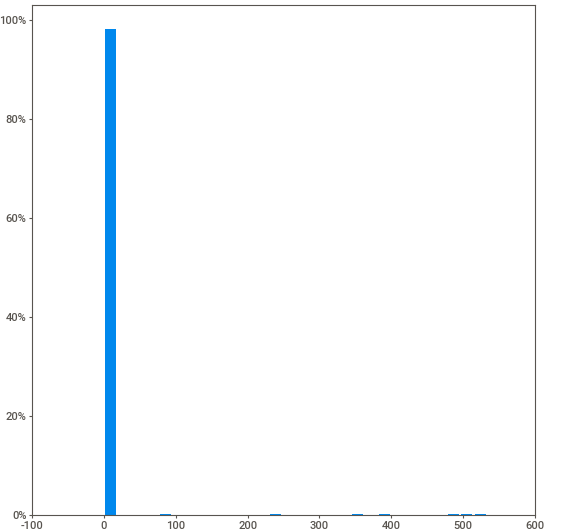
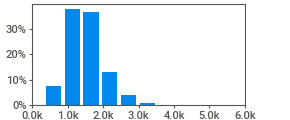
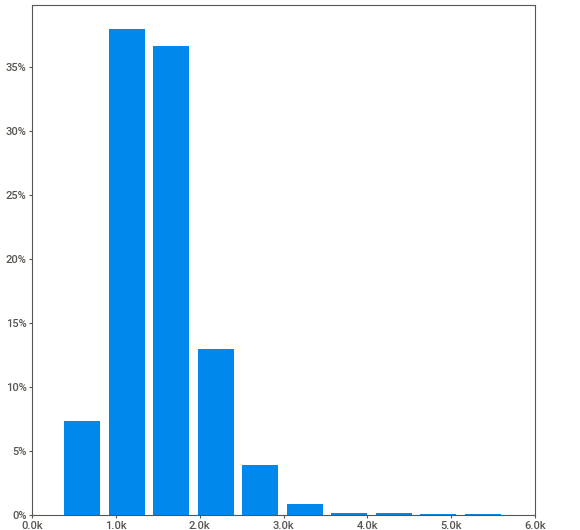
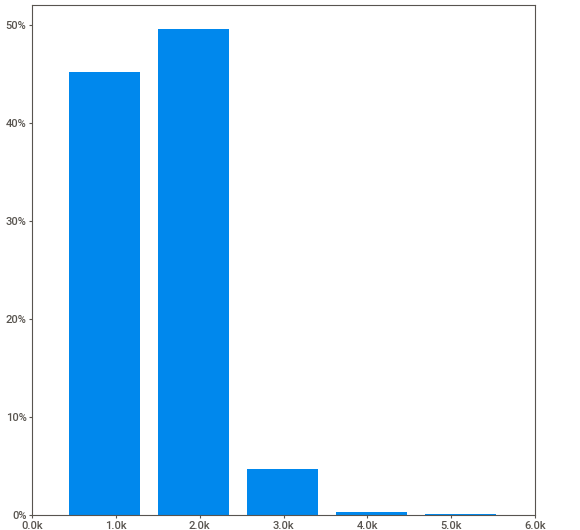
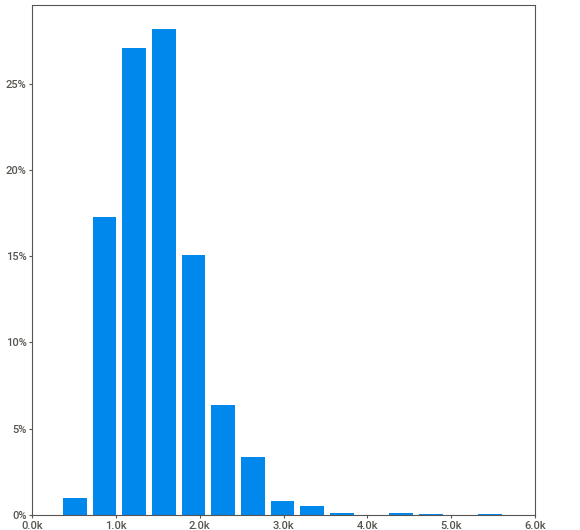
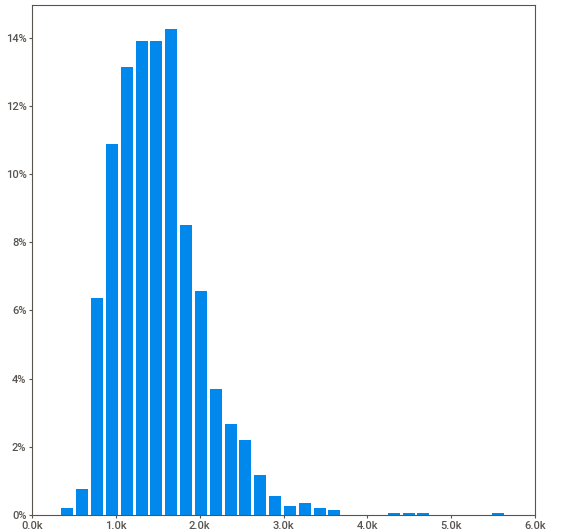
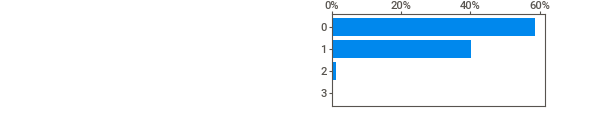
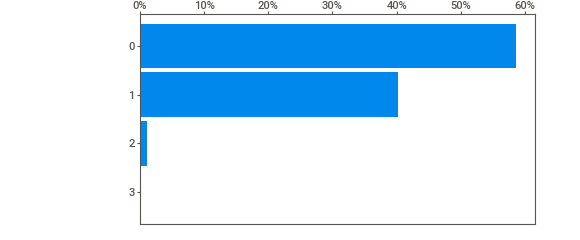
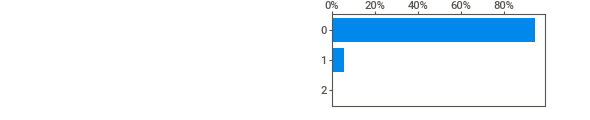
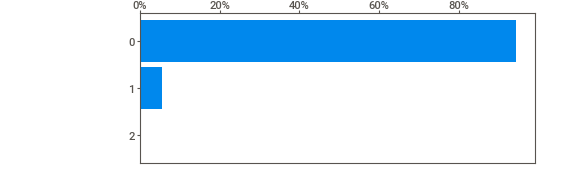
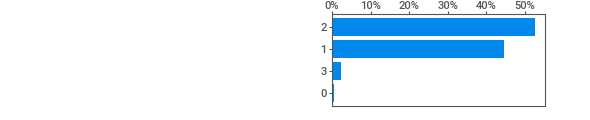
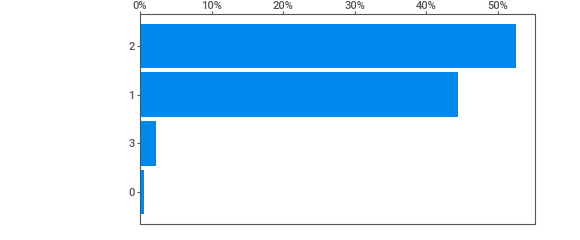
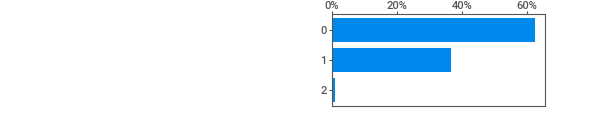
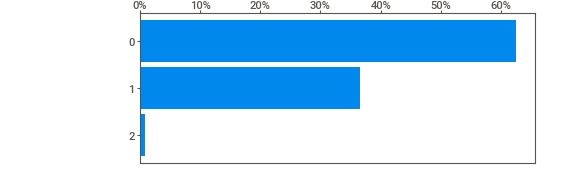
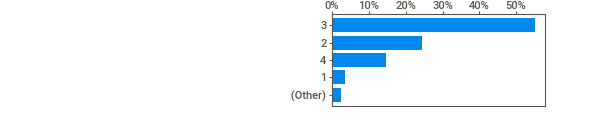
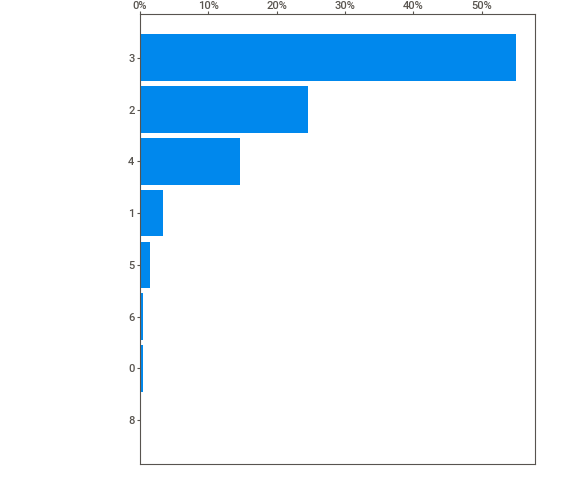
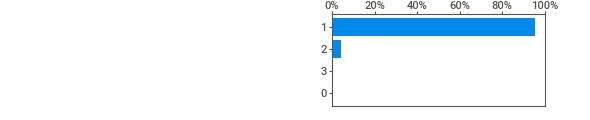
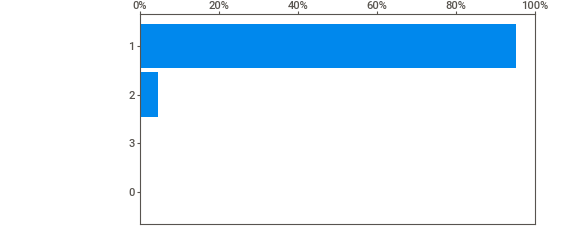
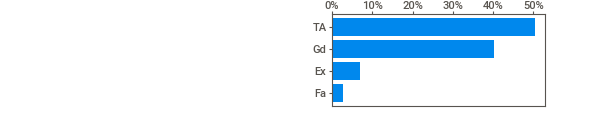
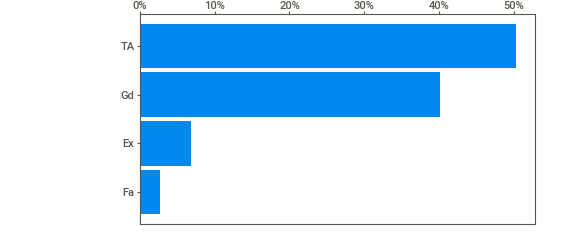
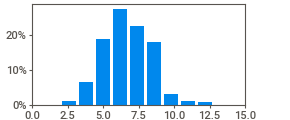
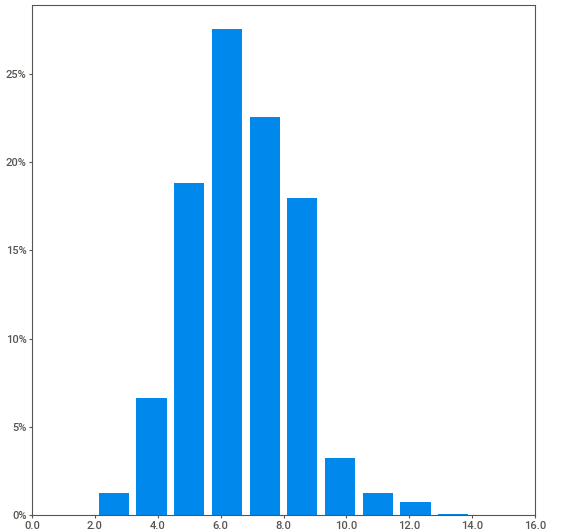
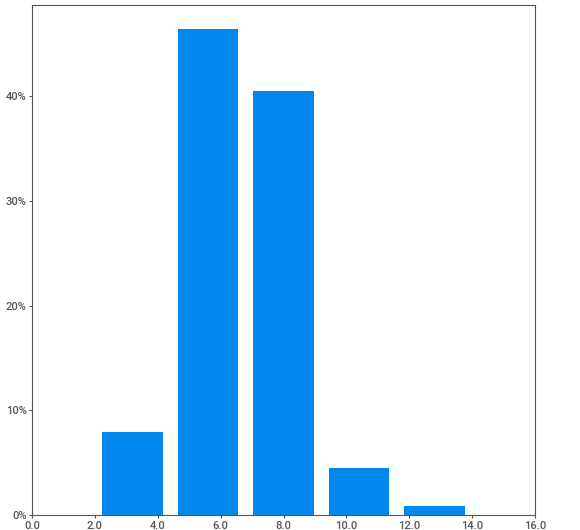
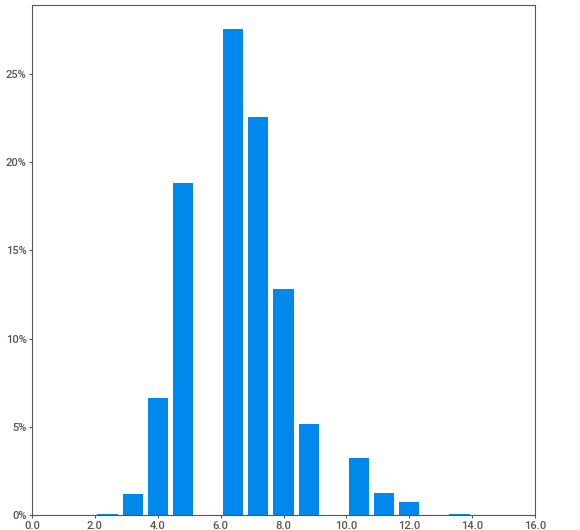
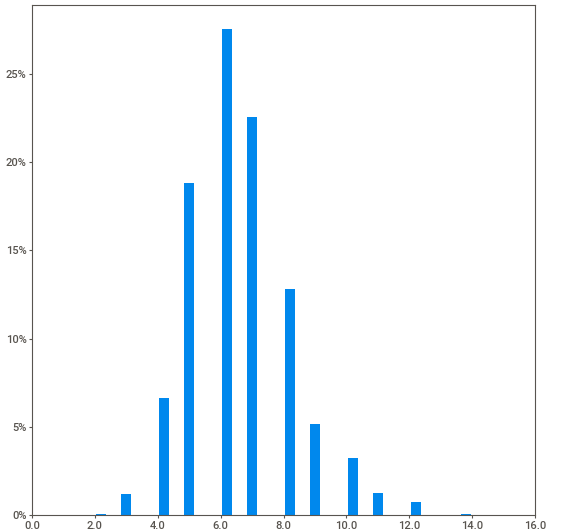
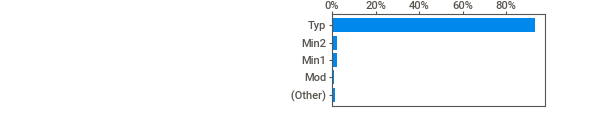
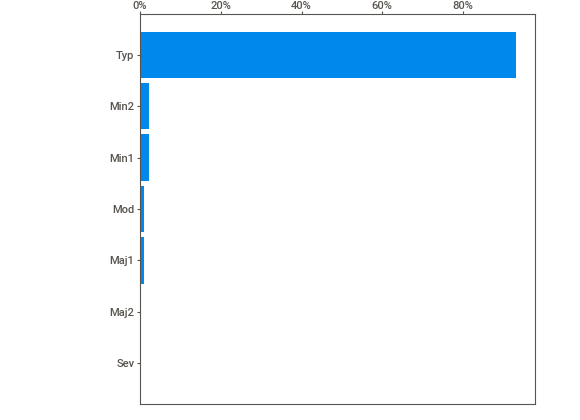
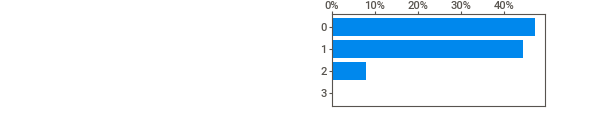
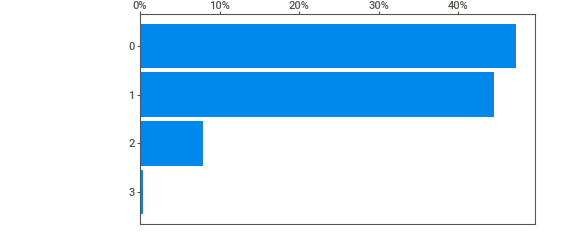
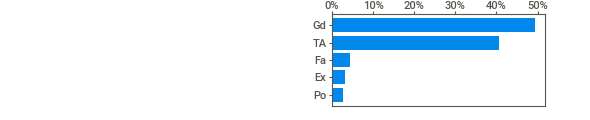
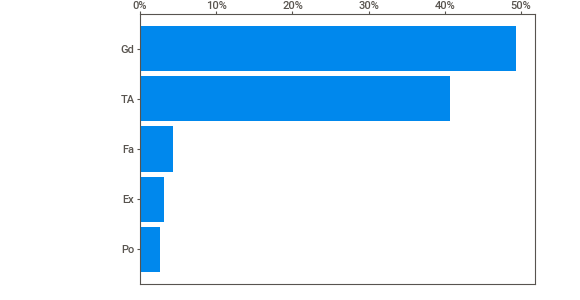
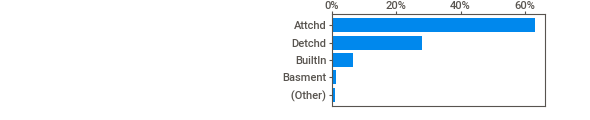
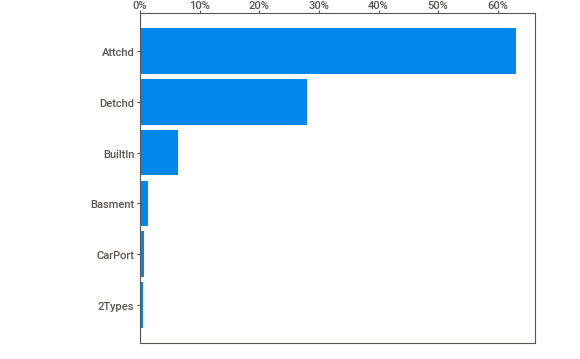
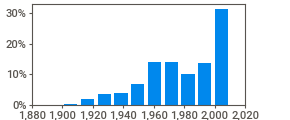
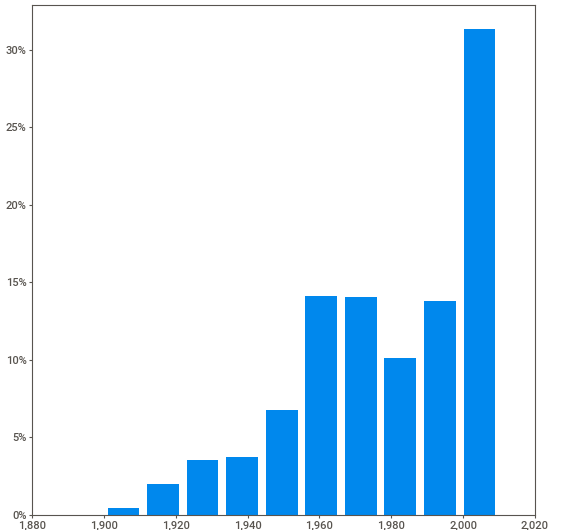
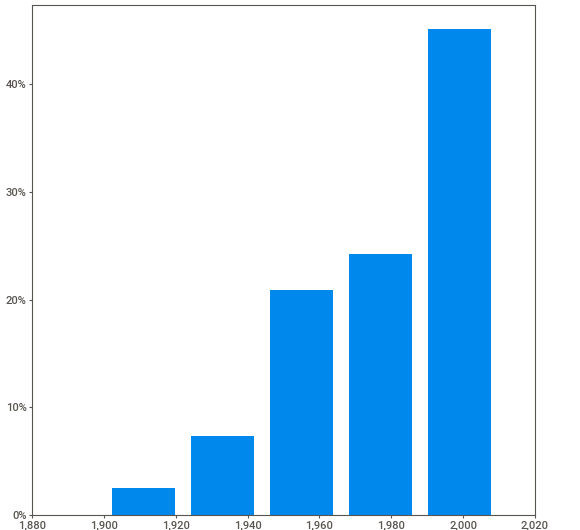
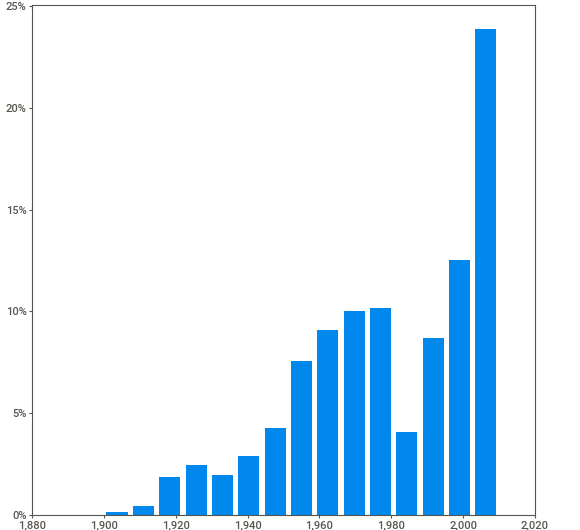
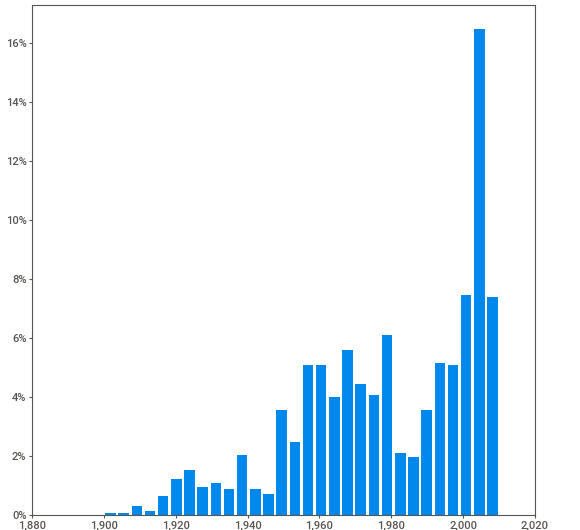
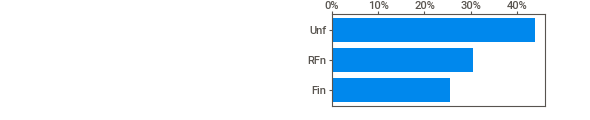
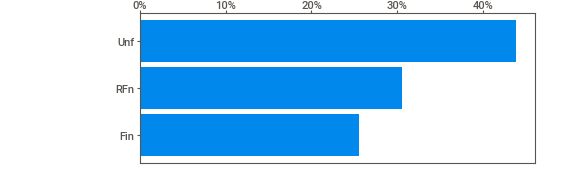
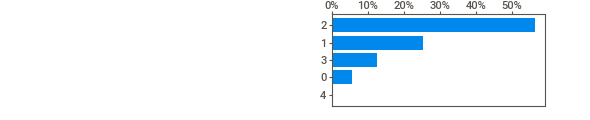
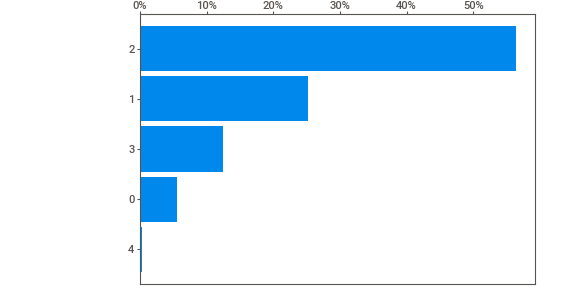
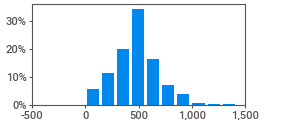
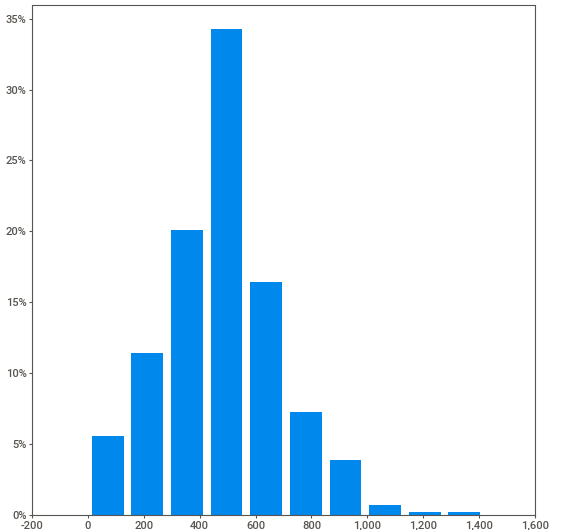
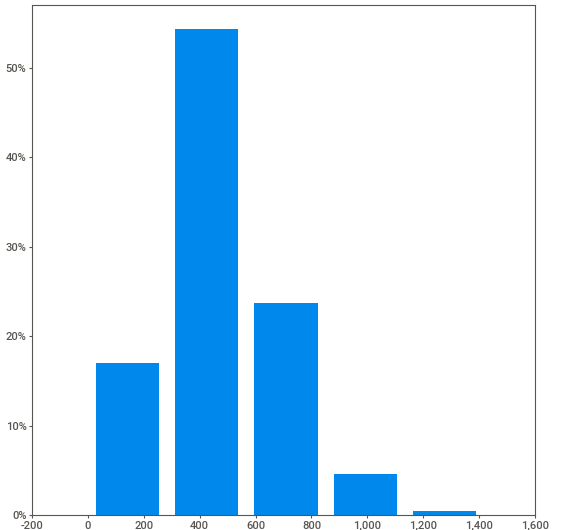
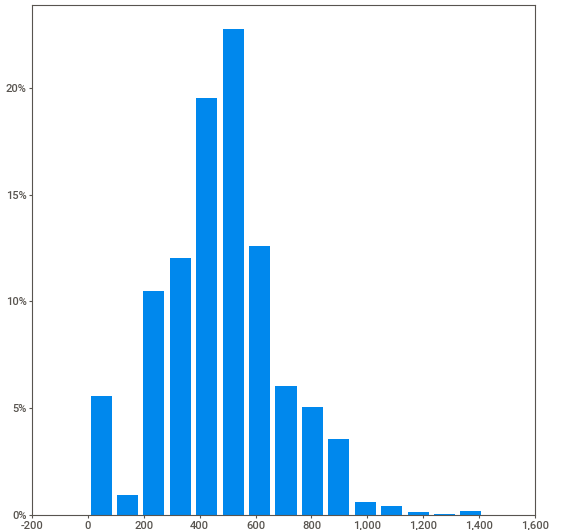
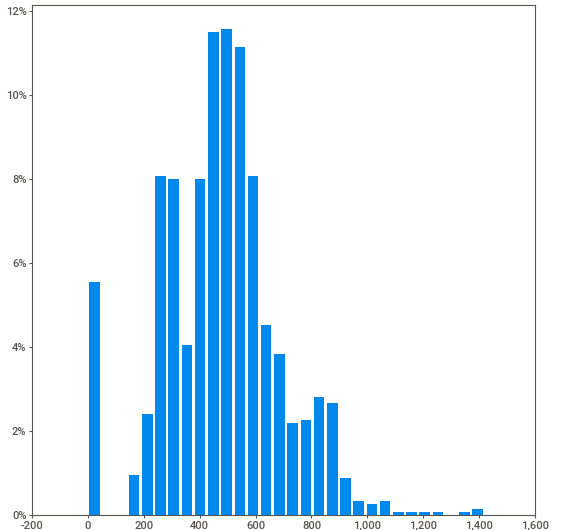
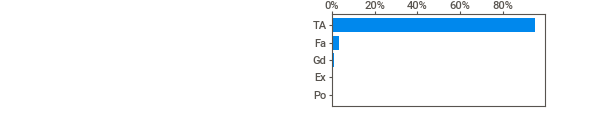
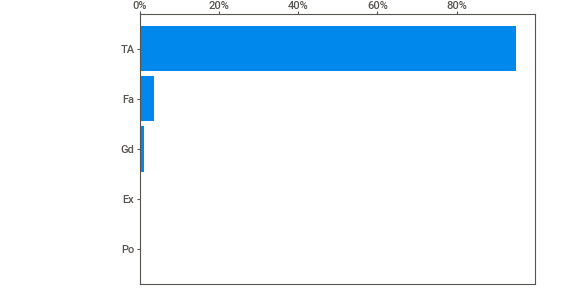
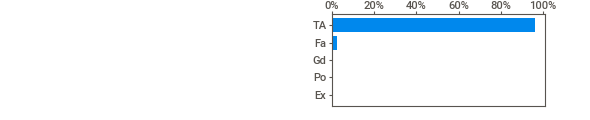
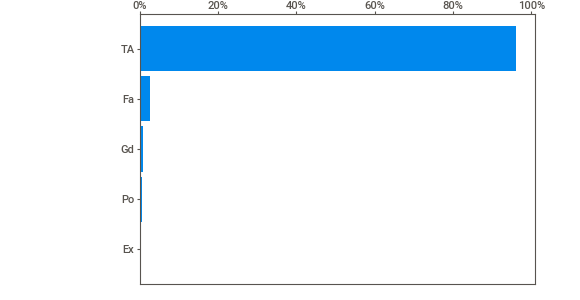
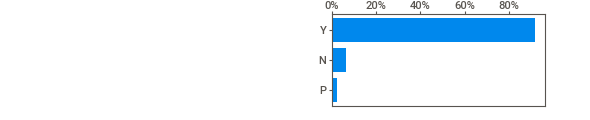
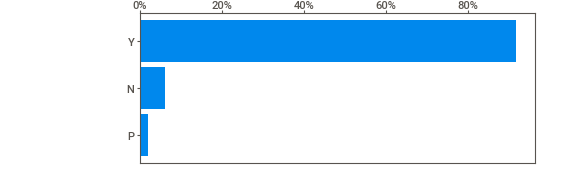
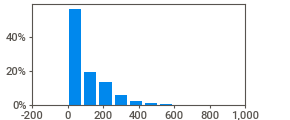
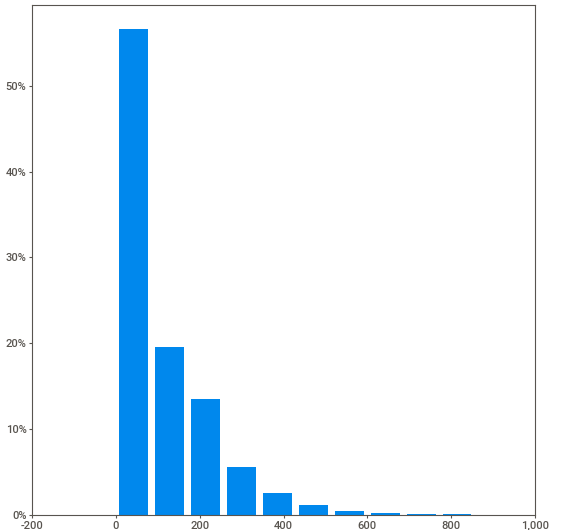
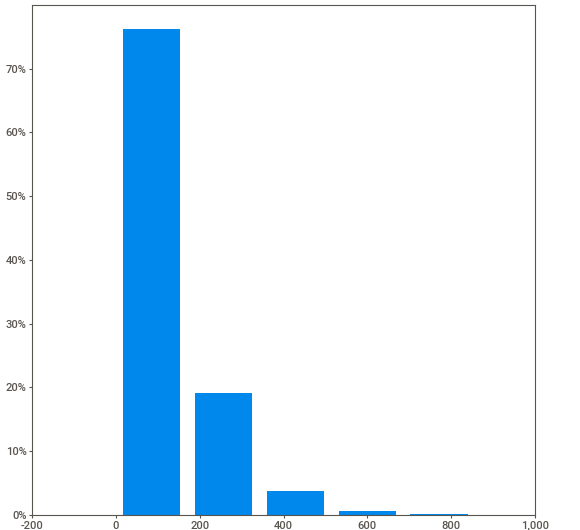
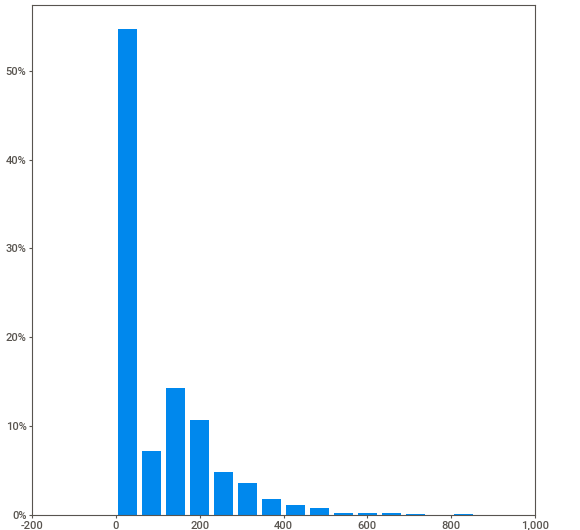
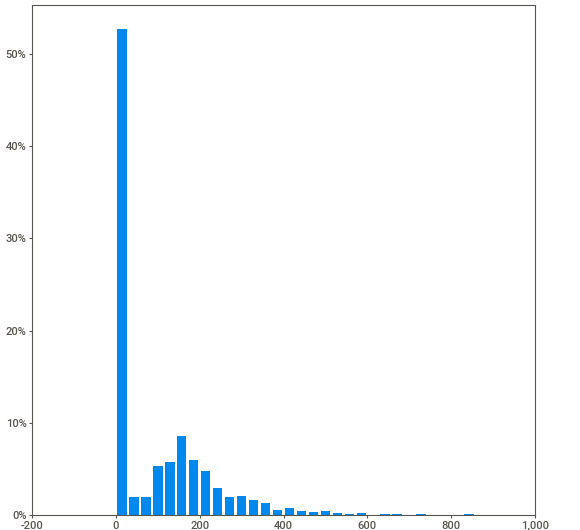
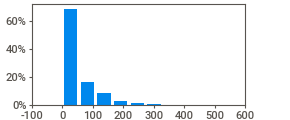
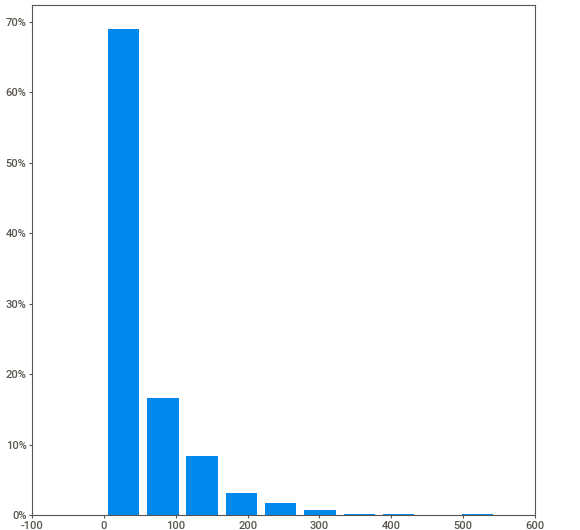
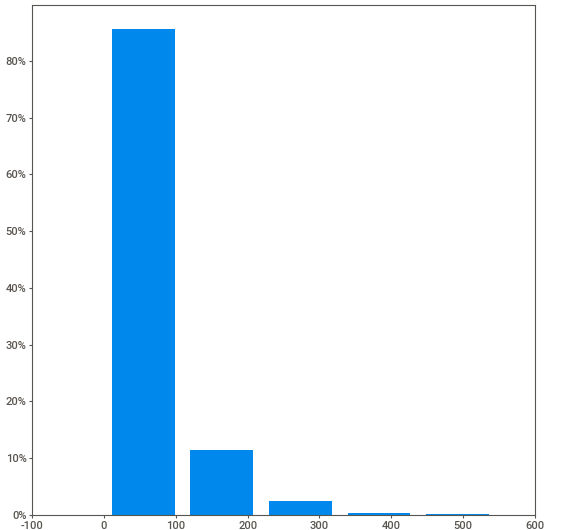
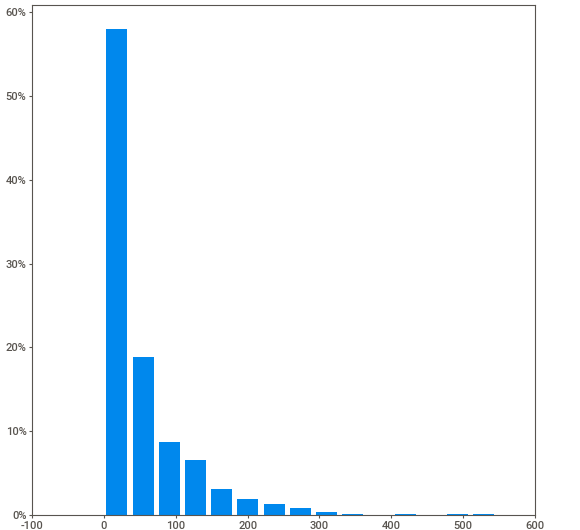
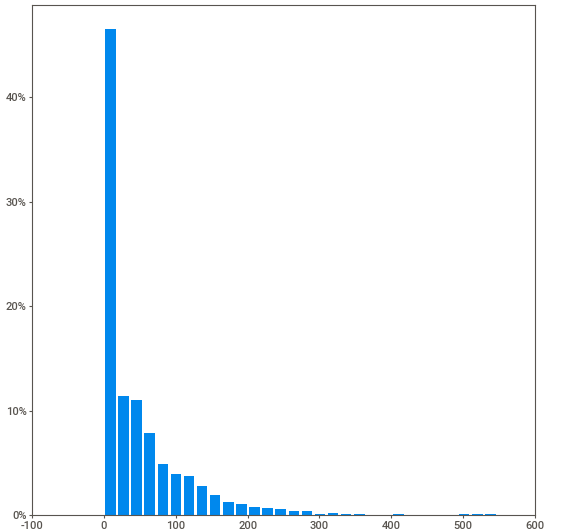
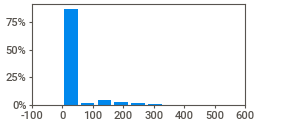
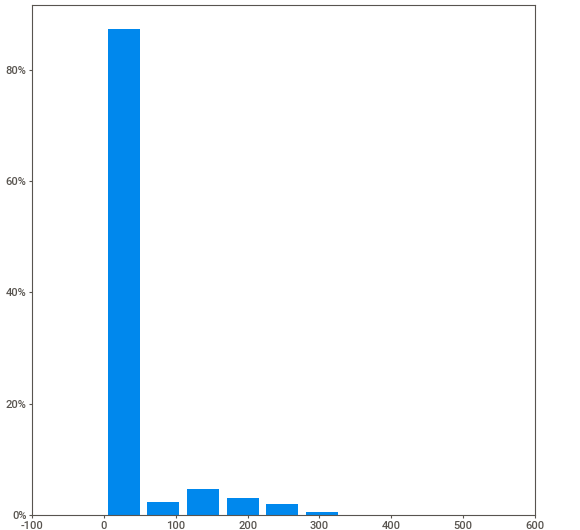
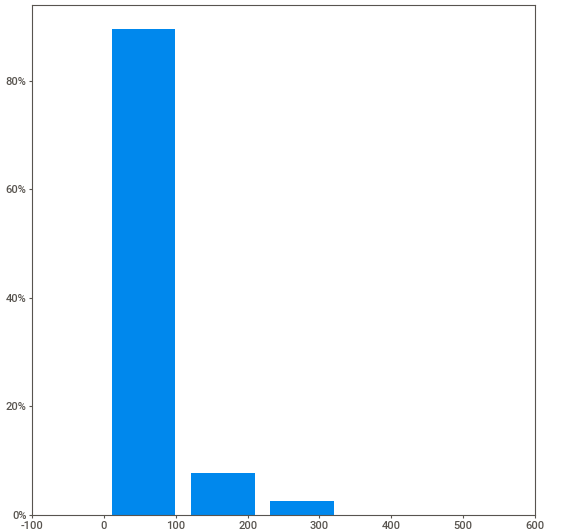
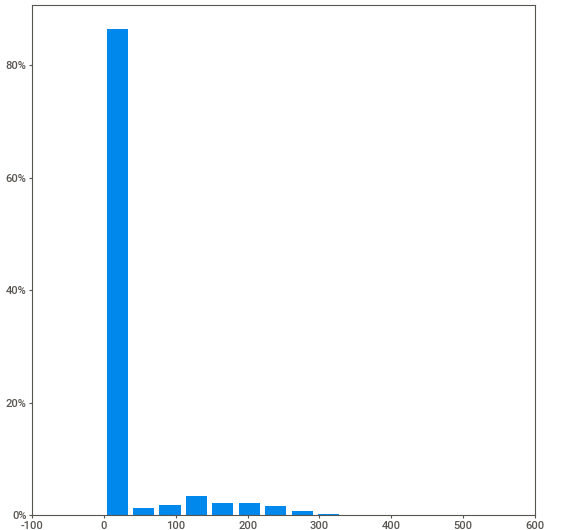
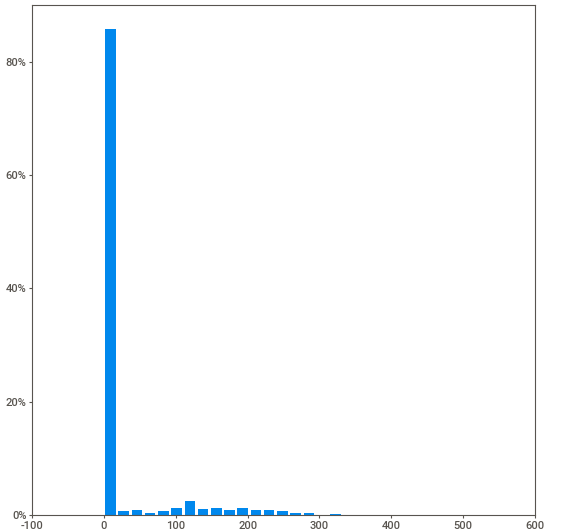
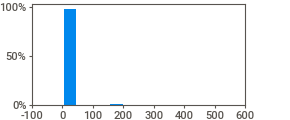
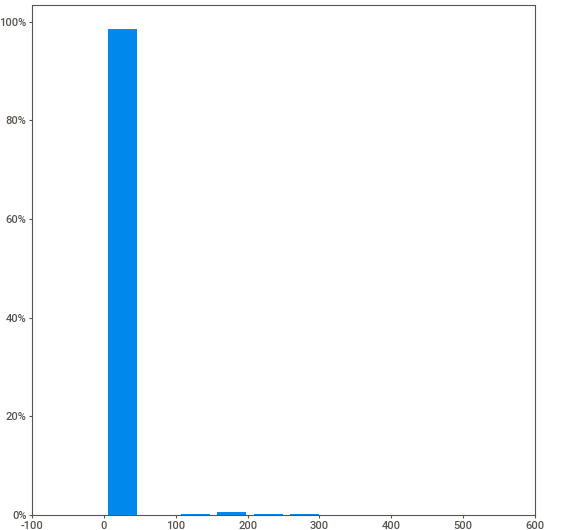
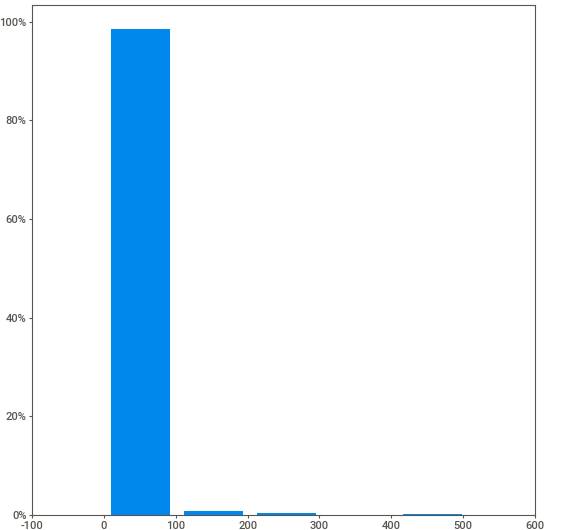
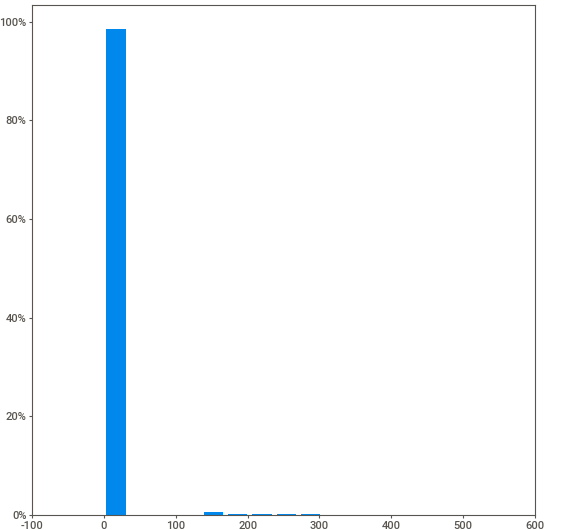
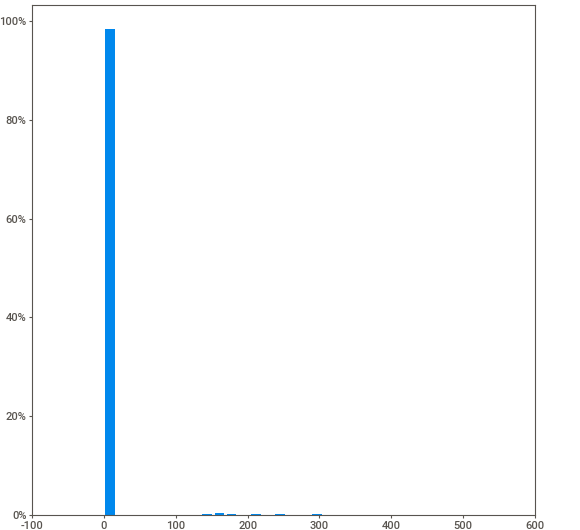
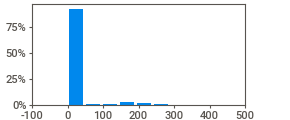
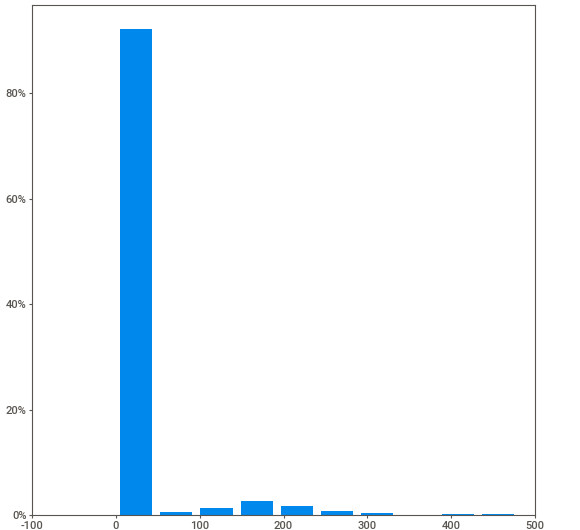
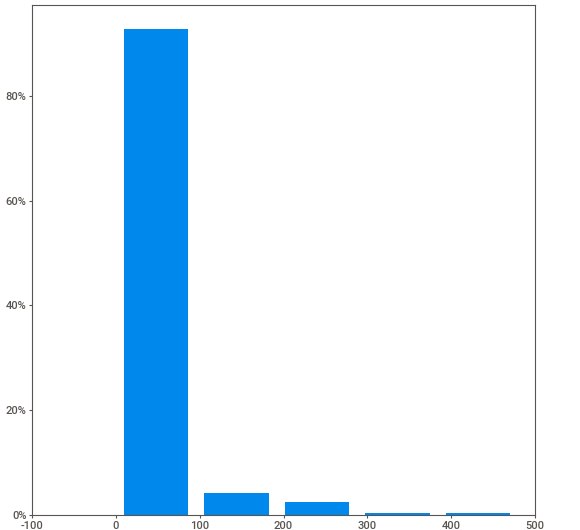
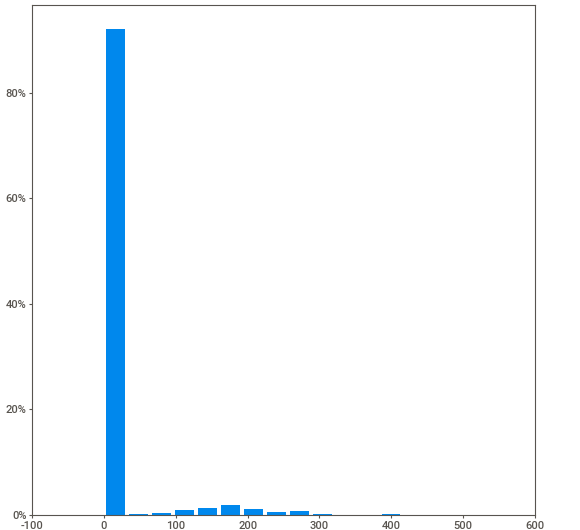
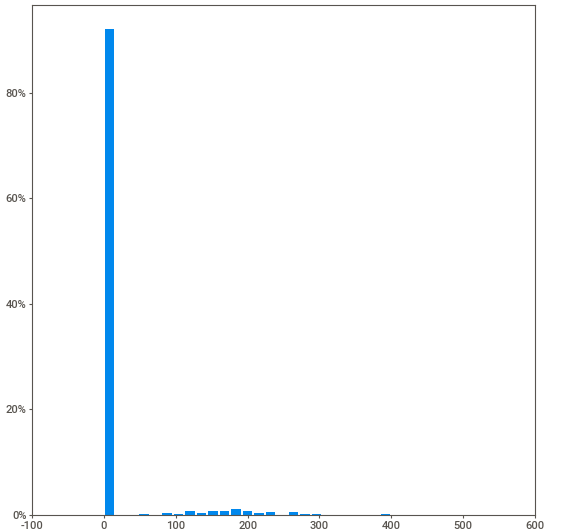
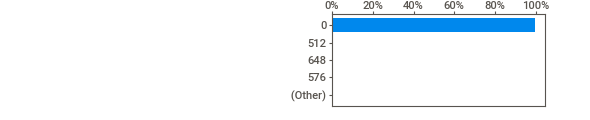
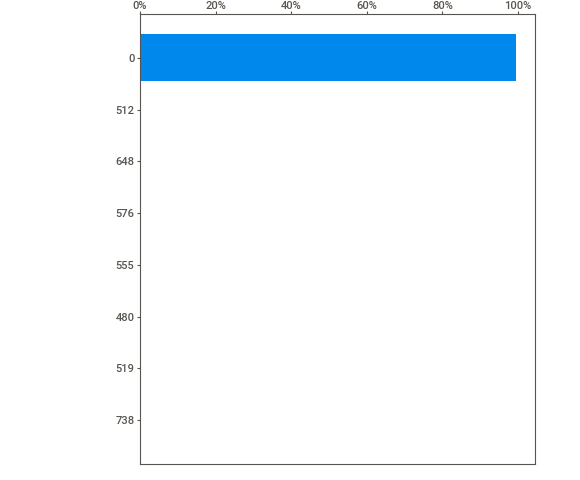
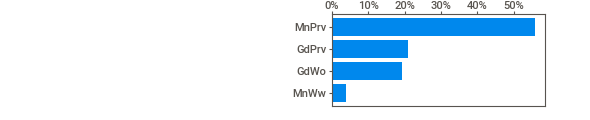
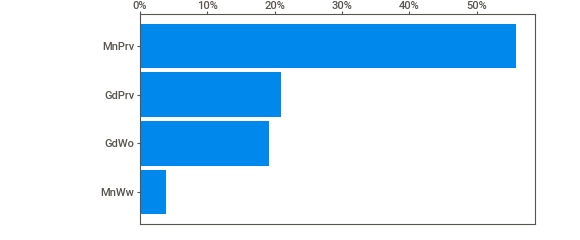
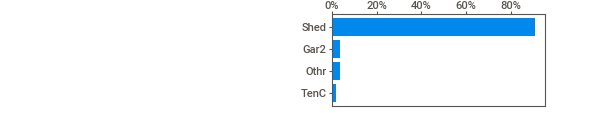
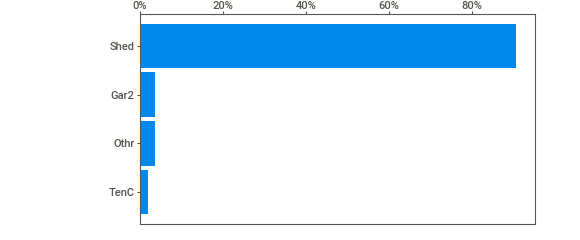
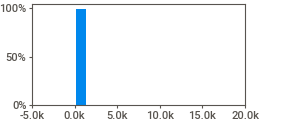
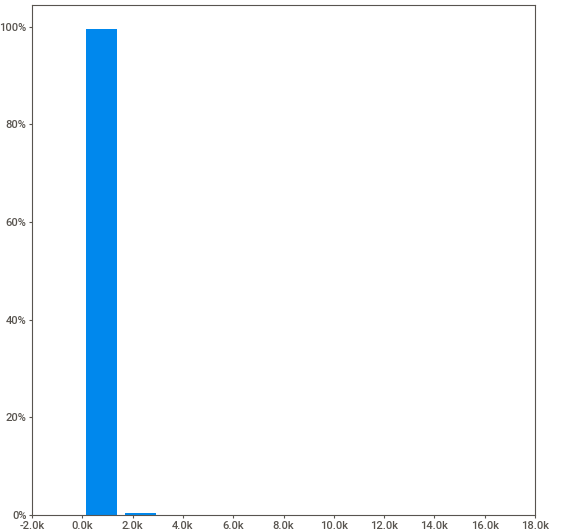
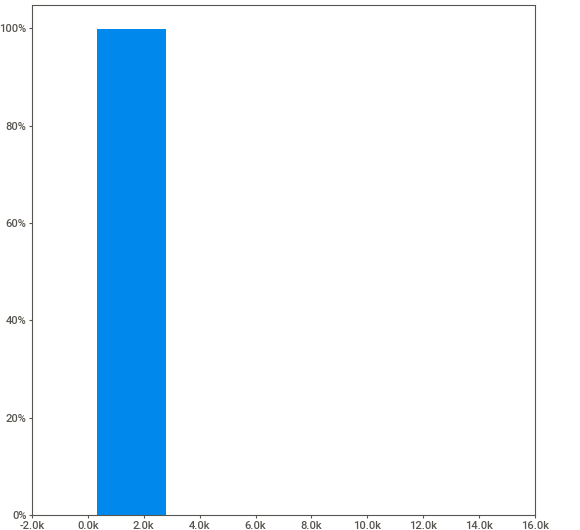
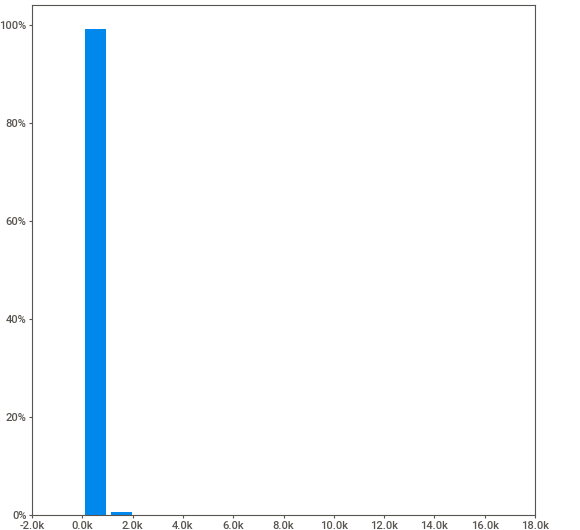
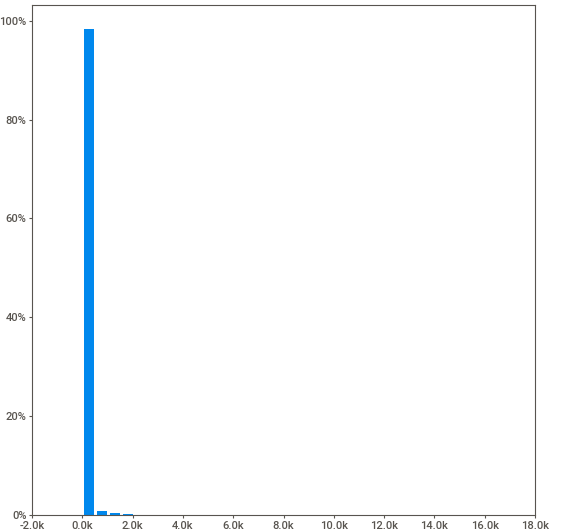
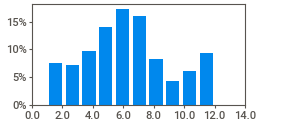
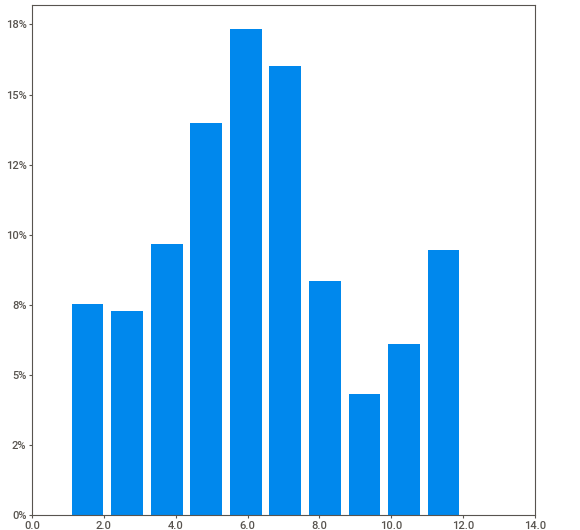
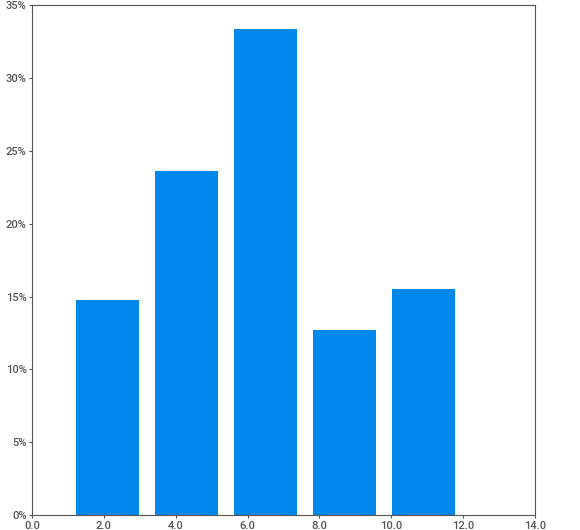
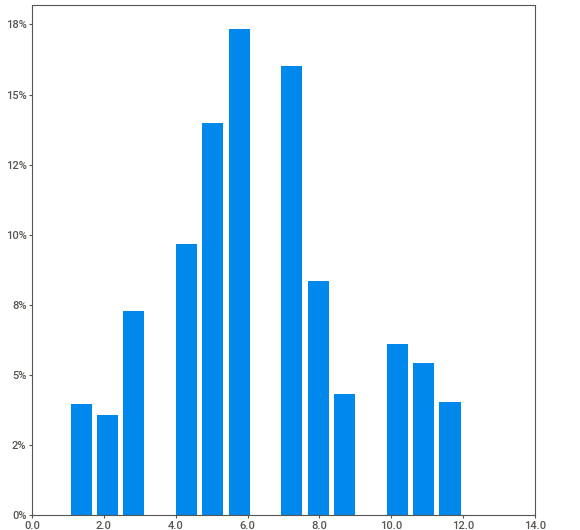
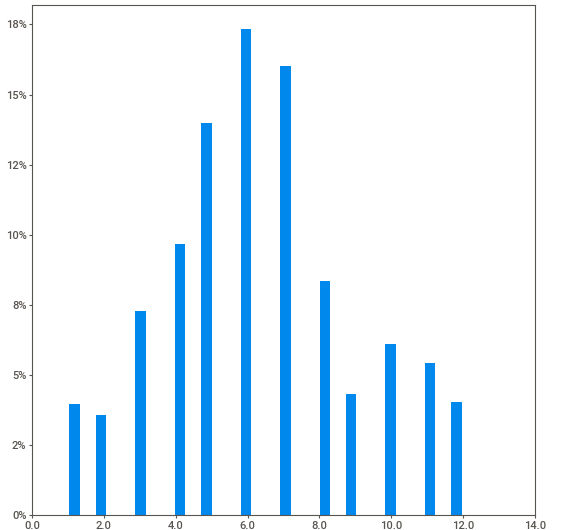
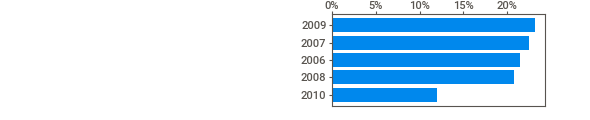
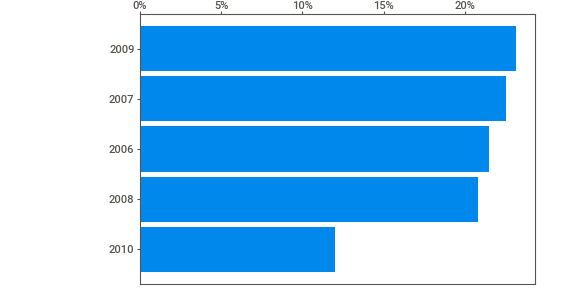
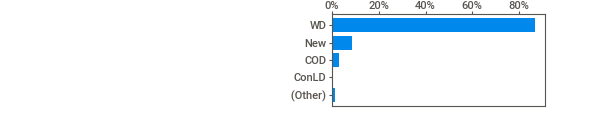
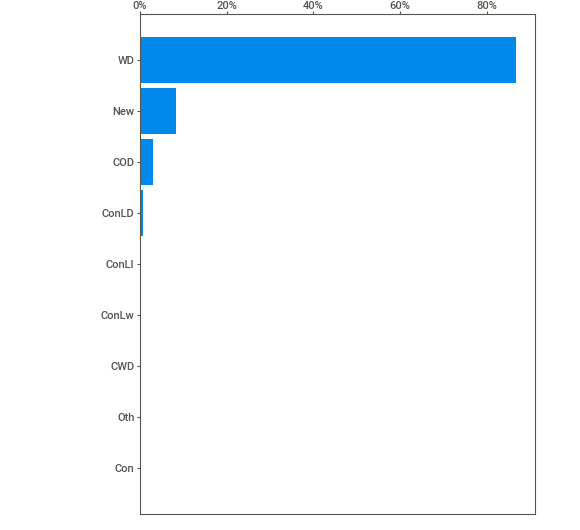
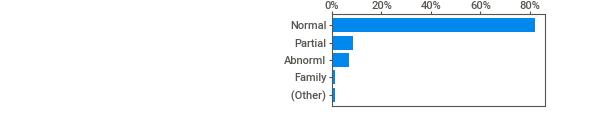
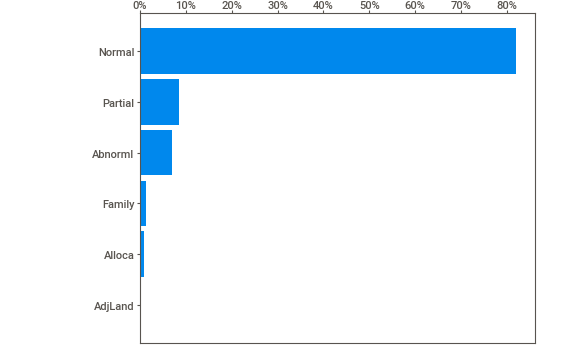
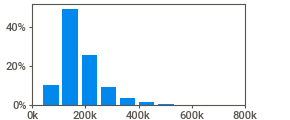
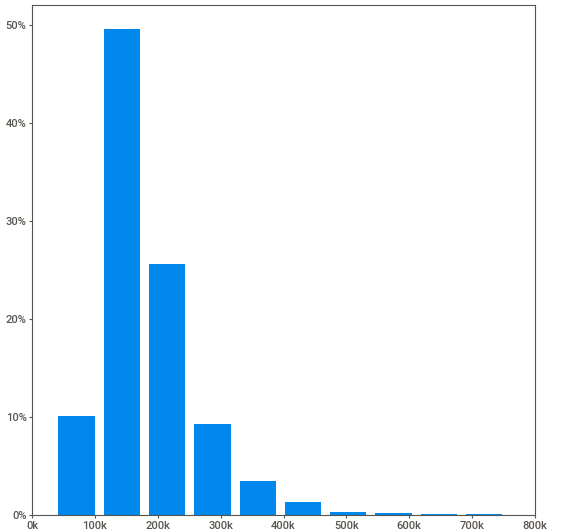
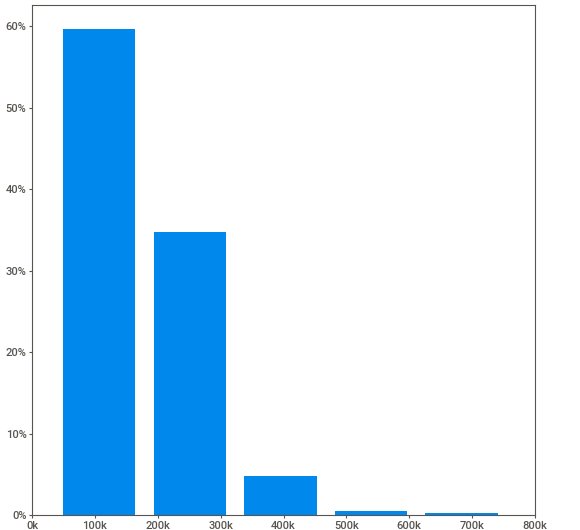
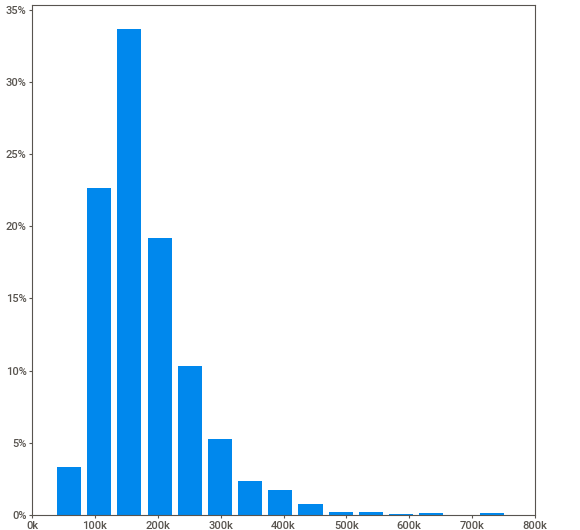
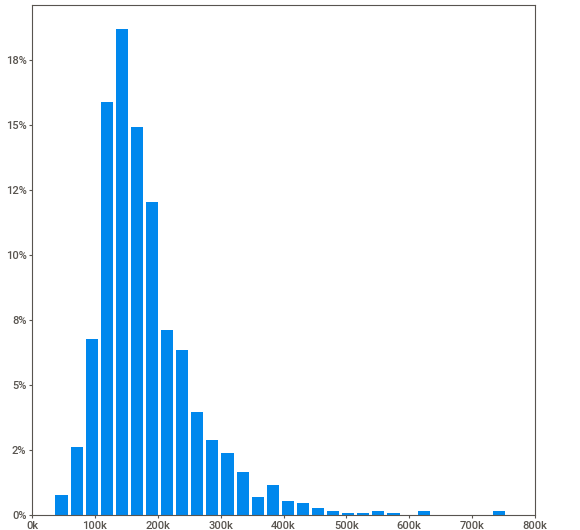
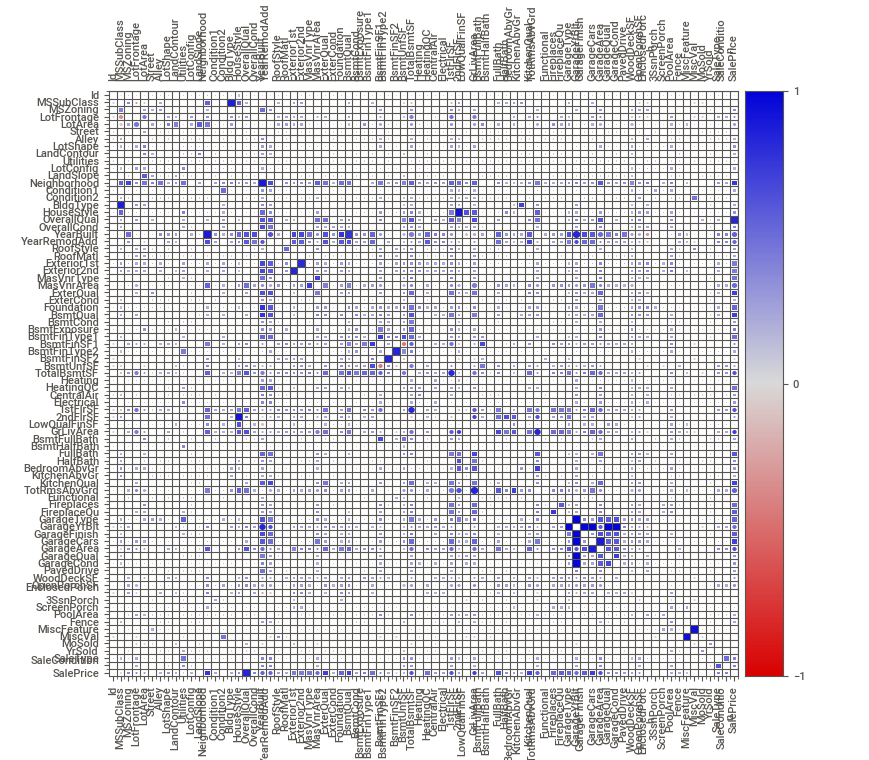
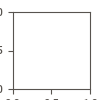

In [6]:
!pip install sweetviz
import sweetviz as sw

usedcars_report = sw.analyze(train_data)
usedcars_report.show_notebook(layout='vertical')

In [7]:
print ("The shape of the train data is (row, column):"+ str(train_data.shape))
print (train_data.info())
print ("The shape of the test data is (row, column):"+ str(test_data.shape))
print (test_data.info())

The shape of the train data is (row, column):(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 

In [8]:
train_data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [9]:
from scipy.stats import norm

# Get the fitted parameters used by the function norm
mu, sigma = norm.fit(train_data['SalePrice'])

fig = px.histogram(data_frame=train_data, x='SalePrice')
fig.update_layout(
    title_text=f'SalePrice distribution - mu= {mu:.3f}, sigma= {sigma:.3f}',
    xaxis_title_text='SalePrice',
    yaxis_title_text='Count',
    bargap=0.2, # gap between bars of adjacent location coordinates
)
fig.show()

# **We will discard the irrelevant columns**


In [10]:
train_data=train_data.drop(['MiscFeature','Id','PoolQC','Alley','Fence','MasVnrType','FireplaceQu'], axis=1)
test_data=test_data.drop(['MiscFeature','Id','PoolQC','Alley','Fence','MasVnrType','FireplaceQu'], axis=1)
train_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 74 columns]

We see that we have a lot of missing data:

In [11]:
# count empty values in each column
def count_empty_values_in_each_column(df):
    print('empty values:')
    code = "len(np.where(df[column].isnull())[0])"
    for column in df.columns:
        print(f'`{column}`: {eval(code)}')

count_empty_values_in_each_column(train_data)

empty values:
`MSSubClass`: 0
`MSZoning`: 0
`LotFrontage`: 259
`LotArea`: 0
`Street`: 0
`LotShape`: 0
`LandContour`: 0
`Utilities`: 0
`LotConfig`: 0
`LandSlope`: 0
`Neighborhood`: 0
`Condition1`: 0
`Condition2`: 0
`BldgType`: 0
`HouseStyle`: 0
`OverallQual`: 0
`OverallCond`: 0
`YearBuilt`: 0
`YearRemodAdd`: 0
`RoofStyle`: 0
`RoofMatl`: 0
`Exterior1st`: 0
`Exterior2nd`: 0
`MasVnrArea`: 8
`ExterQual`: 0
`ExterCond`: 0
`Foundation`: 0
`BsmtQual`: 37
`BsmtCond`: 37
`BsmtExposure`: 38
`BsmtFinType1`: 37
`BsmtFinSF1`: 0
`BsmtFinType2`: 38
`BsmtFinSF2`: 0
`BsmtUnfSF`: 0
`TotalBsmtSF`: 0
`Heating`: 0
`HeatingQC`: 0
`CentralAir`: 0
`Electrical`: 1
`1stFlrSF`: 0
`2ndFlrSF`: 0
`LowQualFinSF`: 0
`GrLivArea`: 0
`BsmtFullBath`: 0
`BsmtHalfBath`: 0
`FullBath`: 0
`HalfBath`: 0
`BedroomAbvGr`: 0
`KitchenAbvGr`: 0
`KitchenQual`: 0
`TotRmsAbvGrd`: 0
`Functional`: 0
`Fireplaces`: 0
`GarageType`: 81
`GarageYrBlt`: 81
`GarageFinish`: 81
`GarageCars`: 0
`GarageArea`: 0
`GarageQual`: 81
`GarageCond`: 81
`Pave

In [12]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True)
    
def fill_na_mean(data, column_name): # Imputes by mean (Only for numeric features)
    data_not_null = data[~data[column_name].isnull()]
    data[column_name].fillna(data_not_null[column_name].mean(), inplace=True)    
    
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x) 

We will mark all the ordinal variables that we have in the data

In [13]:
ordinal_features = ['OverallQual', 'OverallCond', 'LotShape', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars', 
                    'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                    'GarageCond']

In [14]:
def determine_dtypes(df):
    numerical_cols = df.select_dtypes(include=[np.int64, np.float64]).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    return numerical_cols,categorical_cols

In [15]:
# determine categorical and numerical features
numerical_cols,categorical_cols =determine_dtypes(train_data)

print('Numerical Cols:', numerical_cols)
print()
print('Categorical Cols:', categorical_cols)
#print('All Cols:', all_cols)
# determine categorical and numerical features
numerical_colsForTest,categorical_colsForTest = determine_dtypes(test_data)

print('Numerical Cols:', numerical_colsForTest)
print()
print('Categorical Cols:', categorical_colsForTest)

Numerical Cols: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical Cols: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
  

# **Feature Engineering**

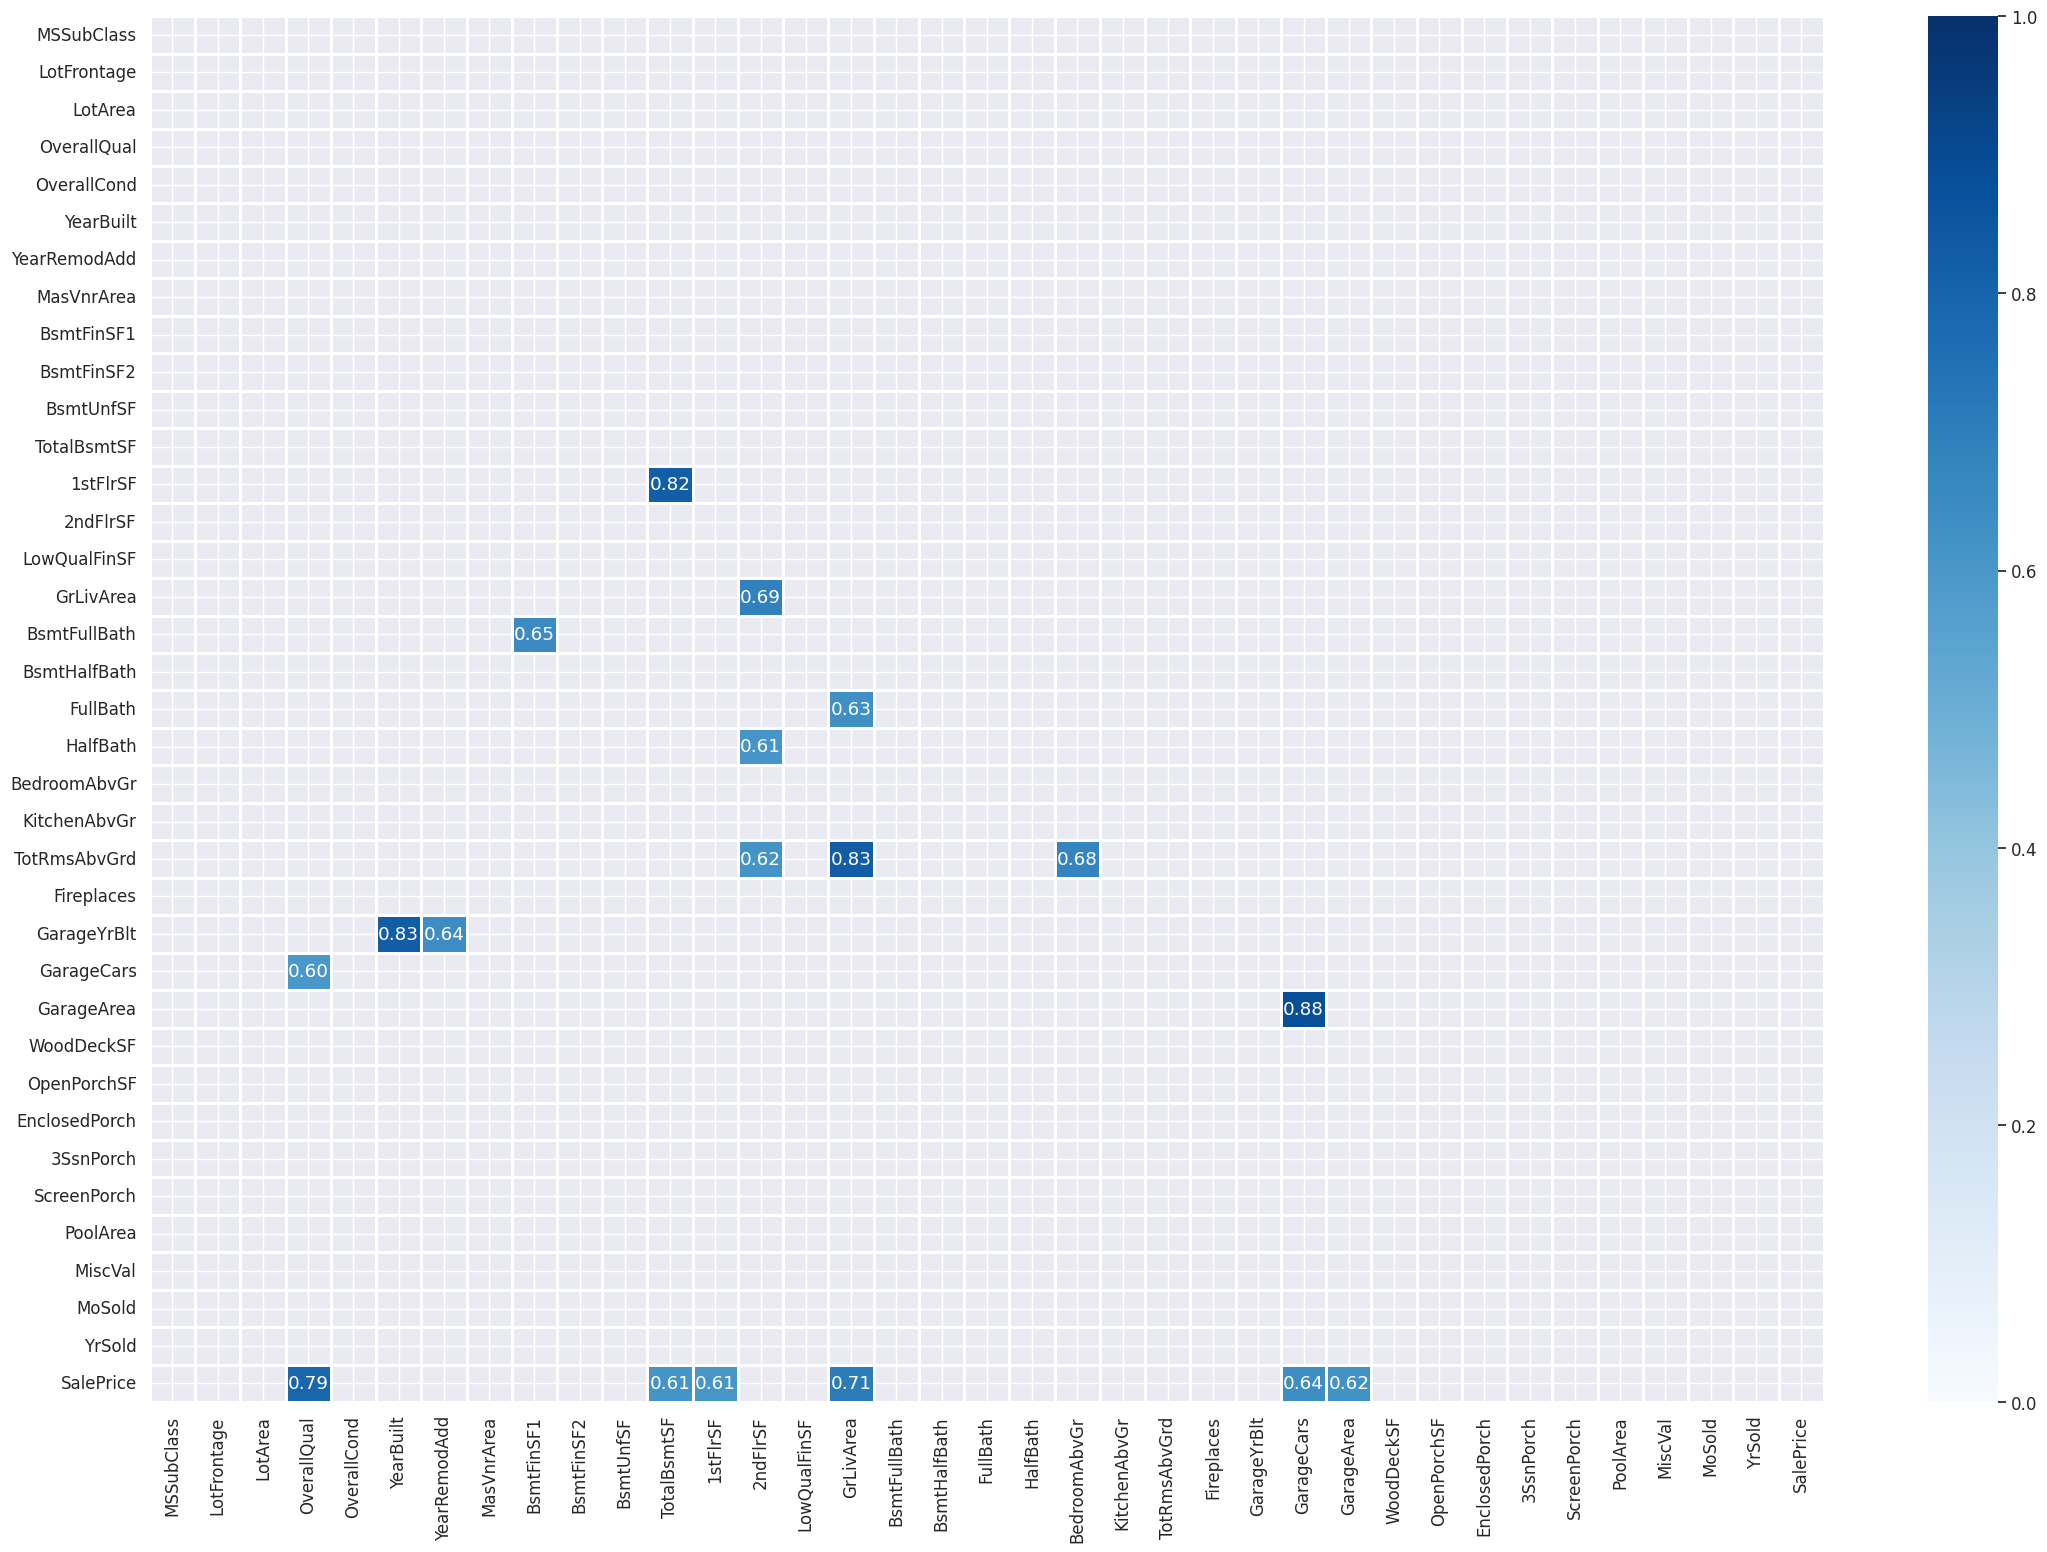

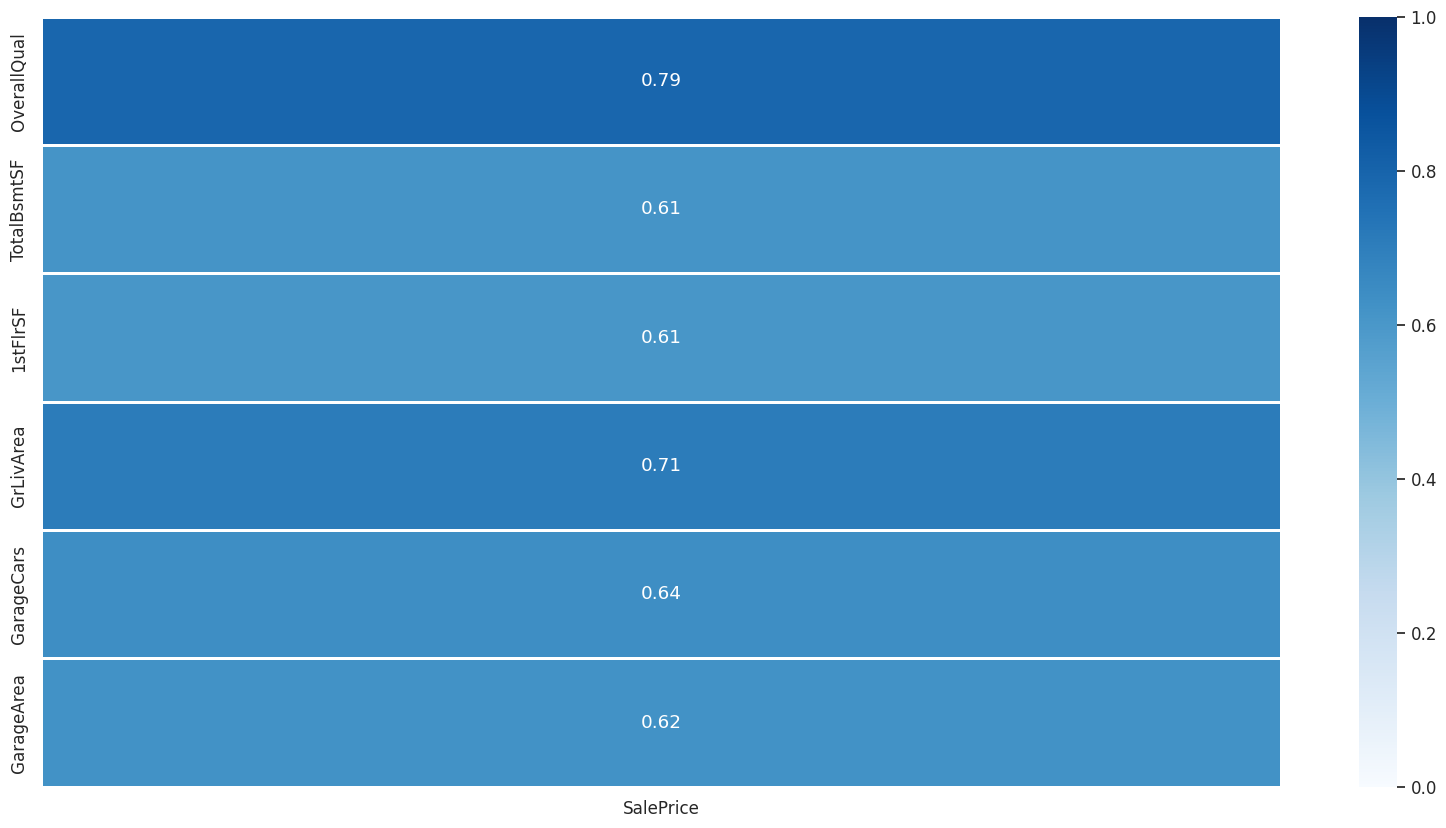

In [16]:
def plot_correlation_greater_than(df, greater_than):
    sns.set(font_scale=1.1)
    corr = np.abs(df.corr())[np.abs(df.corr()) >= greater_than]
    mask = np.triu(corr.corr())
    plt.figure(figsize=(27, 18))

    ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=False, linewidth=1, cbar=True, vmin=0, vmax=1, mask=mask)
    # format x and y labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

    # set the x labels and ticks on top
    # ax.xaxis.tick_top()
    # ax.xaxis.set_label_position('top')
    plt.show()

def plot_correlation_greater_than_by_feature(df, feature, greater_than):
    corr = np.abs(df.corr())[df.corr() > greater_than][feature].dropna().drop(feature).to_frame()
    ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=False, linewidth=1, cbar=True, vmin=0, vmax=1)
    plt.show()

plot_correlation_greater_than(train_data[numerical_cols], 0.6)
plot_correlation_greater_than_by_feature(train_data[numerical_cols],'SalePrice', 0.6)



In the correlation table we made, you can see all correlations greater than 0.6 with 'SalePrice' are shown to us in a graph.

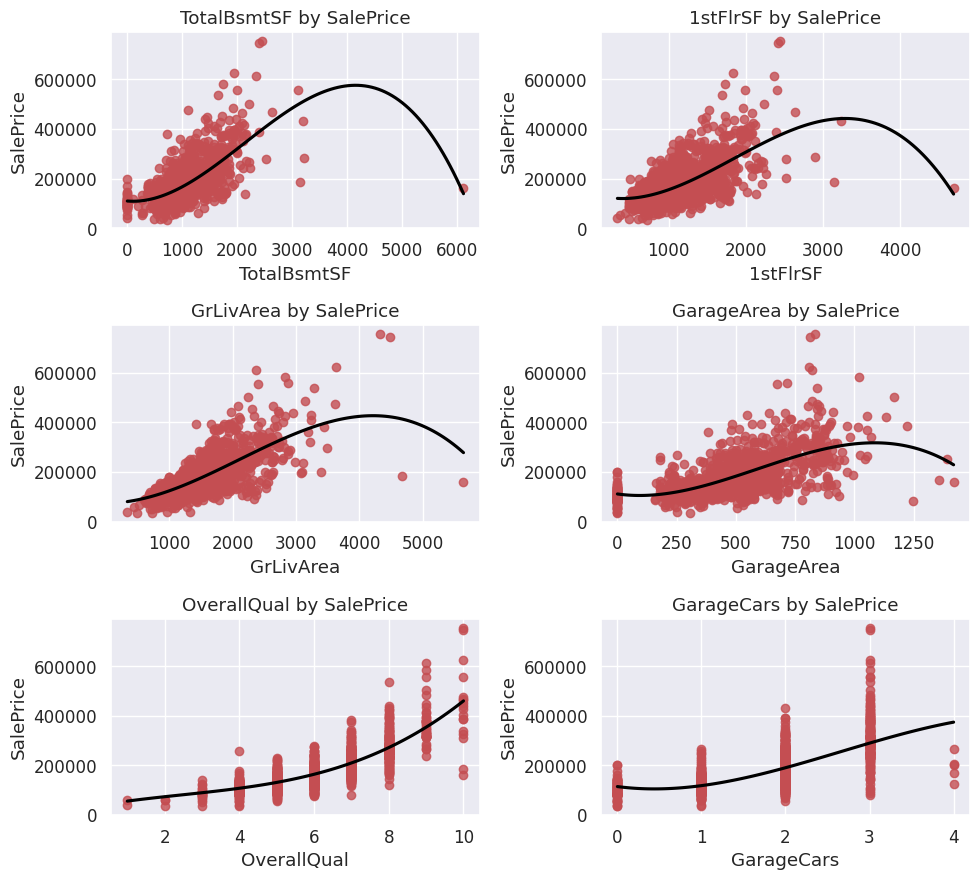

In [17]:
features=['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','OverallQual','GarageCars','SalePrice']
def plot_regplots_high_corr_by_feature(df, feature, high_corr):
    corr = np.abs(df.corr())[np.abs(df.corr()) > high_corr]
    corr_indexes = corr.loc[feature].dropna().drop(feature).index
    nrows = math.ceil(math.sqrt(len(corr_indexes)))
    ncols = math.ceil((len(corr_indexes)/nrows))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))
    axes = axes.flatten()
    for i, j in zip(corr_indexes, axes):
        sns.regplot(x=i, y=feature, data=df, ax=j, order=3, ci=None,  color='r',line_kws={'color':'black'})
        j.set_title(f'{i} by {feature}')
    # remove unused axes
    for i in range(len(corr_indexes), nrows*ncols):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()


plot_regplots_high_corr_by_feature(train_data[features],'SalePrice',0.6)

We want to delete all the data that are abnormal from the average, so we will check where they exist and delete them.

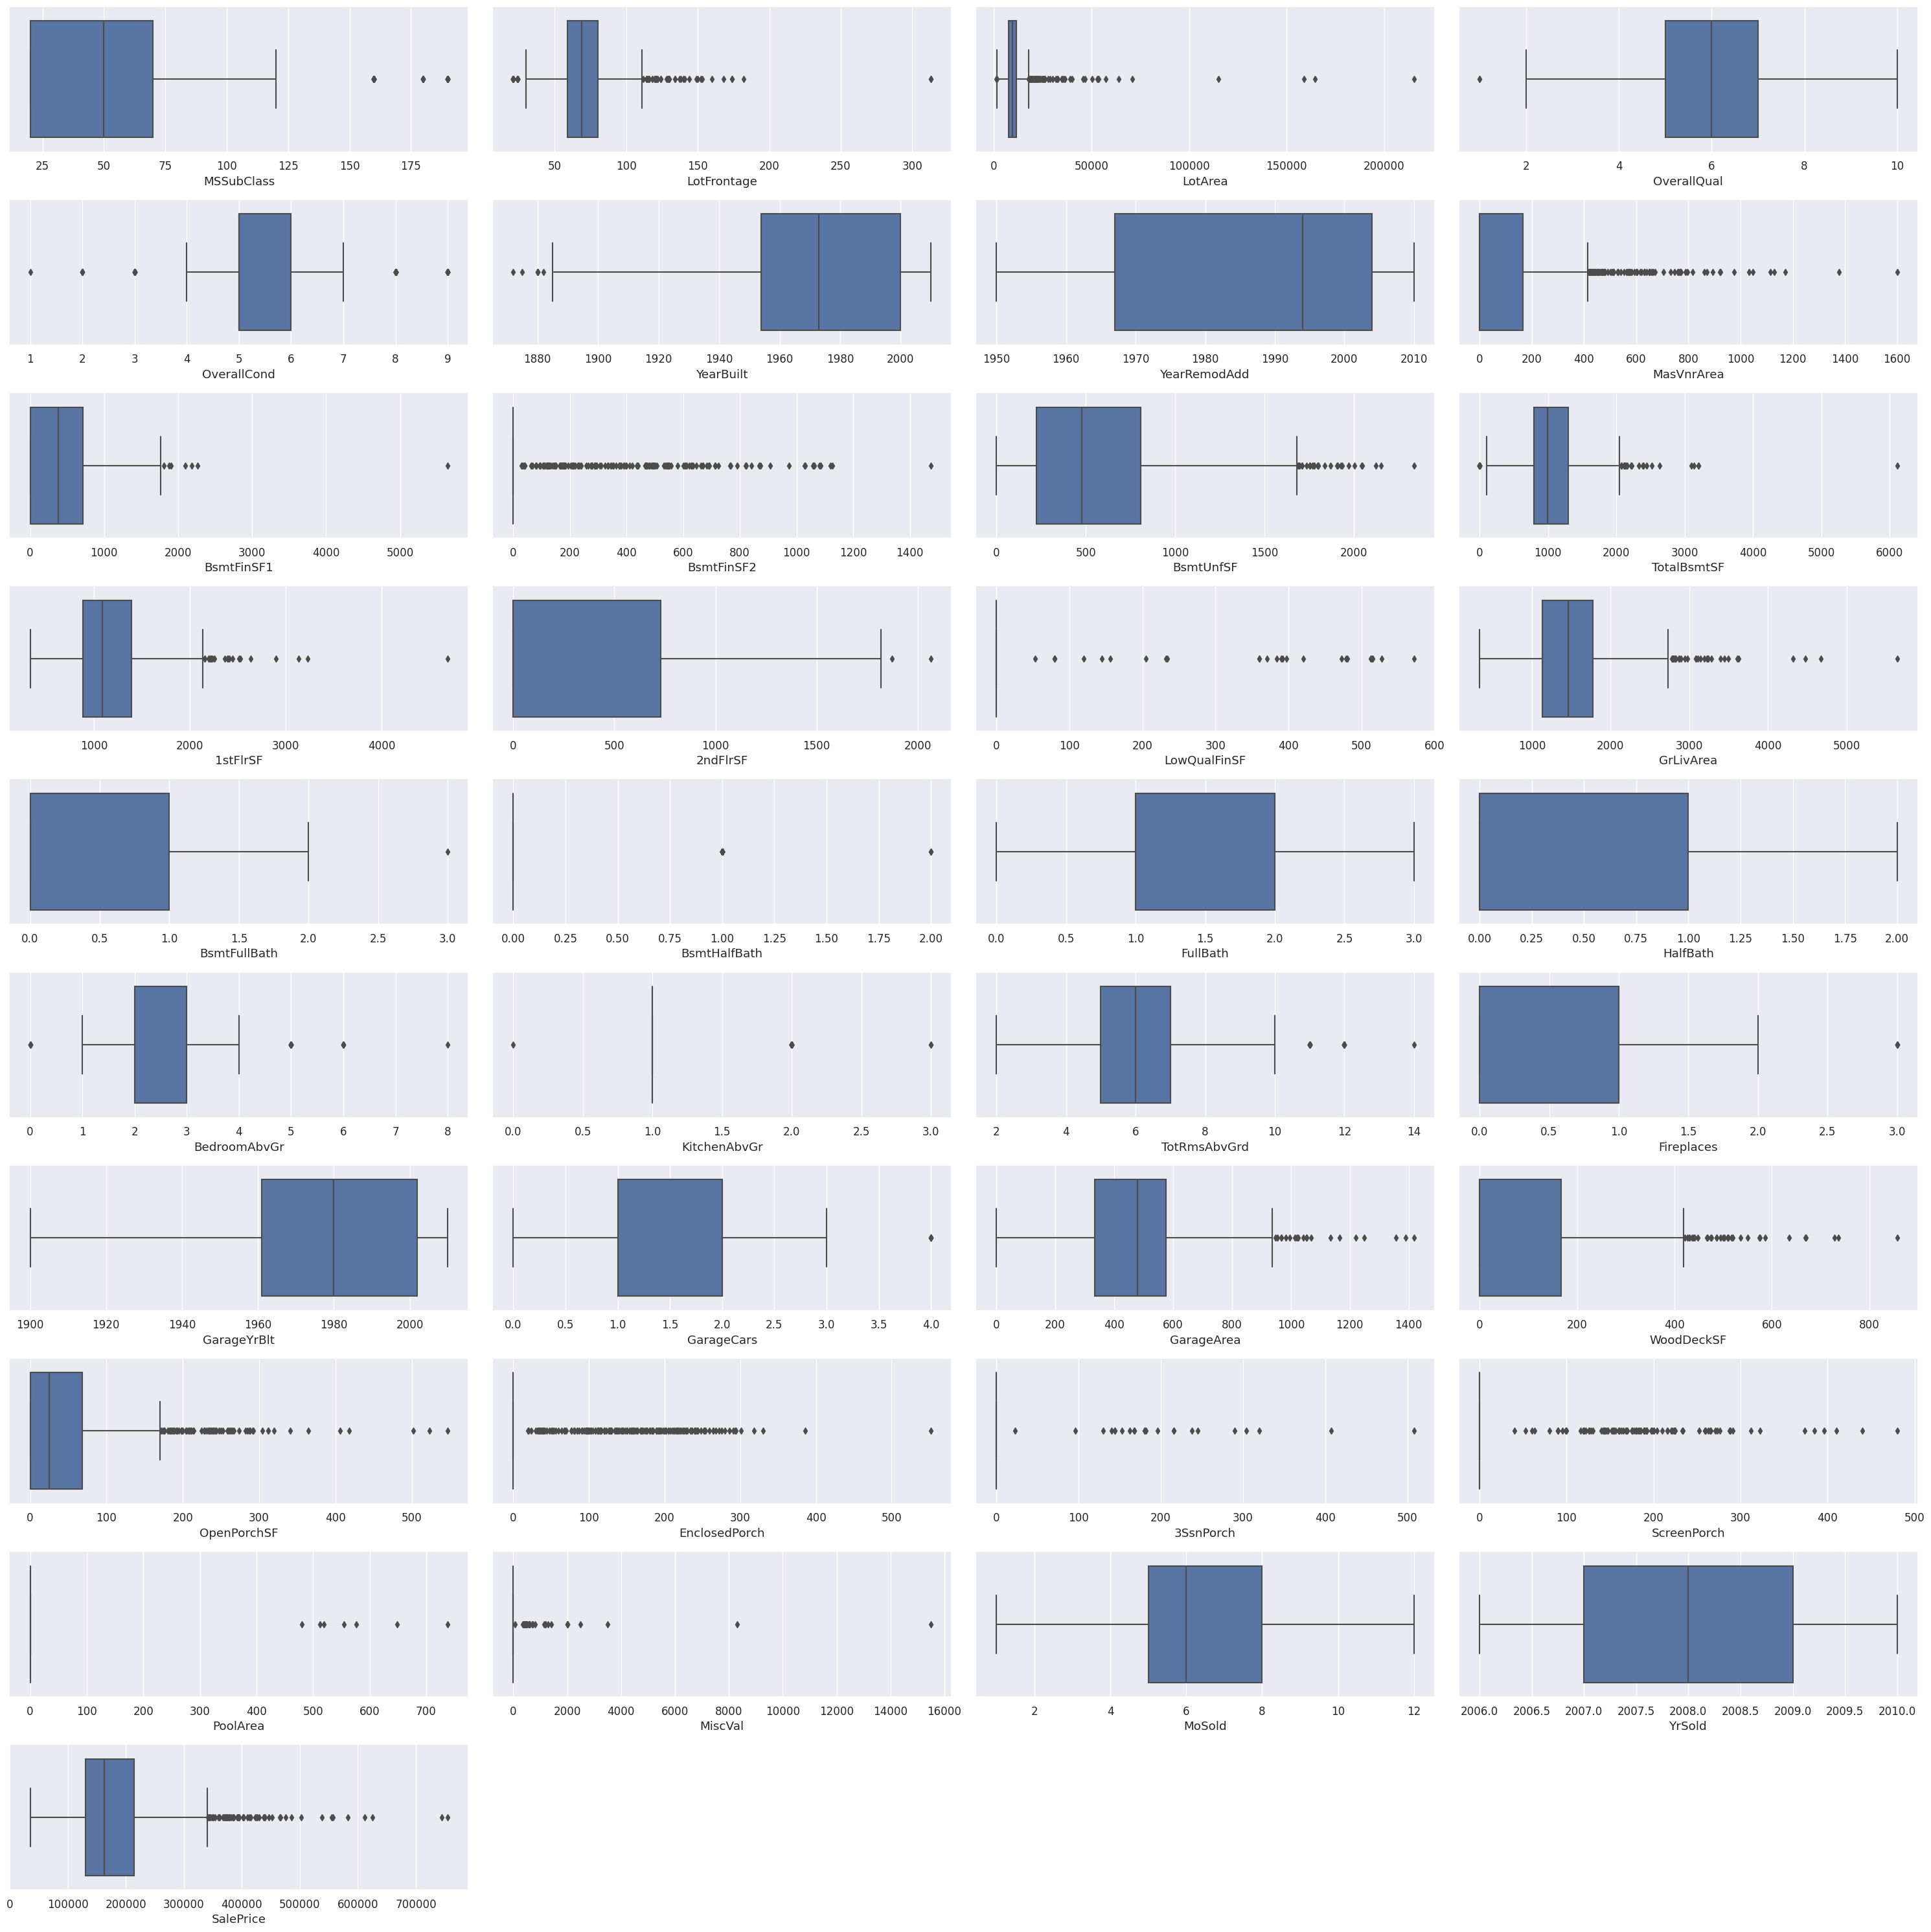

In [18]:
# fig, axs = plt.subplots(8, 5, figsize=(14, 15))
fig = plt.figure(figsize=(30, 30))

for j, i in enumerate(numerical_cols):
    plt.subplot(10, 4, j + 1)

    sns.boxplot(data=train_data, x=i)
fig.tight_layout(pad=1.0)

plt.show()

In [19]:

train_data = train_data.drop(train_data[train_data["LotFrontage"] > 185].index)
train_data = train_data.drop(train_data[train_data["LotArea"] > 100000].index)
train_data = train_data.drop(train_data[train_data["BsmtFinSF1"] > 4000].index)
train_data = train_data.drop(train_data[train_data["TotalBsmtSF"] > 5000].index)
train_data = train_data.drop(train_data[train_data["GrLivArea"] > 4000].index)

def remove_outliers(df):
         df.drop(df[(df['OverallQual'] < 5) & (df['SalePrice'] > 200000)].index, inplace=True)
         df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index, inplace=True)
         df.drop(df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 200000)].index, inplace=True)
         df.drop(df[(df['TotalBsmtSF'] > 3000) & (df['SalePrice'] > 320000)].index, inplace=True)
         df.drop(df[(df['1stFlrSF'] < 3000) & (df['SalePrice'] > 600000)].index, inplace=True)
         df.drop(df[(df['1stFlrSF'] > 3000) & (df['SalePrice'] < 200000)].index, inplace=True)
         df.drop(df[(df['GarageCars'] < 4) & (df['SalePrice'] > 620000)].index, inplace=True)
         df.reset_index(inplace=True, drop=True)

remove_outliers(train_data)


In [20]:
all_df = pd.concat([train_data, test_data], keys=['train', 'test']).drop(columns='SalePrice')
display(all_df)
print(all_df.shape)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
train 0             60       RL         65.0     8450   Pave      Reg   
      1             20       RL         80.0     9600   Pave      Reg   
      2             60       RL         68.0    11250   Pave      IR1   
      3             70       RL         60.0     9550   Pave      IR1   
      4             60       RL         84.0    14260   Pave      IR1   
...                ...      ...          ...      ...    ...      ...   
test  1454         160       RM         21.0     1936   Pave      Reg   
      1455         160       RM         21.0     1894   Pave      Reg   
      1456          20       RL        160.0    20000   Pave      Reg   
      1457          85       RL         62.0    10441   Pave      Reg   
      1458          60       RL         74.0     9627   Pave      Reg   

           LandContour Utilities LotConfig LandSlope  ... OpenPorchSF  \
train 0            Lvl    AllPub    Inside       Gtl  ...          61   
      1            Lvl    AllPub       FR2       Gtl  ...           0   
      2            Lvl    AllPub    Inside       Gtl  ...          42   
      3            Lvl    AllPub    Corner       Gtl  ...          35   
      4            Lvl    AllPub       FR2       Gtl  ...          84   
...                ...       ...       ...       ...  ...         ...   
test  1454         Lvl    AllPub    Inside       Gtl  ...           0   
      1455         Lvl    AllPub    Inside       Gtl  ...          24   
      1456         Lvl    AllPub    Inside       Gtl  ...           0   
      1457         Lvl    AllPub    Inside       Gtl  ...          32   
      1458         Lvl    AllPub    Inside       Mod  ...          48   

           EnclosedPorch 3SsnPorch ScreenPorch PoolArea  MiscVal  MoSold  \
train 0                0         0           0        0        0       2   
      1                0         0           0        0        0       5   
      2                0         0           0        0        0       9   
      3              272         0           0        0        0       2   
      4                0         0           0        0        0      12   
...                  ...       ...         ...      ...      ...     ...   
test  1454             0         0           0        0        0       6   
      1455             0         0           0        0        0       4   
      1456             0         0           0        0        0       9   
      1457             0         0           0        0      700       7   
      1458             0         0           0        0        0      11   

            YrSold  SaleType SaleCondition  
train 0       2008        WD        Normal  
      1       2007        WD        Normal  
      2       2008        WD        Normal  
      3       2006        WD       Abnorml  
      4       2008        WD        Normal  
...            ...       ...           ...  
test  1454    2006        WD        Normal  
      1455    2006        WD       Abnorml  
      1456    2006        WD       Abnorml  
      1457    2006        WD        Normal  
      1458    2006        WD        Normal  

[2903 rows x 73 columns]

(2903, 73)


# **Preprocessing the data**

In [21]:
def changeToNull(df):
    df.replace('', np.NaN, inplace=True)
    df.fillna(np.NaN, inplace=True)

changeToNull(all_df)

In [22]:
def countOfNull(df):
    all = df.isnull().sum().sort_values(ascending=False)
    count = all[all != 0]
    percent = (count/len(df)) * 100
    dtypes = df.dtypes[count.index]

    return pd.concat([count, percent, dtypes], axis=1, keys=['count', 'percent', 'dtype'])
    # return pd.concat([count, percent], axis=1, keys=['count', 'percent'])

print("train:")    
countOfNull(train_data)
print("test:")
countOfNull(test_data)

train:
test:


count    percent    dtype
LotFrontage     227  15.558602  float64
GarageYrBlt      78   5.346127  float64
GarageFinish     78   5.346127   object
GarageQual       78   5.346127   object
GarageCond       78   5.346127   object
GarageType       76   5.209047   object
BsmtCond         45   3.084304   object
BsmtExposure     44   3.015764   object
BsmtQual         44   3.015764   object
BsmtFinType1     42   2.878684   object
BsmtFinType2     42   2.878684   object
MasVnrArea       15   1.028101  float64
MSZoning          4   0.274160   object
BsmtFullBath      2   0.137080  float64
Utilities         2   0.137080   object
Functional        2   0.137080   object
BsmtHalfBath      2   0.137080  float64
BsmtFinSF1        1   0.068540  float64
BsmtFinSF2        1   0.068540  float64
BsmtUnfSF         1   0.068540  float64
TotalBsmtSF       1   0.068540  float64
KitchenQual       1   0.068540   object
Exterior2nd       1   0.068540   object
Exterior1st       1   0.068540   object
GarageArea        1   0.068540  float64
SaleType          1   0.068540   object
GarageCars        1   0.068540  float64

We can see that we still have missing data.

In [23]:
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure','BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_df[col] = all_df[col].fillna('NA')
for col in ['GarageYrBlt', 'GarageArea','MasVnrArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_df[col] =  all_df[col].fillna(0)
for col in ['MSZoning', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']:
    fill_na_random_pick_column_distribution(all_df, col)     
all_df.drop(labels='Utilities', axis=1, inplace=True)


countOfNull(all_df)


Empty DataFrame
Columns: [count, percent, dtype]
Index: []

In [24]:
train_data = all_df.loc['train'].copy().join(train_data['SalePrice'])
test_data = all_df.loc['test'].copy()
train_data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1439          60       RL         62.0     7917   Pave      Reg         Lvl   
1440          20       RL         85.0    13175   Pave      Reg         Lvl   
1441          70       RL         66.0     9042   Pave      Reg         Lvl   
1442          20       RL         68.0     9717   Pave      Reg         Lvl   
1443          20       RL         75.0     9937   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
0       Inside       Gtl      CollgCr  ...             0         0   
1          FR2       Gtl      Veenker  ...             0         0   
2       Inside       Gtl      CollgCr  ...             0         0   
3       Corner       Gtl      Crawfor  ...           272         0   
4          FR2       Gtl      NoRidge  ...             0         0   
...        ...       ...          ...  ...           ...       ...   
1439    Inside       Gtl      Gilbert  ...             0         0   
1440    Inside       Gtl       NWAmes  ...             0         0   
1441    Inside       Gtl      Crawfor  ...             0         0   
1442    Inside       Gtl        NAmes  ...           112         0   
1443    Inside       Gtl      Edwards  ...             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  \
0              0        0        0       2    2008        WD        Normal   
1              0        0        0       5    2007        WD        Normal   
2              0        0        0       9    2008        WD        Normal   
3              0        0        0       2    2006        WD       Abnorml   
4              0        0        0      12    2008        WD        Normal   
...          ...      ...      ...     ...     ...       ...           ...   
1439           0        0        0       8    2007        WD        Normal   
1440           0        0        0       2    2010        WD        Normal   
1441           0        0     2500       5    2010        WD        Normal   
1442           0        0        0       4    2010        WD        Normal   
1443           0        0        0       6    2008        WD        Normal   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1439    175000  
1440    210000  
1441    266500  
1442    142125  
1443    147500  

[1444 rows x 73 columns]

 We managed to complete the missing information.
 
 Now we will try to convert all the information into numerical values.

In [25]:
ordinal_features = ['OverallQual', 'OverallCond', 'LotShape', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars', 
                    'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                    'GarageCond']


In [26]:
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
def create_boolean_features(df):
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [28]:
def set_as_categorical(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)

In [29]:
def ordinal_encode(df, ord_features):
    oe = OrdinalEncoder(dtype=np.int64)
    oe_df = pd.DataFrame(oe.fit_transform(df.loc[:, ord_features]), columns=ord_features)
    return pd.concat([df.drop(columns=ord_features), oe_df], axis=1)

numerical_cols,categorical_cols =determine_dtypes(train_data)
train_data = ordinal_encode(train_data, ordinal_features)
test_data = ordinal_encode(test_data, ordinal_features)

In [30]:
def feature_engineering(df):
    create_boolean_features(df)
    set_as_categorical(df)
feature_engineering(train_data)
feature_engineering(test_data)

# **Data Slicing**

In [31]:
t = train_data['SalePrice'].copy()
X = train_data.drop(['SalePrice'], axis=1)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
print('t')
display(t)
print()
print('X')
X.info()

t


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1439    175000
1440    210000
1441    266500
1442    142125
1443    147500
Name: SalePrice, Length: 1444, dtype: int64


X
<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1443
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1444 non-null   object 
 1   MSZoning       1444 non-null   object 
 2   LotFrontage    1444 non-null   float64
 3   LotArea        1444 non-null   int64  
 4   Street         1444 non-null   object 
 5   LandContour    1444 non-null   object 
 6   LotConfig      1444 non-null   object 
 7   LandSlope      1444 non-null   object 
 8   Neighborhood   1444 non-null   object 
 9   Condition1     1444 non-null   object 
 10  Condition2     1444 non-null   object 
 11  BldgType       1444 non-null   object 
 12  HouseStyle     1444 non-null   object 
 13  Exterior1st    1444 non-null   object 
 14  Exterior2nd    1444 non-null   object 
 15  MasVnrArea     1444 non-null   float64
 16  Foundation     1444 non-null   object 
 17  BsmtFinSF1     1444 non-null   float64
 18  BsmtFinTyp

In [32]:
# encode a given dataframe
def encode(df):
    numerical_cols, categorical_cols = determine_dtypes(df)

    ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

    df_encoded = pd.DataFrame(ct_enc_std.fit_transform(df))
    return df_encoded

We will present some models that we have learned so that we can check which model gives the highest accuracy.

In [33]:
# all models
hp_models = {
             'SGD Regressor Lasso': SGDRegressor(random_state=42,), 
             'LinearRegression': LinearRegression(), 
             'Ridge': make_pipeline(RobustScaler(), Ridge()), 
             'Lasso': make_pipeline(RobustScaler(), Lasso(random_state=1)), 
             'Elastic Net': make_pipeline(RobustScaler(), ElasticNet(random_state=1, alpha=0.05))}
             

In [34]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [35]:
def get_cv_score_and_loss2(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score,mean_val_loss,mean_train_score,mean_train_loss

In [36]:
numerical_cols,categorical_cols = determine_dtypes(X)
ct = ColumnTransformer([("encoding",OneHotEncoder(sparse=False, handle_unknown='ignore'),categorical_cols),("standard", preprocessing.MinMaxScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss =get_cv_score_and_loss2(X, t,model_pipe, transformer=ct,k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



mean cv val score: 0.90
mean cv val loss 542115639.73
mean cv train score: 0.92
mean cv train loss 419112829.62


**In our graph we can see that Kfold=5 give us better score and small loss .**

In [37]:
def get_cv_score_and_loss(X, t, model_name, model, k=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    else:
        raise ValueError('you need to specify k in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc=f'Computing Model {model_name}', total=cv.get_n_splits(X))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.iloc[train_ids]
        t_train = t.iloc[train_ids]
        X_val = X.iloc[val_ids]
        t_val = t.iloc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()


    fig_score = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Model name: {model_name}, Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig_loss = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Model name: {model_name}, Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    if show_score_loss_graphs:
        fig_loss.show()
        fig_score.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, fig_score, fig_loss


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1443
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1444 non-null   object 
 1   MSZoning       1444 non-null   object 
 2   LotFrontage    1444 non-null   float64
 3   LotArea        1444 non-null   int64  
 4   Street         1444 non-null   object 
 5   LandContour    1444 non-null   object 
 6   LotConfig      1444 non-null   object 
 7   LandSlope      1444 non-null   object 
 8   Neighborhood   1444 non-null   object 
 9   Condition1     1444 non-null   object 
 10  Condition2     1444 non-null   object 
 11  BldgType       1444 non-null   object 
 12  HouseStyle     1444 non-null   object 
 13  Exterior1st    1444 non-null   object 
 14  Exterior2nd    1444 non-null   object 
 15  MasVnrArea     1444 non-null   float64
 16  Foundation     1444 non-null   object 
 17  BsmtFinSF1     1444 non-null   float64
 18  BsmtFinType2 

In [39]:
countOfNull(X)

Empty DataFrame
Columns: [count, percent, dtype]
Index: []

We can see that we have no missing data.

# Regular Train Data (with new features)

In [40]:
train_data_with_new_feature=X.copy()

In [41]:
def change_features_based_on_corr(df):
    df['GarageArea_mul_cars'] = df['GarageArea'] *df['GarageCars']
    df=df.drop(['GarageArea','GarageCars'], axis=1)
    df['TotRmsAbvGrd_plos_GrLiveArea'] = df['TotRmsAbvGrd'] * df['GrLivArea']
    df=df.drop(['TotRmsAbvGrd','GrLivArea'], axis=1)
    
change_features_based_on_corr(X)
change_features_based_on_corr(test_data)

In [42]:
def add_and_update_features(df):
    
    df["Totalarea"] = df["LotArea"] + df["LotFrontage"]
    df["TotalBsmtFin"] = df["BsmtFinSF1"] + df["BsmtFinSF2"]
    df["TotalSF"] = df["TotalBsmtSF"] + df["2ndFlrSF"]



add_and_update_features(X)
add_and_update_features(test_data)


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1443
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1444 non-null   object 
 1   MSZoning             1444 non-null   object 
 2   LotFrontage          1444 non-null   float64
 3   LotArea              1444 non-null   int64  
 4   Street               1444 non-null   object 
 5   LandContour          1444 non-null   object 
 6   LotConfig            1444 non-null   object 
 7   LandSlope            1444 non-null   object 
 8   Neighborhood         1444 non-null   object 
 9   Condition1           1444 non-null   object 
 10  Condition2           1444 non-null   object 
 11  BldgType             1444 non-null   object 
 12  HouseStyle           1444 non-null   object 
 13  Exterior1st          1444 non-null   object 
 14  Exterior2nd          1444 non-null   object 
 15  MasVnrArea           1444 non-null   float6

# **Feature Selection**

# **Backward**

In [44]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

numerical_cols,categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", preprocessing.MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(
    SGDRegressor(random_state=42),
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    ).fit(X_encoded, t)

display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                         , y=selector.cv_results_['mean_test_score']))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation R2 score")
fig.show()

X_best=X_encoded.loc[:, selector.support_]
bestFeaturesBackward=X_best.columns
X_best_featuresBackward = X.loc[:, bestFeaturesBackward]

X_best_featuresBackward

Street  LandSlope  BldgType  CentralAir  Functional  PavedDrive  \
0        1.0        0.0       0.0         1.0         6.0         2.0   
1        1.0        0.0       0.0         1.0         6.0         2.0   
2        1.0        0.0       0.0         1.0         6.0         2.0   
3        1.0        0.0       0.0         1.0         6.0         2.0   
4        1.0        0.0       0.0         1.0         6.0         2.0   
...      ...        ...       ...         ...         ...         ...   
1439     1.0        0.0       0.0         1.0         6.0         2.0   
1440     1.0        0.0       0.0         1.0         2.0         2.0   
1441     1.0        0.0       0.0         1.0         6.0         2.0   
1442     1.0        0.0       0.0         1.0         6.0         2.0   
1443     1.0        0.0       0.0         1.0         6.0         2.0   

      SaleCondition  OverallCond  LotFrontage   LotArea  ...  TotRmsAbvGrd  \
0               4.0          4.0     0.273292  0.102935  ...      0.545455   
1               4.0          7.0     0.366460  0.119492  ...      0.363636   
2               4.0          4.0     0.291925  0.143246  ...      0.363636   
3               0.0          4.0     0.242236  0.118772  ...      0.454545   
4               4.0          4.0     0.391304  0.186580  ...      0.636364   
...             ...          ...          ...       ...  ...           ...   
1439            4.0          4.0     0.254658  0.095262  ...      0.454545   
1440            4.0          5.0     0.397516  0.170959  ...      0.454545   
1441            4.0          8.0     0.279503  0.111458  ...      0.636364   
1442            4.0          5.0     0.291925  0.121176  ...      0.272727   
1443            4.0          5.0     0.335404  0.124343  ...      0.363636   

      Fireplaces  GarageFinish  GarageCond  Has2ndFloor  HasBsmt  \
0       0.000000      0.666667         1.0          1.0      1.0   
1       0.333333      0.666667         1.0          0.0      1.0   
2       0.333333      0.666667         1.0          1.0      1.0   
3       0.333333      1.000000         1.0          1.0      1.0   
4       0.333333      0.666667         1.0          1.0      1.0   
...          ...           ...         ...          ...      ...   
1439    0.333333      0.666667         1.0          1.0      1.0   
1440    0.666667      1.000000         1.0          0.0      1.0   
1441    0.666667      0.666667         1.0          1.0      1.0   
1442    0.000000      1.000000         1.0          0.0      1.0   
1443    0.000000      0.000000         1.0          0.0      1.0   

      GarageArea_mul_cars  Totalarea  TotalBsmtFin   TotalSF  
0                0.262830   0.103469      0.370798  0.520073  
1                0.220624   0.120232      0.513655  0.383820  
2                0.291607   0.143801      0.255252  0.543187  
3                0.461871   0.119225      0.113445  0.459854  
4                0.601439   0.187341      0.344013  0.668491  
...                   ...        ...           ...       ...  
1439             0.220624   0.095757      0.000000  0.500912  
1440             0.239808   0.171743      0.500525  0.468978  
1441             0.060432   0.112002      0.144433  0.700730  
1442             0.057554   0.121743      0.566176  0.327859  
1443             0.066187   0.125009      0.588235  0.381995  

[1444 rows x 49 columns]

Street LandSlope BldgType CentralAir Functional PavedDrive SaleCondition  \
0      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
2      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
3      Pave       Gtl     1Fam          Y        Typ          Y       Abnorml   
4      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
...     ...       ...      ...        ...        ...        ...           ...   
1439   Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1440   Pave       Gtl     1Fam          Y       Min1          Y        Normal   
1441   Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1442   Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1443   Pave       Gtl     1Fam          Y        Typ          Y        Normal   

     OverallCond  LotFrontage  LotArea  ...  TotRmsAbvGrd  Fireplaces  \
0              4         65.0     8450  ...             6           0   
1              7         80.0     9600  ...             4           1   
2              4         68.0    11250  ...             4           1   
3              4         60.0     9550  ...             5           1   
4              4         84.0    14260  ...             7           1   
...          ...          ...      ...  ...           ...         ...   
1439           4         62.0     7917  ...             5           1   
1440           5         85.0    13175  ...             5           2   
1441           8         66.0     9042  ...             7           2   
1442           5         68.0     9717  ...             3           0   
1443           5         75.0     9937  ...             4           0   

      GarageFinish  GarageCond  Has2ndFloor  HasBsmt  GarageArea_mul_cars  \
0                2           5            1        1               1096.0   
1                2           5            0        1                920.0   
2                2           5            1        1               1216.0   
3                3           5            1        1               1926.0   
4                2           5            1        1               2508.0   
...            ...         ...          ...      ...                  ...   
1439             2           5            1        1                920.0   
1440             3           5            0        1               1000.0   
1441             2           5            1        1                252.0   
1442             3           5            0        1                240.0   
1443             0           5            0        1                276.0   

      Totalarea  TotalBsmtFin  TotalSF  
0        8515.0         706.0   1710.0  
1        9680.0         978.0   1262.0  
2       11318.0         486.0   1786.0  
3        9610.0         216.0   1512.0  
4       14344.0         655.0   2198.0  
...         ...           ...      ...  
1439     7979.0           0.0   1647.0  
1440    13260.0         953.0   1542.0  
1441     9108.0         275.0   2304.0  
1442     9785.0        1078.0   1078.0  
1443    10012.0        1120.0   1256.0  

[1444 rows x 49 columns]

You can see that the function checks for us which of the features gives the best prediction and based on that it gives us new data that contains only the best features.

# **Forward**

In [45]:

numerical_cols,categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", preprocessing.MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

ridge = RidgeCV().fit(X_encoded,t)
sfs_forward = SequentialFeatureSelector(
    ridge,tol=0.001,n_features_to_select='auto',direction="forward"
).fit(X_encoded,t)
selected_feature_indices = np.where(sfs_forward.get_support())[0]

# Get the corresponding column names from X_encoded
selected_feature_names = X_encoded.columns[selected_feature_indices]

print(
    "Features selected by forward sequential selection: ",
    f"{selected_feature_names}"
)
print("number of features: ",len(selected_feature_names))
X_best_featuresForward=X_encoded.loc[:, selected_feature_names]
X_best_featuresForward

Features selected by forward sequential selection:  Index(['Functional', 'SaleCondition', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'OverallQual', 'YearBuilt',
       'ExterQual', 'BsmtQual', 'KitchenQual', 'HasBsmt',
       'GarageArea_mul_cars', 'Totalarea'],
      dtype='object')
number of features:  15


Functional  SaleCondition  OverallCond  BsmtFinSF1  TotalBsmtSF  \
0            6.0            4.0          4.0    0.370798     0.266999   
1            6.0            4.0          7.0    0.513655     0.393637   
2            6.0            4.0          4.0    0.255252     0.286962   
3            6.0            0.0          4.0    0.113445     0.235808   
4            6.0            4.0          4.0    0.344013     0.357143   
...          ...            ...          ...         ...          ...   
1439         6.0            4.0          4.0    0.000000     0.297255   
1440         2.0            4.0          5.0    0.414916     0.480973   
1441         6.0            4.0          8.0    0.144433     0.359326   
1442         6.0            4.0          5.0    0.025735     0.336245   
1443         6.0            4.0          5.0    0.435924     0.391765   

      GrLivArea  KitchenAbvGr  OverallQual  YearBuilt  ExterQual  BsmtQual  \
0      0.420281      0.333333     0.666667   0.936937   0.666667       0.5   
1      0.283445      0.333333     0.555556   0.693694   1.000000       0.5   
2      0.443494      0.333333     0.666667   0.918919   0.666667       0.5   
3      0.422419      0.333333     0.666667   0.171171   1.000000       1.0   
4      0.569334      0.333333     0.777778   0.909910   0.666667       0.5   
...         ...           ...          ...        ...        ...       ...   
1439   0.401038      0.333333     0.555556   0.900901   1.000000       0.5   
1440   0.531155      0.333333     0.555556   0.711712   1.000000       0.5   
1441   0.612706      0.333333     0.666667   0.396396   0.000000       1.0   
1442   0.227245      0.333333     0.444444   0.459459   1.000000       1.0   
1443   0.281613      0.333333     0.444444   0.594595   0.666667       1.0   

      KitchenQual  HasBsmt  GarageArea_mul_cars  Totalarea  
0        0.666667      1.0             0.262830   0.103469  
1        1.000000      1.0             0.220624   0.120232  
2        0.666667      1.0             0.291607   0.143801  
3        0.666667      1.0             0.461871   0.119225  
4        0.666667      1.0             0.601439   0.187341  
...           ...      ...                  ...        ...  
1439     1.000000      1.0             0.220624   0.095757  
1440     1.000000      1.0             0.239808   0.171743  
1441     0.666667      1.0             0.060432   0.112002  
1442     0.666667      1.0             0.057554   0.121743  
1443     1.000000      1.0             0.066187   0.125009  

[1444 rows x 15 columns]

# **Hybrid**

In [46]:


# Assuming X and t are defined elsewhere
numerical_cols, categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)


# Define a range of k values to explore
k_values = [x for x in range(1,81)]

# Initialize lists to store performance metrics for each value of k
accuracy_scores = []

for k in k_values:
    # Select k best features
    k_best_features = SelectKBest(chi2, k=k).fit(X_encoded, t)
    best_features = X_encoded[X.columns[k_best_features.get_support()]]
    X_best_features = X_encoded.loc[:, best_features.columns]
    
    # Train your model (e.g., SVC) using cross-validation
    model = SGDRegressor(random_state=42)
    scores = cross_val_score(model, X_best_features, t, cv=5)  # 5-fold cross-validation
    accuracy = scores.mean()
    accuracy_scores.append(accuracy)

# Print the performance metrics for each value of k
for k, accuracy in zip(k_values, accuracy_scores):
    print(f'k={k}: R^2={accuracy}')

# Select the best k based on the highest accuracy score
best_k = k_values[np.argmax(accuracy_scores)]
print(f'Best k: {best_k}')


k=1: R^2=-0.002404264512815657
k=2: R^2=0.0024160234165298
k=3: R^2=-0.004912069740846703
k=4: R^2=-0.0050549965736144346
k=5: R^2=0.386510025416014
k=6: R^2=0.3905684458762773
k=7: R^2=0.42287494275777726
k=8: R^2=0.4253379691951321
k=9: R^2=0.44550031876983864
k=10: R^2=0.44493394827904176
k=11: R^2=0.44511207058682184
k=12: R^2=0.4607696882280736
k=13: R^2=0.46113722560784937
k=14: R^2=0.46122129131478334
k=15: R^2=0.4898612449691123
k=16: R^2=0.7272539171844834
k=17: R^2=0.7358228814749677
k=18: R^2=0.7412147775106992
k=19: R^2=0.7363467157216714
k=20: R^2=0.7336831963569933
k=21: R^2=0.7365974026952983
k=22: R^2=0.7385693466786268
k=23: R^2=0.7417460911837322
k=24: R^2=0.7227577543937003
k=25: R^2=0.7207788771273789
k=26: R^2=0.7202949779370915
k=27: R^2=0.7517426587522569
k=28: R^2=0.7463289345460342
k=29: R^2=0.750375886318088
k=30: R^2=0.7474093013868405
k=31: R^2=0.7472006776551211
k=32: R^2=0.7477531925353165
k=33: R^2=0.7689194210981483
k=34: R^2=0.7684311734616206
k=35: R^2

In [47]:
# Load libraries
warnings.filterwarnings("ignore")

# Assuming X and t are defined elsewhere
numerical_cols, categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

# Select K best features
k_features =best_k
k_best_features = SelectKBest(chi2, k=k_features).fit(X_encoded, t)
best_featuresHybrid = X_encoded[X.columns[k_best_features.get_support()]]
print('Selected top', k_features, 'features: \n', best_featuresHybrid.columns, '\n')
X_best_featuresHybrid = X.loc[:, best_featuresHybrid.columns]
X_best_featuresHybrid
best_featuresHybrid=best_featuresHybrid.columns

Selected top 44 features: 
 Index(['MSSubClass', 'Street', 'LandContour', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating',
       'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', 'PoolArea',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'OverallQual',
       'LotShape', 'YearRemodAdd', 'RoofMatl', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'HalfBath', 'Fireplaces',
       'GarageFinish', 'HasPool', 'Has2ndFloor', 'TotalBsmtFin'],
      dtype='object') 



In [48]:
# print lasso, ridge and elasticnet scores as regression 
def compareFeatureSelection(X_best_features,type_selection):
    numerical_cols, categorical_cols = determine_dtypes(X_best_features)

    preprocessor = ColumnTransformer([
                                      ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                      ("standard", preprocessing.MinMaxScaler(), numerical_cols)
    ])


    sgd_reg = SGDRegressor(random_state= 42)
    print(f"mean CV score for regression for{type_selection}:")
    print('',
          cross_val_score(
              make_pipeline(
                  preprocessor, 
                  sgd_reg), 
                  X_best_features, t, cv=10).mean())

compareFeatureSelection(X_best_featuresHybrid,'Hybrid')
compareFeatureSelection(X_best_featuresForward,'Forward')
compareFeatureSelection(X_best_featuresBackward,'Backward')

mean CV score for regression forHybrid:
 0.8506155624407551
mean CV score for regression forForward:
 0.8839349426417129
mean CV score for regression forBackward:
 0.8890991811579336


After comparing the 3 Feature Selection algorithms, we found that Backward gives the best accuracy, so we chose the features that Backward chose.

In [49]:
X_best_features=X_best_featuresBackward
bestFeatures=X_best_featuresBackward.columns

Now we have the dataframe with the best features.

In [50]:
X_best_features


Street LandSlope BldgType CentralAir Functional PavedDrive SaleCondition  \
0      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
2      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
3      Pave       Gtl     1Fam          Y        Typ          Y       Abnorml   
4      Pave       Gtl     1Fam          Y        Typ          Y        Normal   
...     ...       ...      ...        ...        ...        ...           ...   
1439   Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1440   Pave       Gtl     1Fam          Y       Min1          Y        Normal   
1441   Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1442   Pave       Gtl     1Fam          Y        Typ          Y        Normal   
1443   Pave       Gtl     1Fam          Y        Typ          Y        Normal   

     OverallCond  LotFrontage  LotArea  ...  TotRmsAbvGrd  Fireplaces  \
0              4         65.0     8450  ...             6           0   
1              7         80.0     9600  ...             4           1   
2              4         68.0    11250  ...             4           1   
3              4         60.0     9550  ...             5           1   
4              4         84.0    14260  ...             7           1   
...          ...          ...      ...  ...           ...         ...   
1439           4         62.0     7917  ...             5           1   
1440           5         85.0    13175  ...             5           2   
1441           8         66.0     9042  ...             7           2   
1442           5         68.0     9717  ...             3           0   
1443           5         75.0     9937  ...             4           0   

      GarageFinish  GarageCond  Has2ndFloor  HasBsmt  GarageArea_mul_cars  \
0                2           5            1        1               1096.0   
1                2           5            0        1                920.0   
2                2           5            1        1               1216.0   
3                3           5            1        1               1926.0   
4                2           5            1        1               2508.0   
...            ...         ...          ...      ...                  ...   
1439             2           5            1        1                920.0   
1440             3           5            0        1               1000.0   
1441             2           5            1        1                252.0   
1442             3           5            0        1                240.0   
1443             0           5            0        1                276.0   

      Totalarea  TotalBsmtFin  TotalSF  
0        8515.0         706.0   1710.0  
1        9680.0         978.0   1262.0  
2       11318.0         486.0   1786.0  
3        9610.0         216.0   1512.0  
4       14344.0         655.0   2198.0  
...         ...           ...      ...  
1439     7979.0           0.0   1647.0  
1440    13260.0         953.0   1542.0  
1441     9108.0         275.0   2304.0  
1442     9785.0        1078.0   1078.0  
1443    10012.0        1120.0   1256.0  

[1444 rows x 49 columns]

In [51]:
X_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1443
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Street               1444 non-null   object 
 1   LandSlope            1444 non-null   object 
 2   BldgType             1444 non-null   object 
 3   CentralAir           1444 non-null   object 
 4   Functional           1444 non-null   object 
 5   PavedDrive           1444 non-null   object 
 6   SaleCondition        1444 non-null   object 
 7   OverallCond          1444 non-null   object 
 8   LotFrontage          1444 non-null   float64
 9   LotArea              1444 non-null   int64  
 10  MasVnrArea           1444 non-null   float64
 11  BsmtFinSF1           1444 non-null   float64
 12  BsmtUnfSF            1444 non-null   float64
 13  TotalBsmtSF          1444 non-null   float64
 14  1stFlrSF             1444 non-null   int64  
 15  2ndFlrSF             1444 non-null   int64 

# **Lasso vs Ridge vs Elastic**

In [52]:
# print lasso, ridge and elasticnet scores as regression 

numerical_cols, categorical_cols = determine_dtypes(X_best_features)

preprocessor = ColumnTransformer([
                                  ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                  ("standard", preprocessing.MinMaxScaler(), numerical_cols)
])


sgd_lasso_reg = SGDRegressor(penalty='l1',
                             alpha=0.0001, eta0= 0.001, learning_rate='constant', max_iter= 40000, random_state= 42)
sgd_ridge_reg = SGDRegressor(penalty='l2',
                             alpha=0.0001, eta0= 0.001, learning_rate='constant', max_iter= 40000, random_state= 42)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet',
                               alpha=0.0001, eta0= 0.001, learning_rate='constant', max_iter= 40000, random_state= 42)

print("mean CV score for regression:")
print('sgd_lasso',
      cross_val_score(
          make_pipeline(
              preprocessor, 
              sgd_lasso_reg), 
              X_best_features, t, cv=10).mean())

print('sgd_ridge',
      cross_val_score(
          make_pipeline(
              preprocessor, 
              sgd_ridge_reg), 
              X_best_features, t, cv=10).mean())

print('sgd_elastic',
      cross_val_score(
          make_pipeline(
              preprocessor, 
              sgd_elastic_reg), 
              X_best_features, t, cv=10).mean())

mean CV score for regression:
sgd_lasso 0.8892765817321413
sgd_ridge 0.8892554603437084
sgd_elastic 0.8892586746968455


In what we see the ridge has the best score

# **Chosing Hyper-Parameters**

In [53]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV
numerical_cols, categorical_cols = determine_dtypes(X_best_features)
preprocessor = ColumnTransformer([("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                  (" MinMaxScaler", preprocessing.MinMaxScaler(), numerical_cols)])
XNorm=preprocessor.fit_transform(X_best_features)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'),
                    'alpha':[0.0001, 0.001, 0.01, 0.1],
                    'eta0':[0.0001, 0.001, 0.01, 0.1],
                    'max_iter':[40000,20000,10000],
                    'random_state':[42],
                    'learning_rate':['constant']}

gs_model = GridSearchCV(SGDRegressor(),hyper_parameters).fit(XNorm, t)

print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)


Accuracy score for classification:
gs_model 0.8879896058585846
best params {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 40000, 'penalty': 'l2', 'random_state': 42}


With the help of the function we know which hyperparameters give the highest accuracy.
With its help we can know which hyperparameter to put in the selected model.

In [54]:
pipe = make_pipeline(preprocessor,SGDRegressor(alpha=0.001, eta0= 0.01, learning_rate='constant', max_iter= 40000, penalty= 'l2', random_state= 42))
pipe.fit(X_best_features, t)
test_data = test_data.loc[:, bestFeatures]
preds = pipe.predict(test_data)

In [55]:
# create the submission file
submission['SalePrice'] = preds
submission.to_csv('submission.csv', index=False)
submission

Id      SalePrice
0     1461  128954.740673
1     1462  185774.292271
2     1463  185684.683878
3     1464  198899.718392
4     1465  191234.724455
...    ...            ...
1454  2915   84346.546997
1455  2916   73020.410487
1456  2917  186941.413015
1457  2918  124687.578530
1458  2919  249088.505257

[1459 rows x 2 columns]

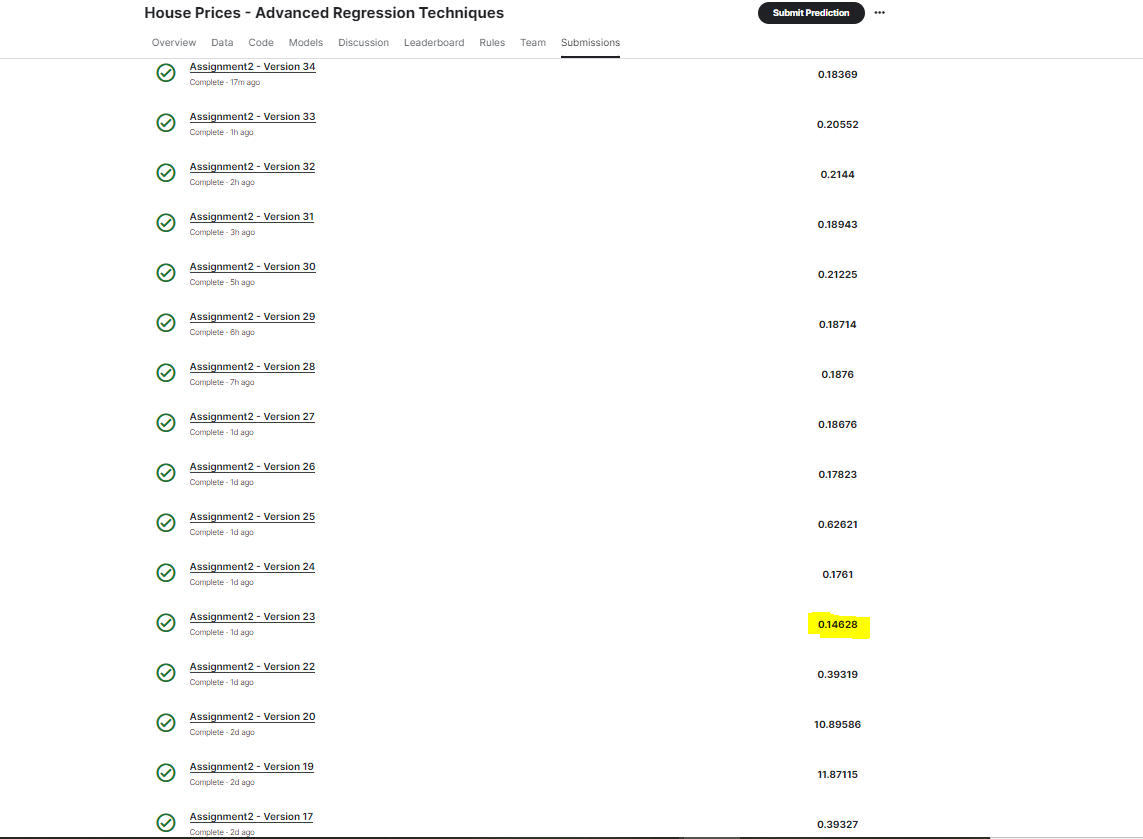

# Summary


***After data analysis that included cleaning columns with a lot of missing data, filling in missing data and classifying the data into numbers or ordinal.
We then built new features to help us increase the accuracy of the model.
We also checked with the help of 3 Feature Selection algorithms: Backward, Forward, Hybrid the optimal features, after comparing them we chose Backward which gave us the highest CV.
Also, we compare between the regularization lasso ,ridge and elastic and we chose ridge because better accuracy.
After that we used grid search to find the optimal Hyper-Parameters with which the SGDRegressor model will bring us a more accurate prediction.
After that the model was tested and the result of the loss was: 0.14628.***

# Assignment4 : House Prices - Advanced Regression Techniques

Name : Ziv Shamli Id: 209188242 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment4

Name : Ravid Masalton Id: 315466771 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment4

# TL;DR

In this task, our objective is to identify the most suitable model for predicting apartment prices. Following the data analysis and preprocessing phase in the previous section, we are now poised to leverage advanced techniques to fine-tune our models. We will experiment with a range of algorithms including Locally Weighted Linear Regression (LWLR), K-Nearest Neighbors (KNN), Decision Trees, and Support Vector Machines (SVM) to ascertain the optimal accuracy.

Moreover, we will employ Principal Component Analysis (PCA) to streamline our feature set and streamline computational complexity. Visual representations, such as graphs, will be instrumental in gauging the accuracy levels across different models. Finally, we'll employ ensemble methods to amalgamate the strengths of various models and determine the most effective combination.


# LWLR

In [56]:
xnorm=pd.get_dummies(X_best_features, columns=categorical_cols)
xnorm[numerical_cols]=MinMaxScaler().fit_transform(X_best_features[numerical_cols])
xnorm

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0        0.273292  0.102935    0.122500    0.370798   0.064212     0.266999   
1        0.366460  0.119492    0.000000    0.513655   0.121575     0.393637   
2        0.291925  0.143246    0.101250    0.255252   0.185788     0.286962   
3        0.242236  0.118772    0.000000    0.113445   0.231164     0.235808   
4        0.391304  0.186580    0.218750    0.344013   0.209760     0.357143   
...           ...       ...         ...         ...        ...          ...   
1439     0.254658  0.095262    0.000000    0.000000   0.407962     0.297255   
1440     0.397516  0.170959    0.074375    0.414916   0.252140     0.480973   
1441     0.279503  0.111458    0.000000    0.144433   0.375428     0.359326   
1442     0.291925  0.121176    0.000000    0.025735   0.000000     0.336245   
1443     0.335404  0.124343    0.000000    0.435924   0.058219     0.391765   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  SaleCondition_Partial  \
0     0.203588  0.469747           0.0   0.420281  ...                  False   
1     0.361934  0.000000           0.0   0.283445  ...                  False   
2     0.228549  0.476348           0.0   0.443494  ...                  False   
3     0.244540  0.415842           0.0   0.422419  ...                  False   
4     0.316303  0.579208           0.0   0.569334  ...                  False   
...        ...       ...           ...        ...  ...                    ...   
1439  0.241420  0.381738           0.0   0.401038  ...                  False   
1440  0.678237  0.000000           0.0   0.531155  ...                  False   
1441  0.333073  0.633663           0.0   0.612706  ...                  False   
1442  0.290172  0.000000           0.0   0.227245  ...                  False   
1443  0.359594  0.000000           0.0   0.281613  ...                  False   

      OverallCond_0  OverallCond_1  OverallCond_2  OverallCond_3  \
0             False          False          False          False   
1             False          False          False          False   
2             False          False          False          False   
3             False          False          False          False   
4             False          False          False          False   
...             ...            ...            ...            ...   
1439          False          False          False          False   
1440          False          False          False          False   
1441          False          False          False          False   
1442          False          False          False          False   
1443          False          False          False          False   

      OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  \
0              True          False          False          False   
1             False          False          False           True   
2              True          False          False          False   
3              True          False          False          False   
4              True          False          False          False   
...             ...            ...            ...            ...   
1439           True          False          False          False   
1440          False           True          False          False   
1441          False          False          False          False   
1442          False           True          False          False   
1443          False           True          False          False   

      OverallCond_8  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
1439          False  
1440          False  
1441           True  
1442          False  
1443          False  

[1444 rows x 78 columns]

In [57]:

!git clone https://github.com/qiaochen/CourseExercises

Cloning into 'CourseExercises'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), 248.83 KiB | 979.00 KiB/s, done.


In [58]:
numerical_cols, categorical_cols = determine_dtypes(X_best_features)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X_best_features, t), columns=all_cols)

In [59]:
# get cv score for lwlr with k=1
from CourseExercises.lwlr import LWLR
from sklearn.metrics import make_scorer, accuracy_score

arr_X_normalized=np.asarray(X_encoded)
# get best k for lwlr (show the calculation of this sell)
hyper_parameters = {'k': list(range(1, 10))}

gs_lw_model = GridSearchCV(LWLR(k=1), hyper_parameters, 
                           scoring='r2').fit(arr_X_normalized, t)

print('R2 score for regression:')
print('gs_lw_model', gs_lw_model.best_score_)
print('best params', gs_lw_model.best_params_)
print()



R2 score for regression:
gs_lw_model 0.8975314265949501
best params {'k': 4}



**As you can see when we performed lwlr we got R2:0.897**

# KNN

In [60]:
# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(
    n_neighbors=5, weights='distance'), 
    hyper_parameters).fit(arr_X_normalized, t)

print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)
print()


R2 score for regression:
gs_neigh_model 0.7726989362258425
best params {'n_neighbors': 5}



#  Decision Trees

In [61]:
from sklearn.tree import DecisionTreeRegressor
# Define hyperparameters for tuning
hyper_parameters = {'max_depth': list(range(1, 20)),
                    'min_samples_split': [2, 5, 10, 15, 20],
                    'min_samples_leaf': [1, 2, 4, 8, 12]}

# Initialize and fit the GridSearchCV with DecisionTreeRegressor
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                             hyper_parameters).fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_tree_model:', tree_model.best_score_)
print('Best parameters:',tree_model.best_params_)
print()

R2 score for regression:
gs_tree_model: 0.8069898522711935
Best parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 15}



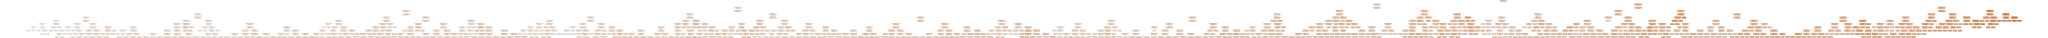

In [62]:
from sklearn import tree
# show the tree in graphics with graphviz
import graphviz 
dot_data = tree.export_graphviz(DecisionTreeRegressor(random_state=42, max_depth=11).fit(arr_X_normalized, t),
               feature_names=X_best_features.columns,
               class_names=t.unique(), 
               filled=True, 
               rounded=True)
graph = graphviz.Source(dot_data) 
graph

### SVM

In [63]:
from sklearn.svm import SVR

# Define hyperparameters for tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto']}
# Initialize and fit the GridSearchCV with SVM (SVR)
gs_svm_model = GridSearchCV(SVR(),param_grid).fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_svm_model:', gs_svm_model.best_score_)
print('Best parameters:', gs_svm_model.best_params_)
print()

R2 score for regression:
gs_svm_model: 0.5650969916848597
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}



# The algorithm that gave us the highest R2 is LWLR, so we will use it.

# Feature Compression with PCA 

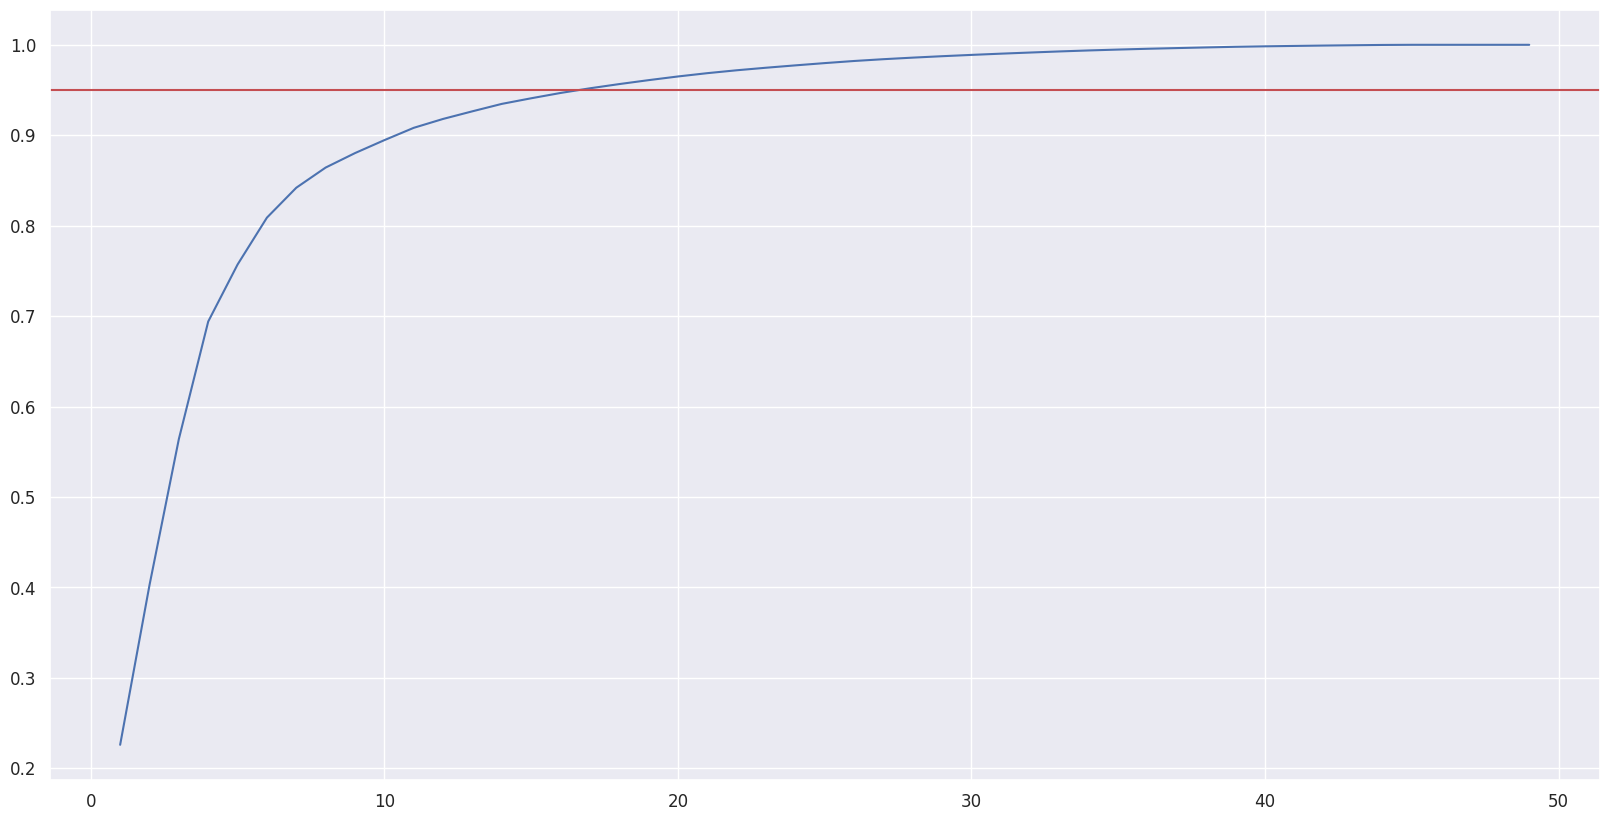

In [64]:
# convert data points to 2dim with pca
from sklearn.decomposition import PCA
num_of_columns = len(X_best_features.columns)
pca = PCA(n_components=num_of_columns).fit(arr_X_normalized)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(y)+1),y)
plt.axhline(y=0.95, color='r', linestyle='-') # aim to explain higher variance as possible 95%

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np

# Assuming LWLR is correctly defined/imported elsewhere

# Define hyperparameters for tuning
param_grid = {'LWLR__k': list(range(1, 10))}  # Adjust this according to your need, assuming 'k' is a parameter in LWLR

# Define a Pipeline including PCA and LWLR regressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('LWLR', LWLR(k=4))  # Initial 'k' value, will be tuned
])

# Initialize and fit the GridSearchCV with the pipeline
gs_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2')

# Assuming arr_X_normalized and t are defined and hold your feature set and target variable
# Fit the model
gs_model.fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_model:', gs_model.best_score_)
print('Best parameters:', gs_model.best_params_)


R2 score for regression:
gs_model: 0.8925099603184492
Best parameters: {'LWLR__k': 5}


# pca with TreeRegressor

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameters for tuning
param_grid = {
    'TreeRegressor__max_depth': [None, 5, 10, 20],
    'TreeRegressor__min_samples_split': [2, 5, 10],
    'TreeRegressor__min_samples_leaf': [1, 2, 4],
    'TreeRegressor__max_features': ['auto', 'sqrt', 'log2']
}

# Define a Pipeline including PCA and DecisionTreeRegressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('TreeRegressor', DecisionTreeRegressor())  
])

# Initialize and fit the GridSearchCV with the pipeline
pcaTreeModel = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2')

# Assuming arr_X_normalized and t are defined and hold your feature set and target variable
# Fit the model
pcaTreeModel.fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_model:', pcaTreeModel.best_score_)
print('Best parameters:', pcaTreeModel.best_params_)
mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss2(X_encoded, t, pcaTreeModel,k=5,show_score_loss_graphs=True)



R2 score for regression:
gs_model: 0.6767813506667444
Best parameters: {'TreeRegressor__max_depth': 5, 'TreeRegressor__max_features': 'auto', 'TreeRegressor__min_samples_leaf': 2, 'TreeRegressor__min_samples_split': 10}


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

we can see that lowering the dimension improved the score

# Ensembles

# BaggingRegressor

In [75]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np


# Initialize the base regressor
base_regressor = DecisionTreeRegressor()

# Initialize the Bagging ensemble of DecisionTreeRegressor
bagging_regressor = BaggingRegressor(base_estimator=base_regressor, 
                                     n_estimators=100, 
                                     bootstrap=True, 
                                     random_state=42)

# Train the Bagging ensemble on the entire dataset
bagging_regressor.fit(arr_X_normalized, t)

r2_score = bagging_regressor.score(arr_X_normalized, t)
# Print the results
print('R2 score for regression:')
print('gs_model:',r2_score)
mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss2(X_encoded, t, bagging_regressor,k=5,show_score_loss_graphs=True)


R2 score for regression:
gs_model: 0.9850430713000806


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

# Bootstrap with lwlr

In [85]:
# get score with bootstrap bagging
bag_boot_model = BaggingRegressor(base_estimator= LWLR(k=4),
                                   n_estimators=20, random_state=1,
                                   bootstrap=True).fit(arr_X_normalized, t)


r2_score = bag_boot_model.score(arr_X_normalized, t)
# Print the results
print('R2 score for regression:')
print('gs_model:',r2_score)


R2 score for regression:
gs_model: 0.9274367758222246


# AdaBoosting with tree

In [87]:
# get score with ada boosting
from sklearn.ensemble import AdaBoostRegressor

ada_boost_model = AdaBoostRegressor(n_estimators=100, random_state=1).fit(arr_X_normalized, t)

print('R2 score for regression:')
print('ada_boost_model', ada_boost_model.score(arr_X_normalized, t).mean())
mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss2(X_encoded, t, ada_boost_model,k=5,show_score_loss_graphs=True)


R2 score for regression:
ada_boost_model 0.8936072139163084


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

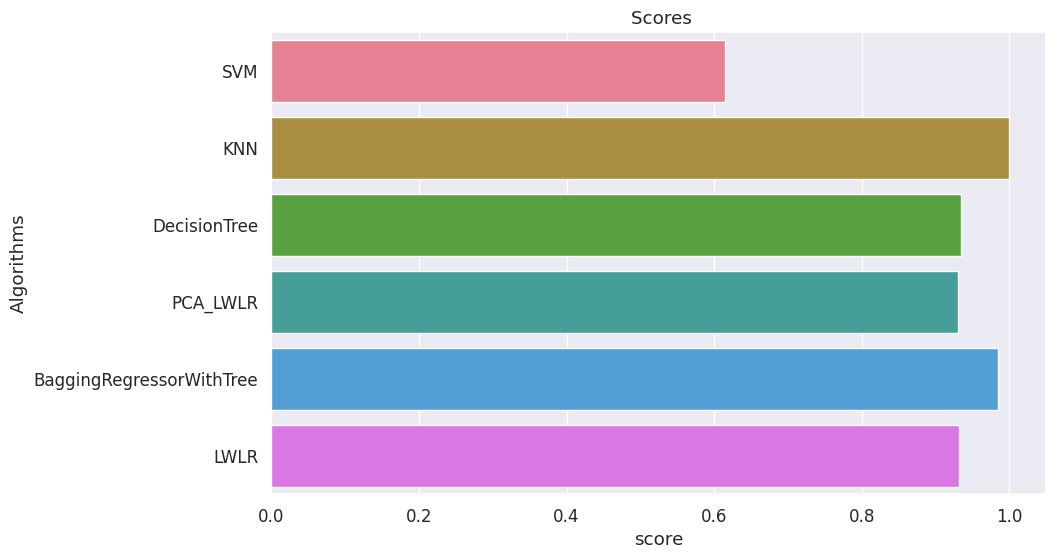

[0.6146609093780099, 0.999996433077172, 0.9343212315524358, 0.9308120486761365, 0.9850430713000806, 0.9309659429030184]


In [67]:
from sklearn.metrics import r2_score

models = []  # append all models or predictive models 
R_results = []  # cross-validation result


models.append(SVR(C=100, gamma ='scale', kernel='linear').fit(arr_X_normalized, t))
models.append(KNeighborsRegressor(n_neighbors=5, weights='distance').fit(arr_X_normalized, t))

models.append(DecisionTreeRegressor(random_state=42,max_depth= 9, min_samples_leaf=4, min_samples_split=15).fit(arr_X_normalized, t))
models.append(Pipeline([('pca', PCA()),('LWLR', LWLR(k=4)) ]).fit(arr_X_normalized, t))

models.append(BaggingRegressor(base_estimator=base_regressor,n_estimators=100, bootstrap=True, random_state=42).fit(arr_X_normalized, t))
models.append(LWLR(k=4).fit(arr_X_normalized, t))

for model in models:
    predictions = model.predict(arr_X_normalized)
    # Compute the R^2 score and append it to R_results.
    R_results.append(r2_score(t, predictions))



# Corrected list of algorithms
algorithms =  [ "SVM","KNN", "DecisionTree", "PCA_LWLR","BaggingRegressorWithTree","LWLR"]

R_frame = pd.DataFrame(
    {
        "score": R_results,
        "Algorithms": algorithms
    })

# Plotting the results
plt.figure(figsize=(10, 6))
R_plot = sns.barplot(x="score", y="Algorithms", data=R_frame,
                palette="husl", orient="h")

R_plot.set_xlabel("score")
R_plot.set_title(" Scores")
plt.show()
print(R_results)

# It can be seen that the KNN brings us a very high result : 1
# In our opinion, this is overfitting, so we decided to take the model BaggingRegressor

In [68]:
pipe = make_pipeline(preprocessor, BaggingRegressor(base_estimator=base_regressor,n_estimators=100, bootstrap=True, random_state=42))
pipe.fit(X_best_features, t)
test_data = test_data.loc[:, bestFeatures]
preds = pipe.predict(test_data)

In [69]:
# create the submission file
submission['SalePrice'] = preds
submission.to_csv('submission.csv', index=False)
submission

Id  SalePrice
0     1461  126463.66
1     1462  157283.20
2     1463  179999.77
3     1464  180398.86
4     1465  198486.97
...    ...        ...
1454  2915   84385.61
1455  2916   89326.80
1456  2917  161919.81
1457  2918  111820.71
1458  2919  237737.48

[1459 rows x 2 columns]

# Summary:

In our Assignment 4, we embarked on a detailed journey to predict house prices by leveraging a rich dataset.. The dataset was thoroughly examined, cleaned, and preprocessed to ensure it was in the ideal state for analysis. We conducted an exploratory data analysis to identify trends and patterns, which informed our subsequent feature selection and data modeling efforts.

Our approach was methodical, starting with the application of various statistical methods to understand the dataset's characteristics. We then explored a range of machine learning models, including decision trees, support vector machines (SVM), and ensemble methods, to predict the house prices. To enhance our model's performance, we implemented feature compression using Principal Component Analysis (PCA), which proved instrumental in refining our predictions.

Crucially, we conducted a comprehensive comparison of all the models to ascertain which yielded the most accurate predictions. This comparative analysis revealed that the BaggingRegressor model outperformed the others, delivering the highest score. 

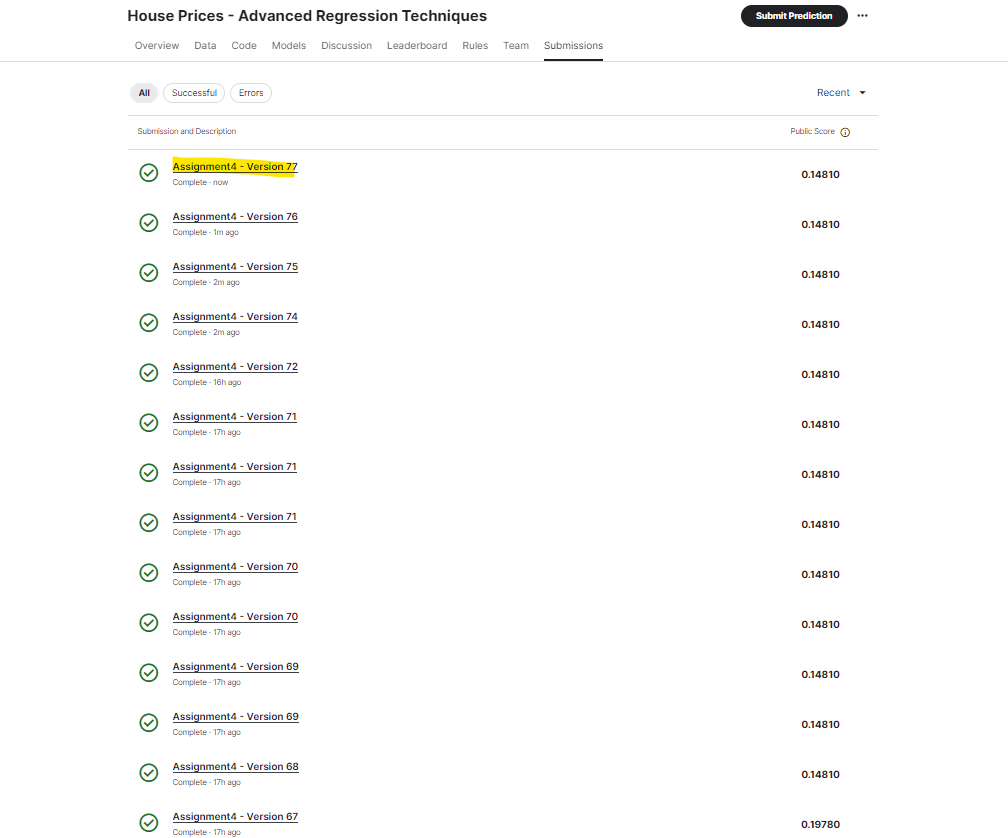

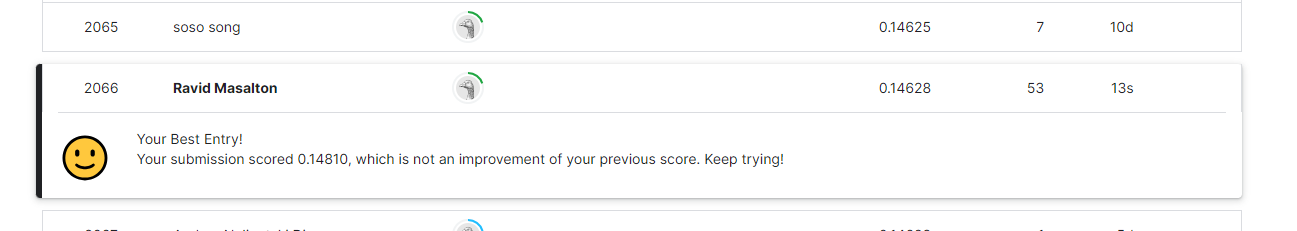

# reference

The practice notebooks with Shira.